# Import Libraries

In [1]:
from util_comp import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # MICE imputer

# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

# Load the Data

In [2]:
# Load the data from the csv file and display it in the notebook with the first row as the header

data = main(retained=True, string_issue=True)
data.head(1)

Only retained columns are used
Shape of data: (44535, 72)
Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Dropped rows with missing values
Elapsed time to compute change values > opt: 1 minutes and 8 seconds
Elapsed time to compute Full process: 1 minutes and 12 seconds


Gender      Age  Work type    sector size of business  \
0  A woman  30 - 39  Employees  Services            0 - 9   

   No of 3 to 6 years old children  No of 7 to 12 years old children  \
0                              0.0                               0.0   

   No of 13 to 17 years old children  No of 18 years and over children  \
0                                0.0                               0.0   

  dependents Full Time/Part Time shift work with alternating hours  \
0         No           Full time                                No   

                    Place of work standing or in an awkward posture  \
0  In an office alone or in pairs                            Rarely   

  carry or move heavy loads perform repetitive gestures    work on screen  \
0              Occasionally            Most of the time  Most of the time   

  cold/ hot env work in noisy env breathe toxic products or dust  \
0         Never      Occasionally                             No   

  handle toxic or dangerous products risk of serious fall  \
0                                 No                   No   

  machinery with exposure to injury learn new things  \
0                                No           Rather   

  work quickly or very intensely long periods of concentration  \
0                         Rather                    Completely   

  physically tiring mentally tiring satisfaction with work make decisions  \
0        Rather not      Completely             Rather not     Rather not   

  difficulty managing priorities recognized by my hierarchy  \
0                     Completely                 Not at all   

  develop professional skills good understanding where I work  \
0                      Rather                      Rather not   

  well-suited workstation seek to improve the way I work  \
0              Rather not                         Rather   

  well-being of its employees Security is a priority count on supervisor  \
0                  Not at all             Not at all          Not at all   

  recommend the company decreased alertness hurtful or aggressive remarks  \
0            Not at all               Often                    Very Often   

  insulted or attacked by the public or customers  \
0                                           Often   

  clarity of your role in the company access to professional training  \
0                      Unsatisfactory                      Satisfying   

  tools or workstation prospects for development mastery of position  \
0           Satisfying            Unsatisfactory      Unsatisfactory   

  difficulty reconciling your work with your other personal commitments  \
0                                     No, rather not                      

             transportation personal concerns can talk to loved ones  \
0  Less than 1 hour per day            Rather                 Rather   

  state of health in general long-term illness Disabilities Headaches  \
0                    AVERAGE                No           No     Often   

  neck, shoulder, arm pain    back pain leg, foot, knee pain  \
0              Permanently  Permanently                Often   

  other parts of the body pain                      midday meal  \
0                    Sometimes  By bringing your meal from home   

              drinks (At least once a week) smoker  \
0  Energy drinks (like Red Bull or Monster)    Yes   

  sleeping pills, anxiolytics or anti-depressants Sleep disorders  \
0                                           Never       sometimes   

  lack of tone outcome  
0        often     SSL

# Analyse the initial dataset

In [3]:
# Missing values

data.isnull().sum()

Gender                                             0
Age                                                0
Work type                                          0
sector                                             0
size of business                                   0
                                                  ..
smoker                                             0
sleeping pills, anxiolytics or anti-depressants    0
Sleep disorders                                    0
lack of tone                                       0
outcome                                            0
Length: 67, dtype: int64

In [4]:
# Details of the data
print(data.shape)
data.describe()

(23239, 67)


No of 3 to 6 years old children  No of 7 to 12 years old children  \
count                     23239.000000                      23239.000000   
mean                          0.175094                          0.241405   
std                           0.444073                          0.560395   
min                           0.000000                          0.000000   
25%                           0.000000                          0.000000   
50%                           0.000000                          0.000000   
75%                           0.000000                          0.000000   
max                           9.000000                          9.000000   

       No of 13 to 17 years old children  No of 18 years and over children  
count                       23239.000000                      23239.000000  
mean                            0.192521                          0.204570  
std                             0.484223                          0.556069  
min                             0.000000                          0.000000  
25%                             0.000000                          0.000000  
50%                             0.000000                          0.000000  
75%                             0.000000                          0.000000  
max                             9.000000                          9.000000

In [5]:
data['outcome'].value_counts()

NoSL    15602
LSL      3129
VSSL     2705
SSL      1803
Name: outcome, dtype: int64

## Plot columns

In [6]:
import re

# Custom sorting functions for specific cases
def extract_starting_number(value):
    # Extracts the starting number of the range or returns a large number for non-range values
    match = re.match(r"(\d+)", value)
    if match:
        return int(match.group(1))
    else:
        return float('inf')

# Predefined orderings for specific responses
custom_orders1 = (['Most of the time', 'Occasionally', 'Rarely', 'Never', None] or ['Most of the time', 'Occasionally', 'Rarely', 'Never'])
custom_orders2 = (['Completely', 'Rather', 'Rather not', 'Not at all', None] or ['Completely', 'Rather', 'Rather not', 'Not at all'])
custom_orders3 = (['Never', 'Sometimes', 'Often', 'Permanently', None] or ['Never', 'Sometimes', 'Often', 'Permanently'])
custom_orders4 = (['Very Often',  'Often',  'Sometimes',  'Never', None] or ['Very Often',  'Often',  'Sometimes',  'Never'] or ['Very Often',  'Often',  'Sometimes',  'Never', None, float('nan') ])
custom_orders5 = (['Very confident', 'Confident', 'Not very confident', 'Not confident at all', None] or ['Very confident', 'Confident', 'Not very confident', 'Not confident at all'] or ['Very confident', 'Confident', 'Not very confident', 'Not confident at all', None, float('nan') ])

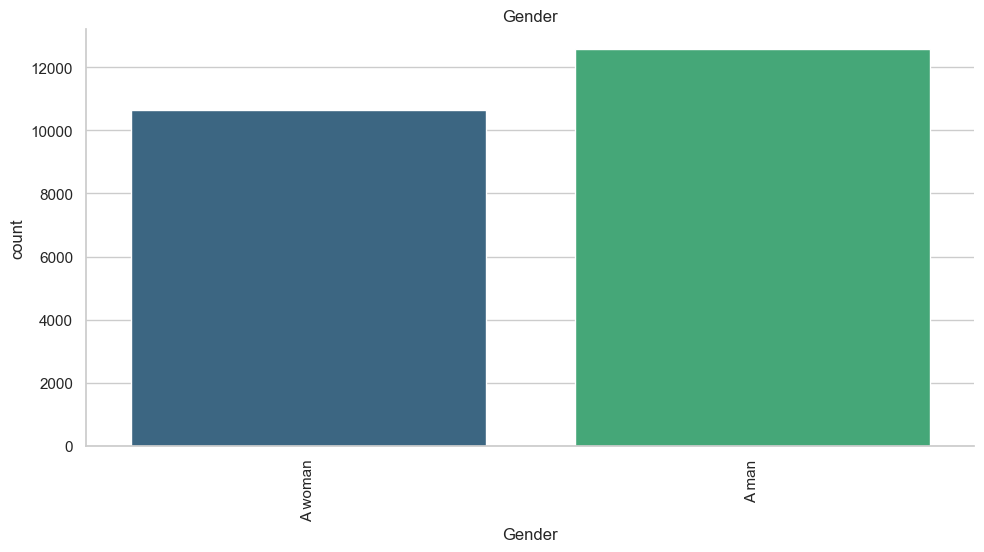

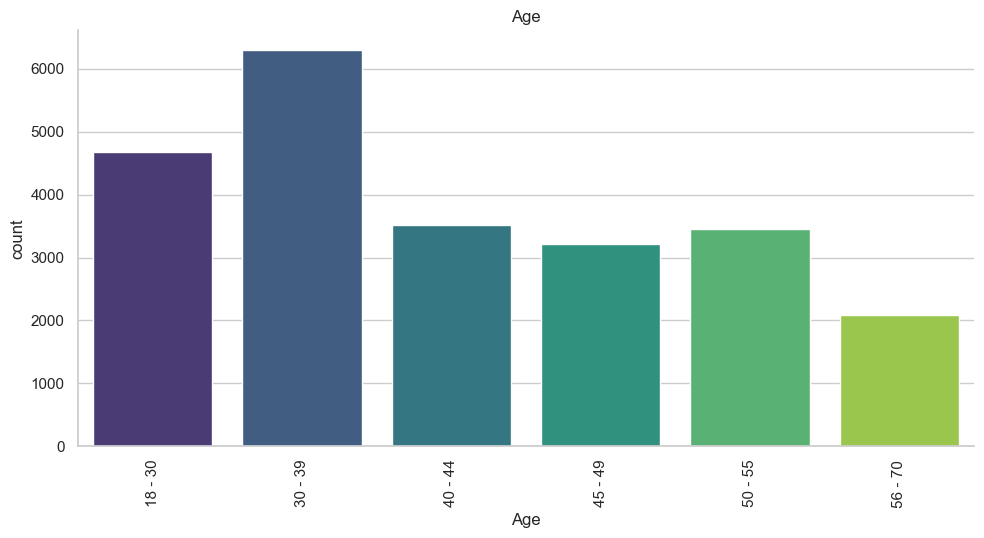

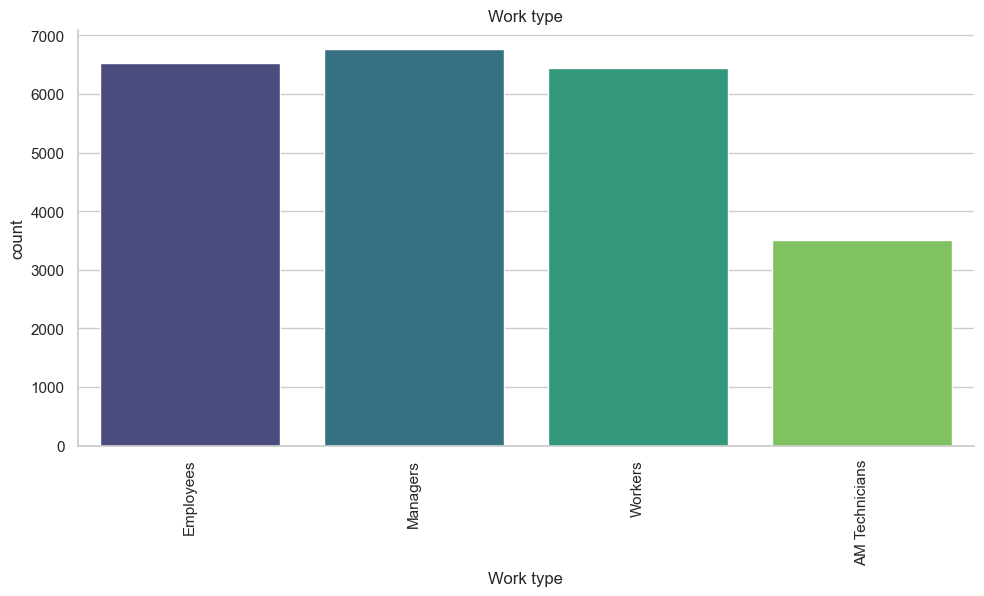

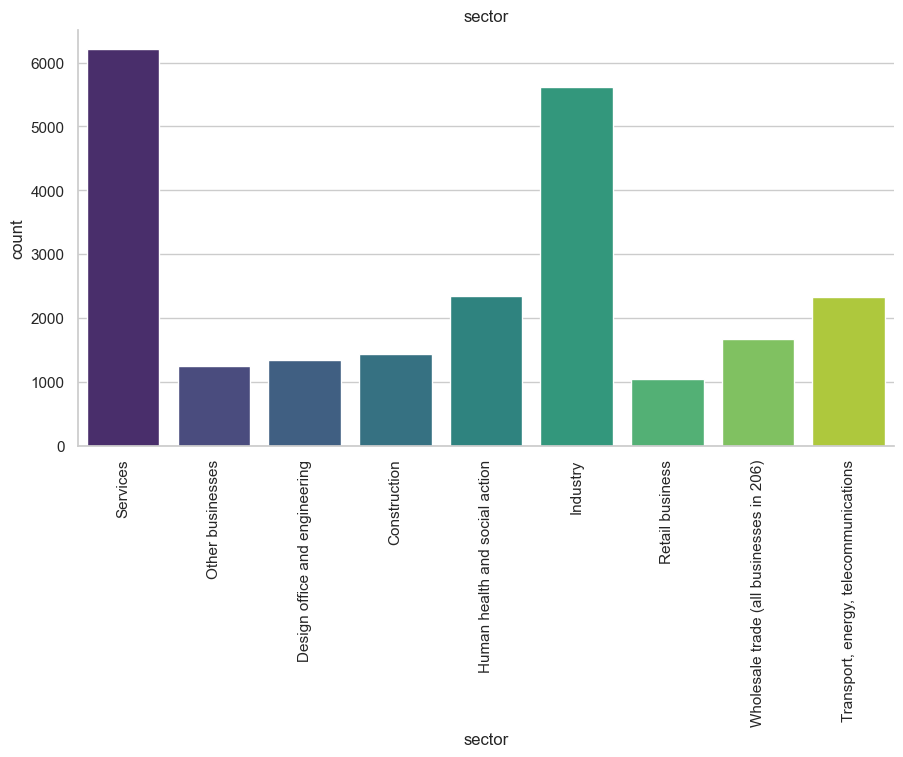

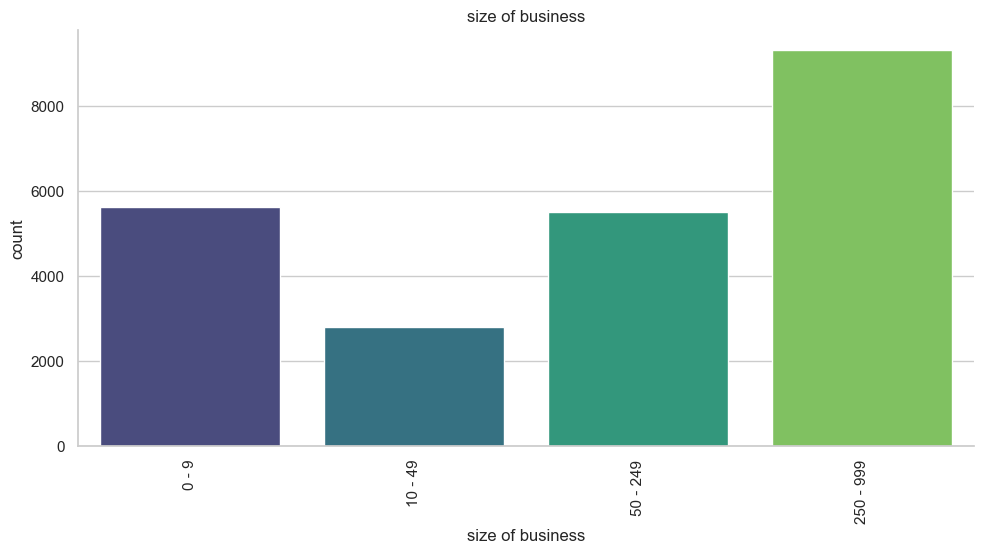

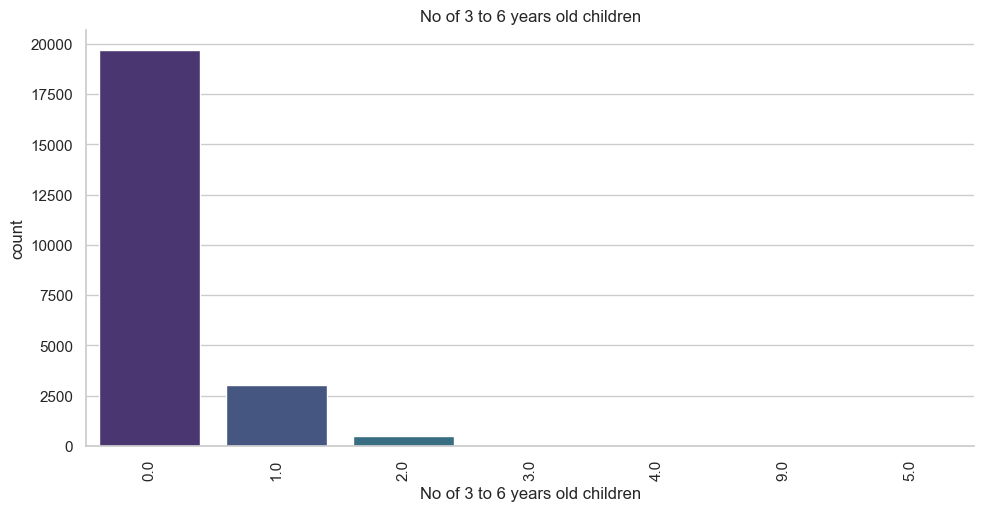

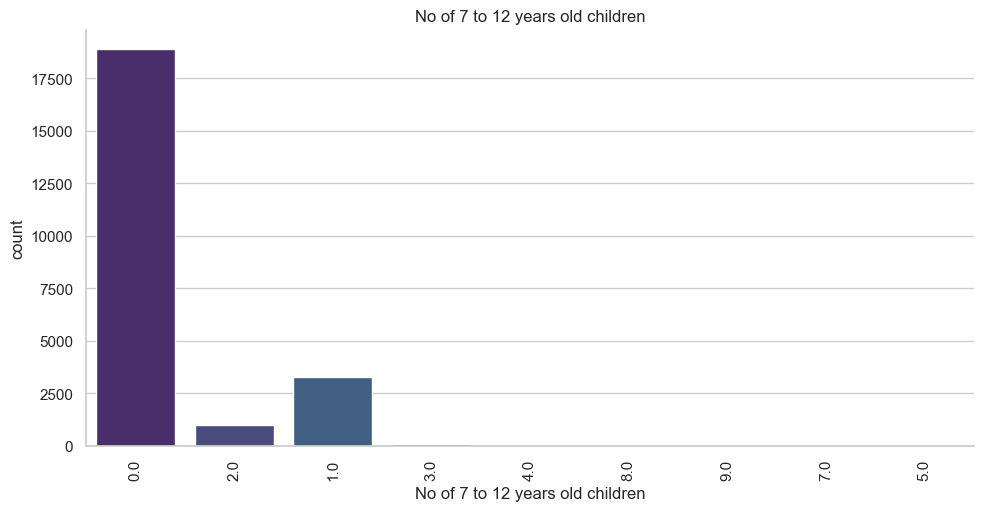

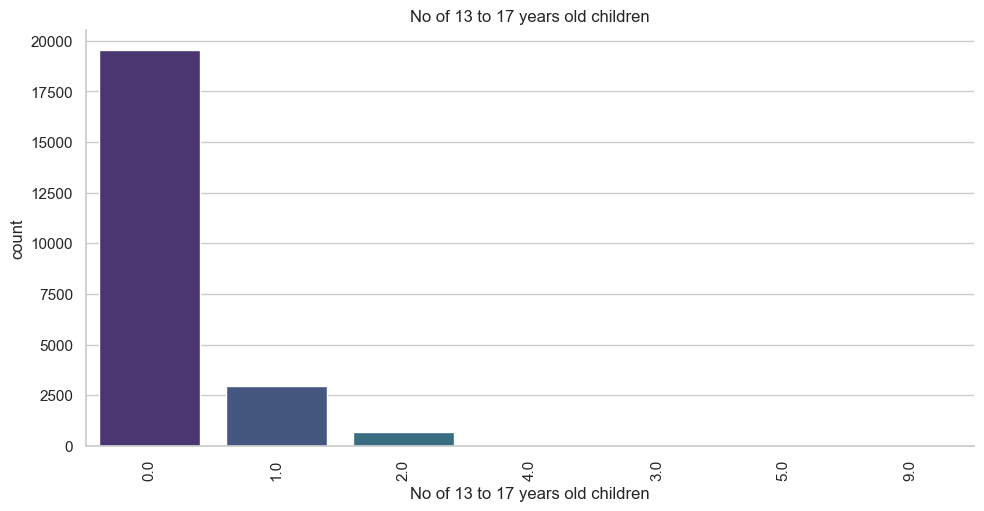

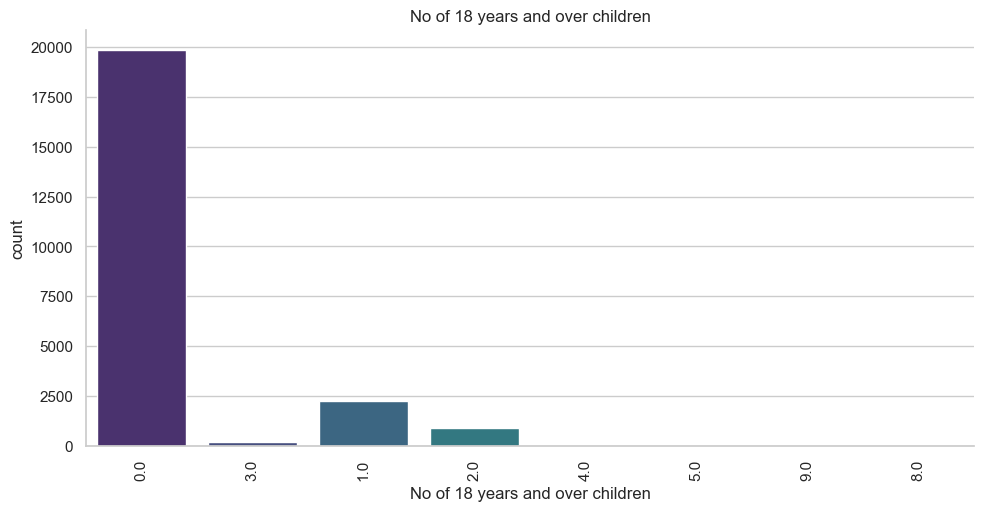

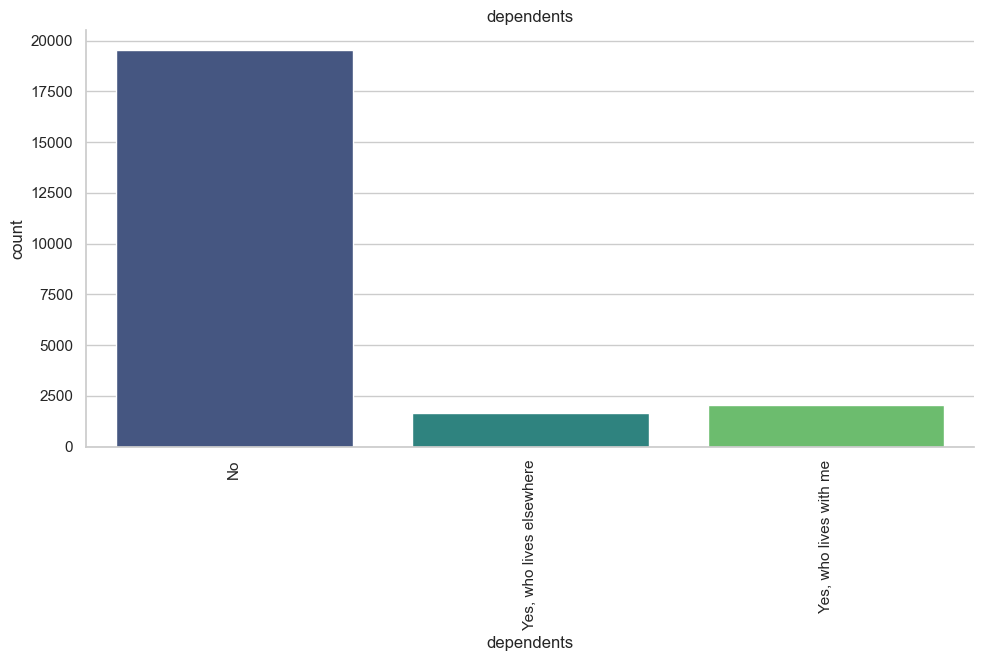

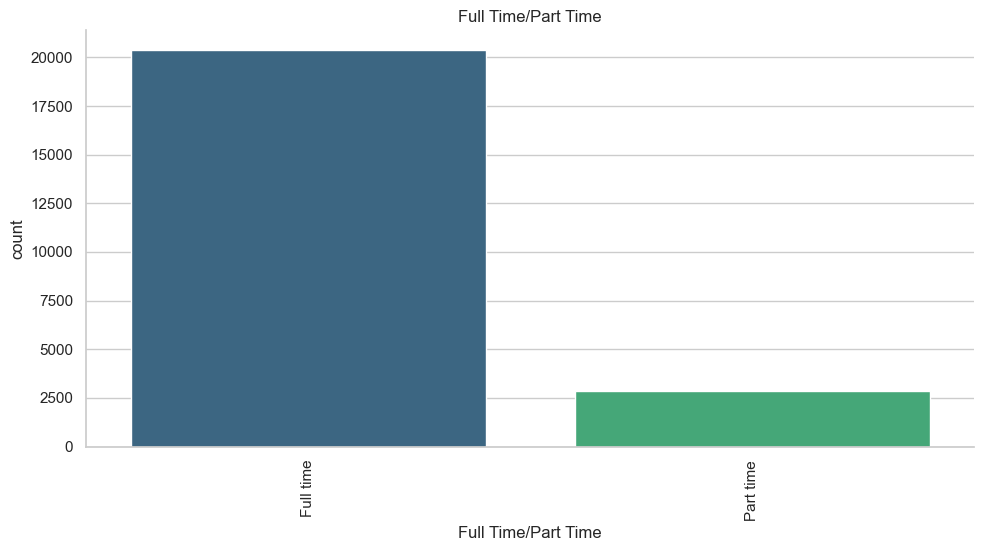

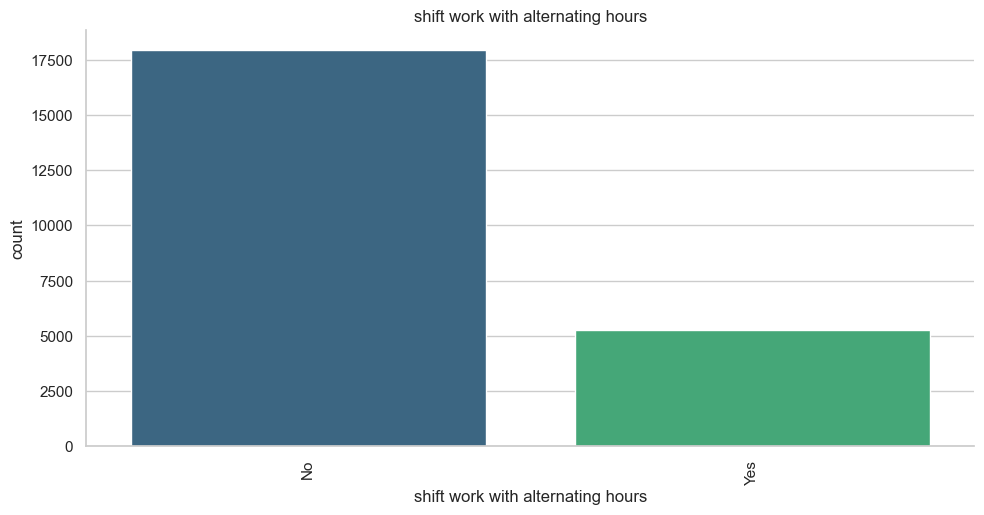

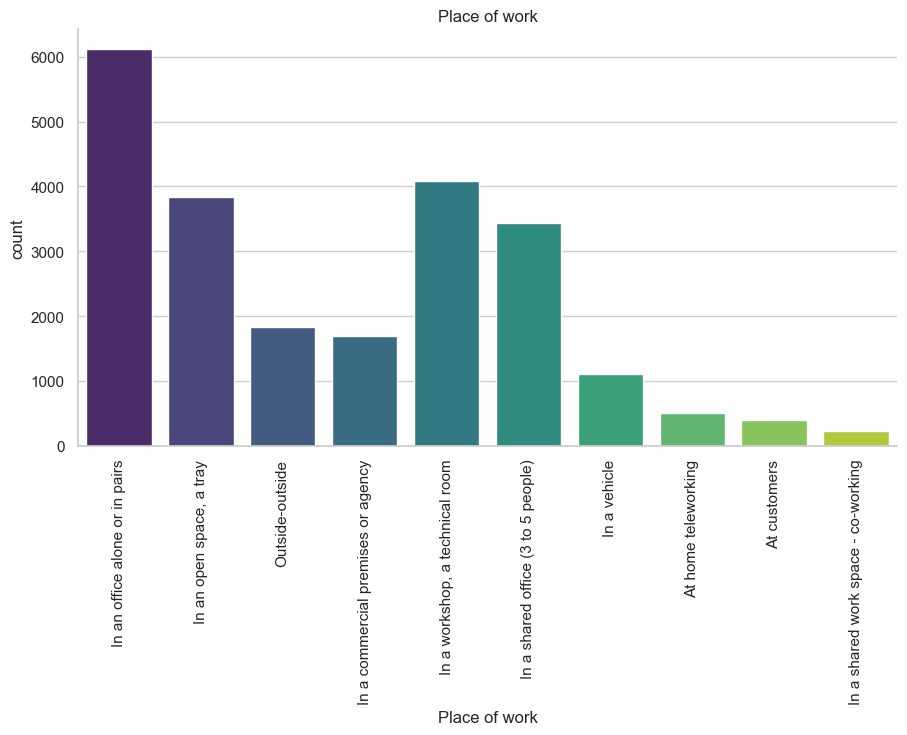

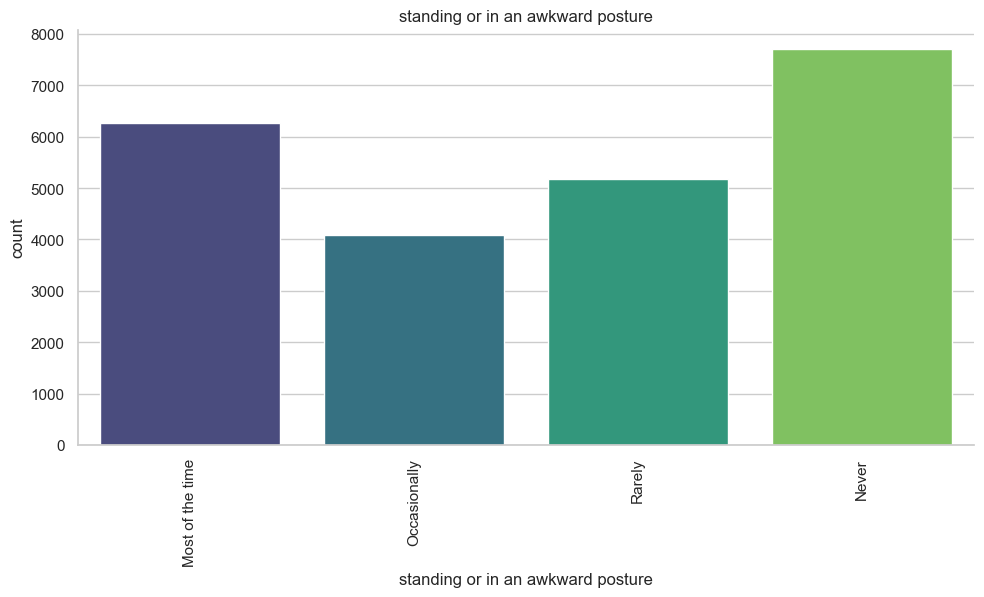

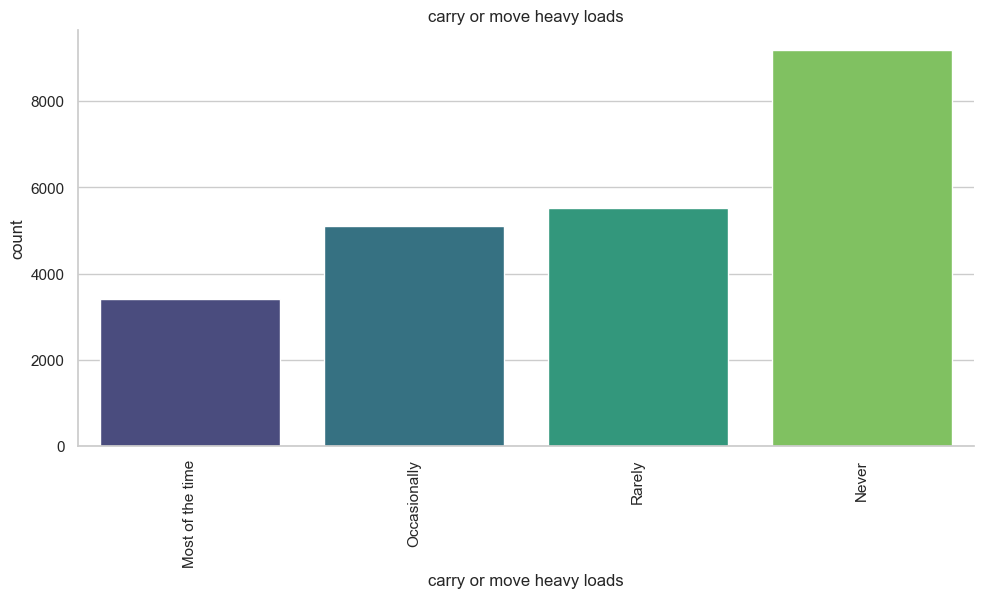

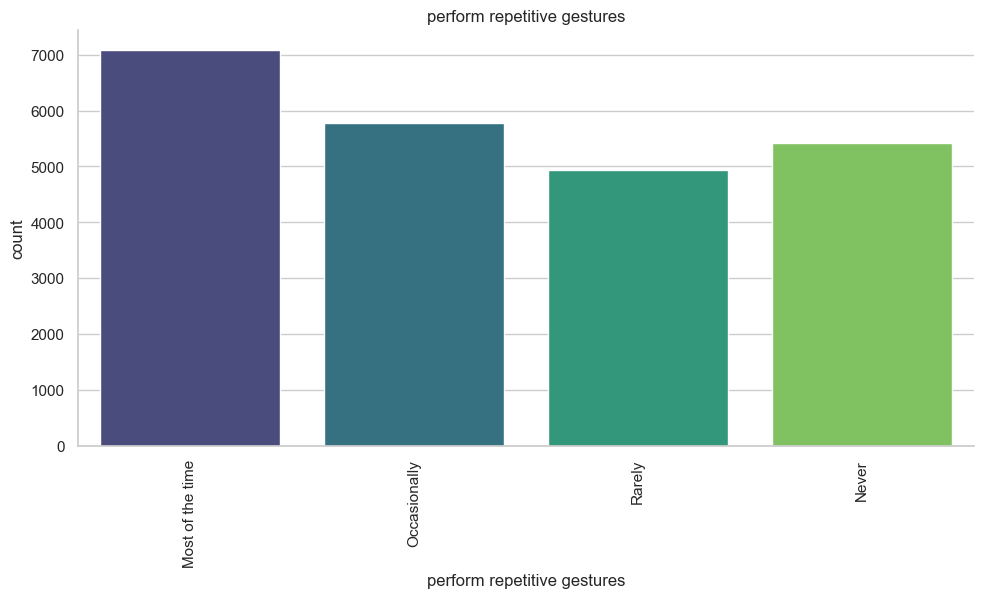

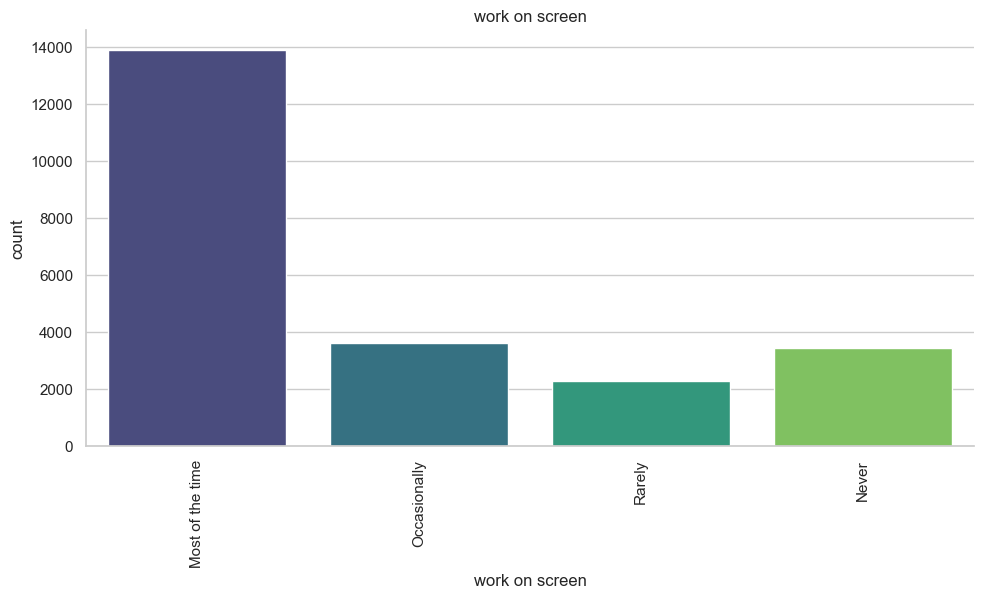

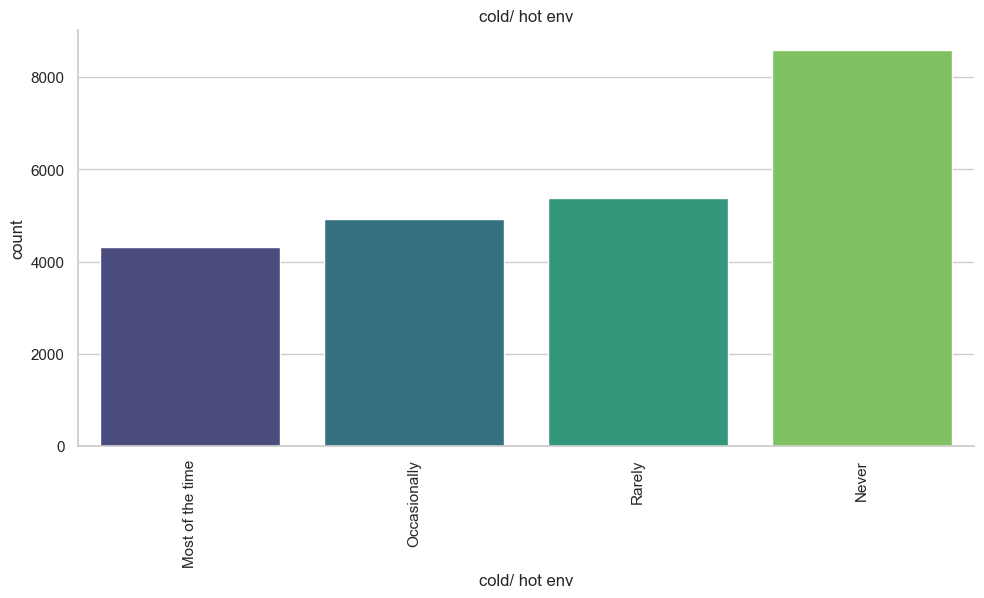

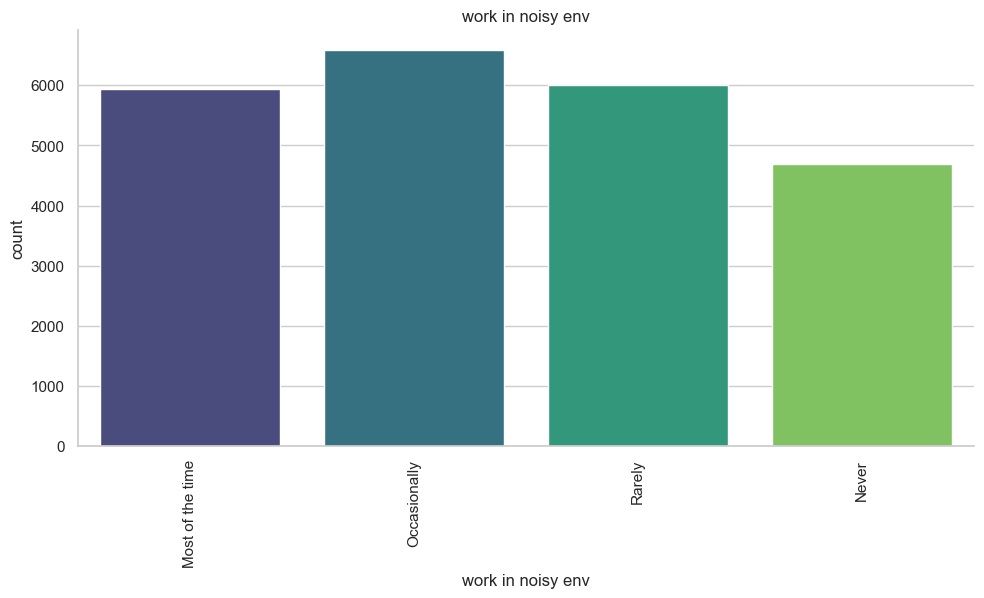

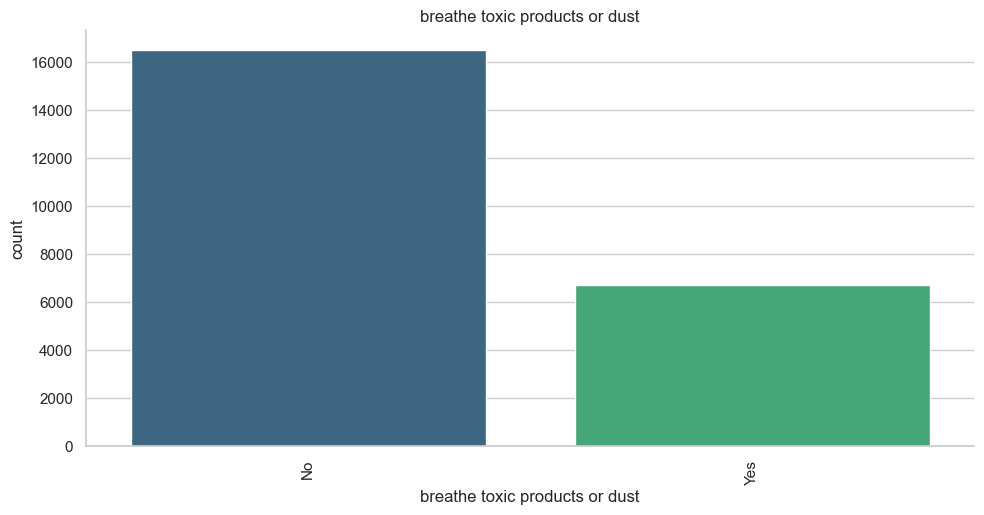

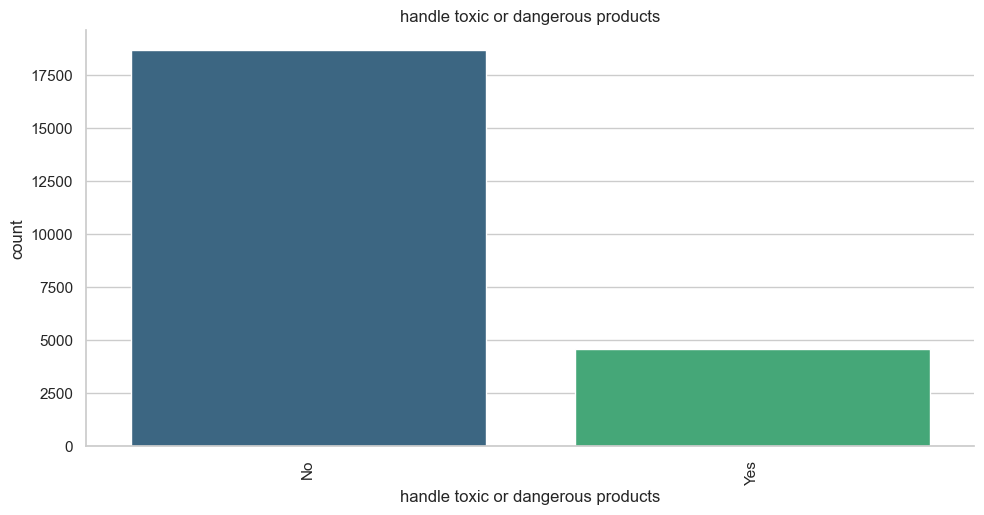

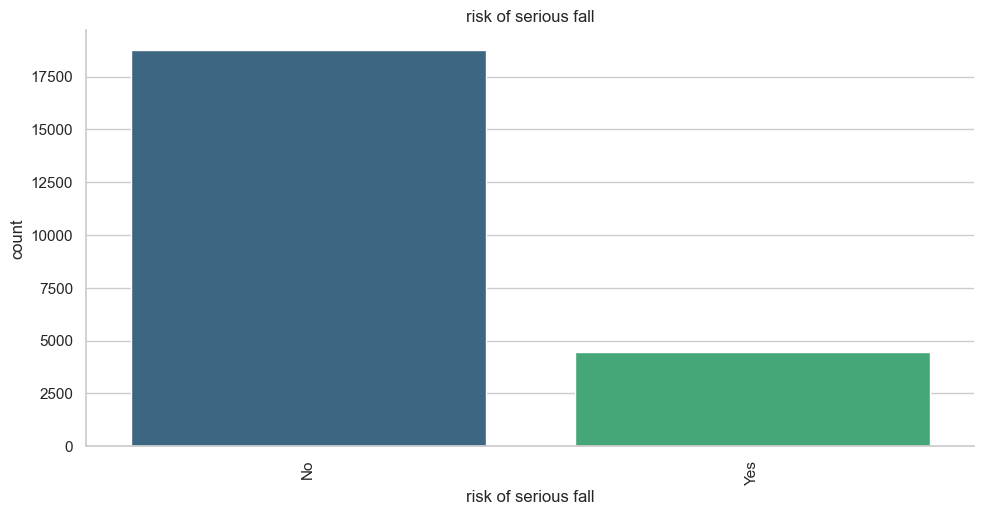

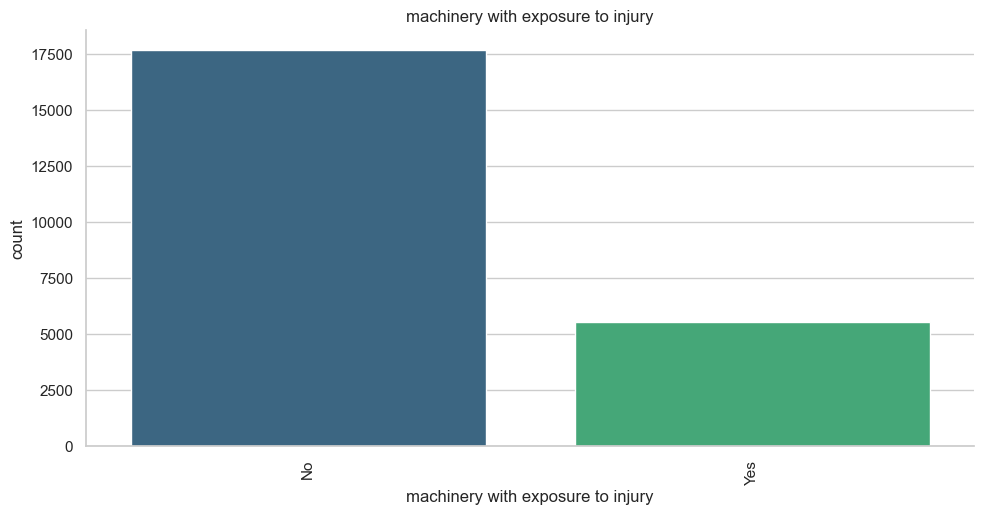

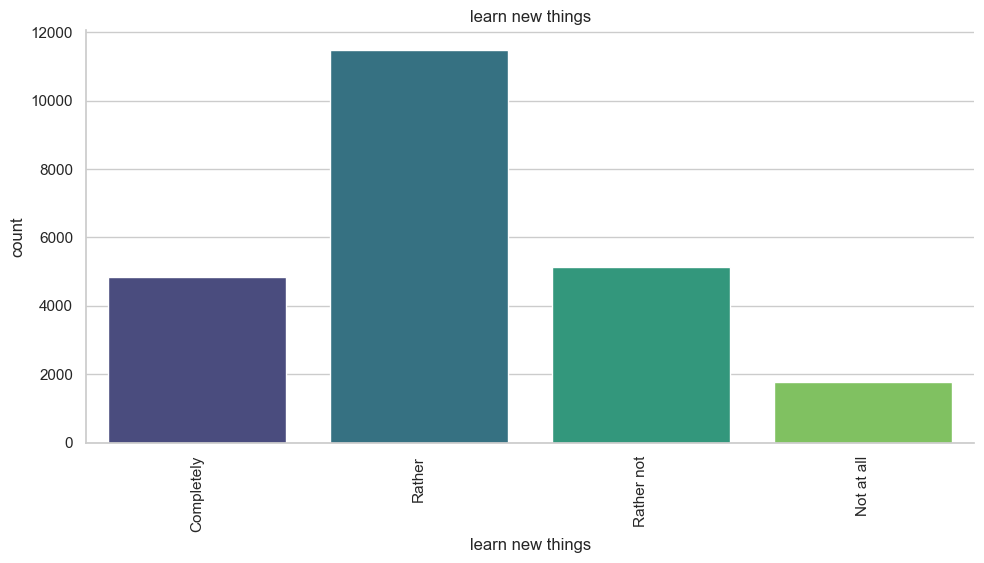

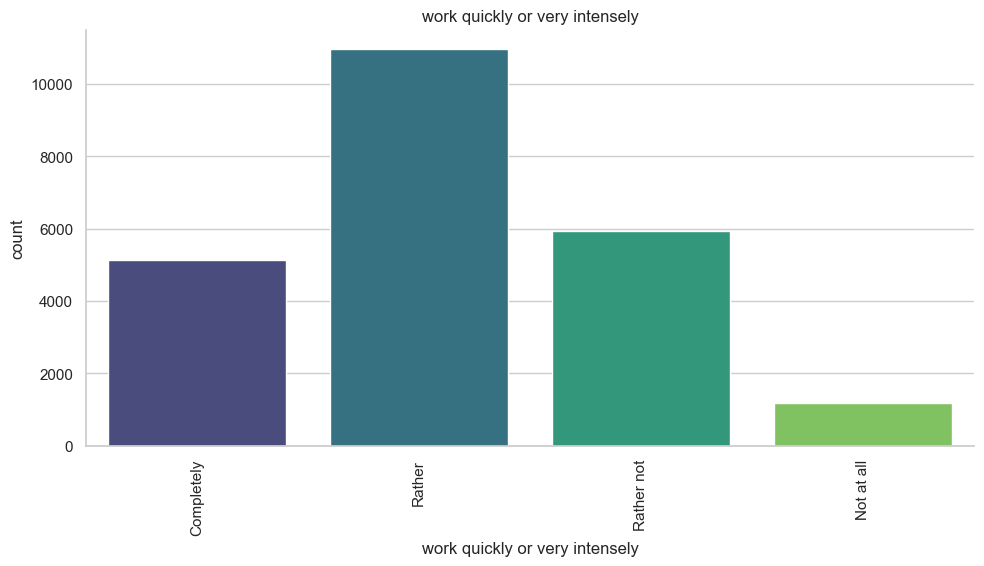

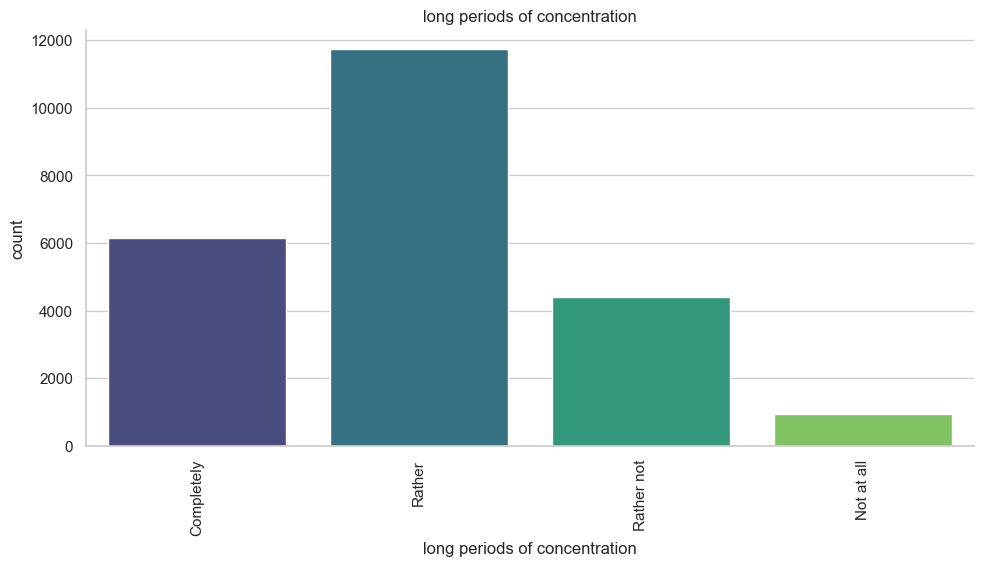

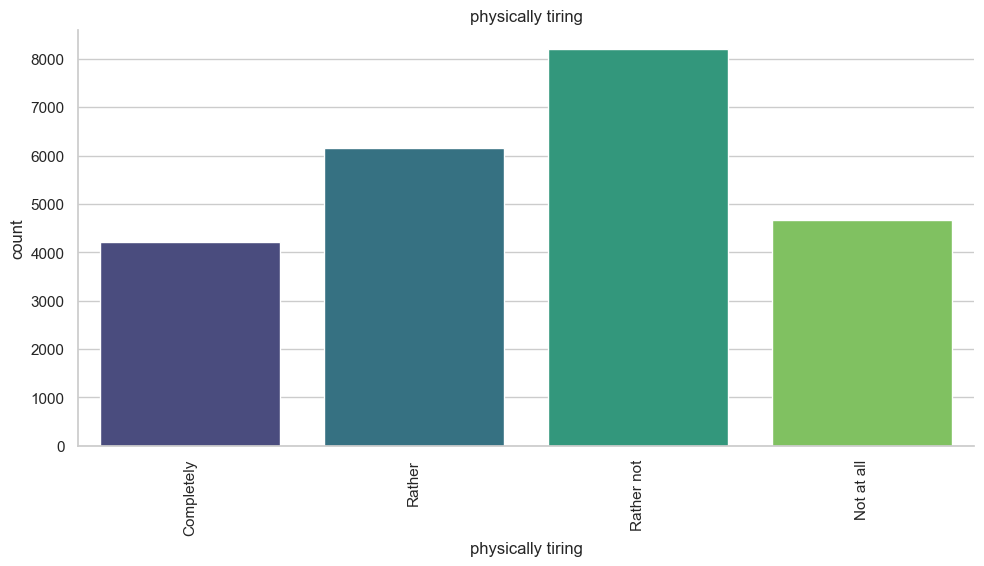

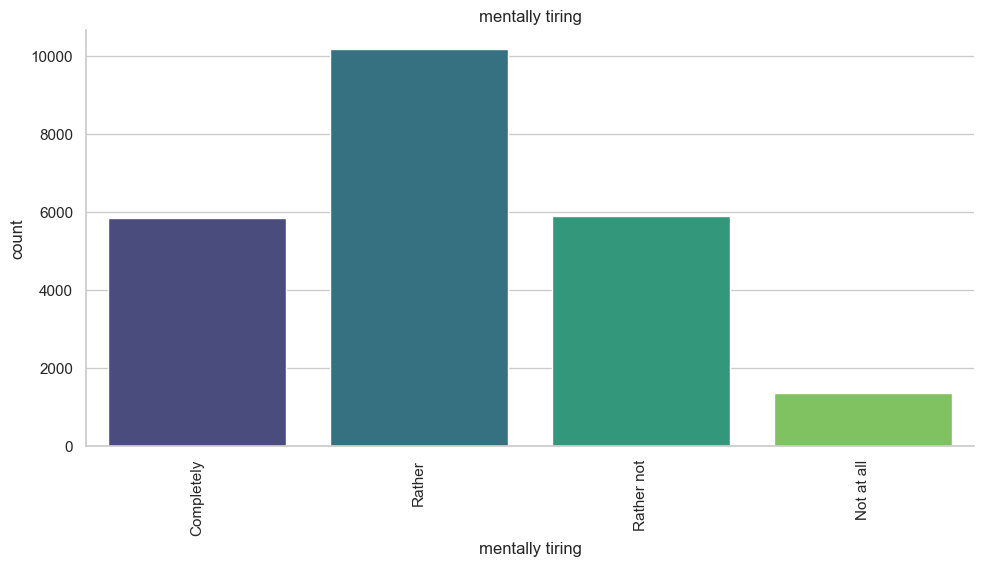

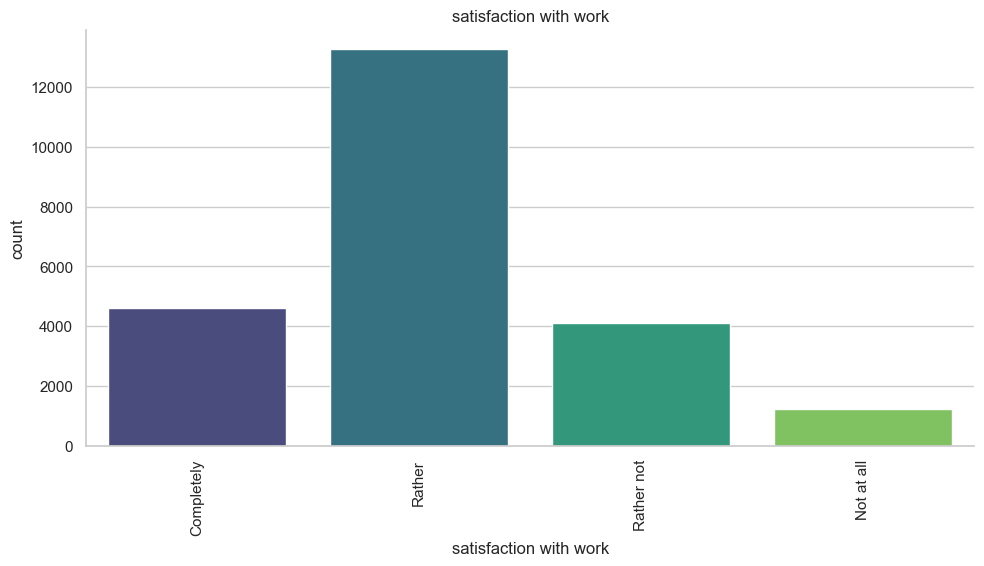

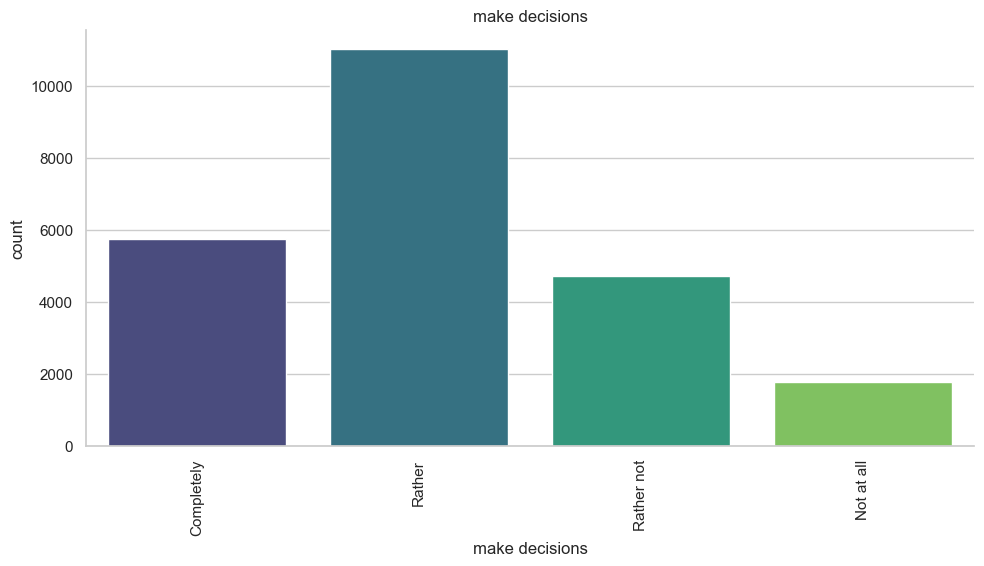

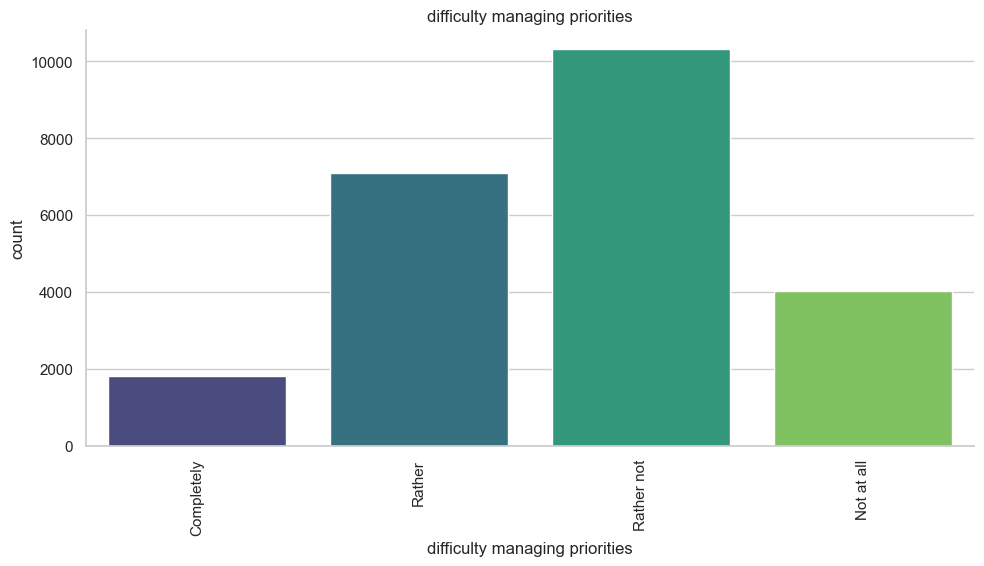

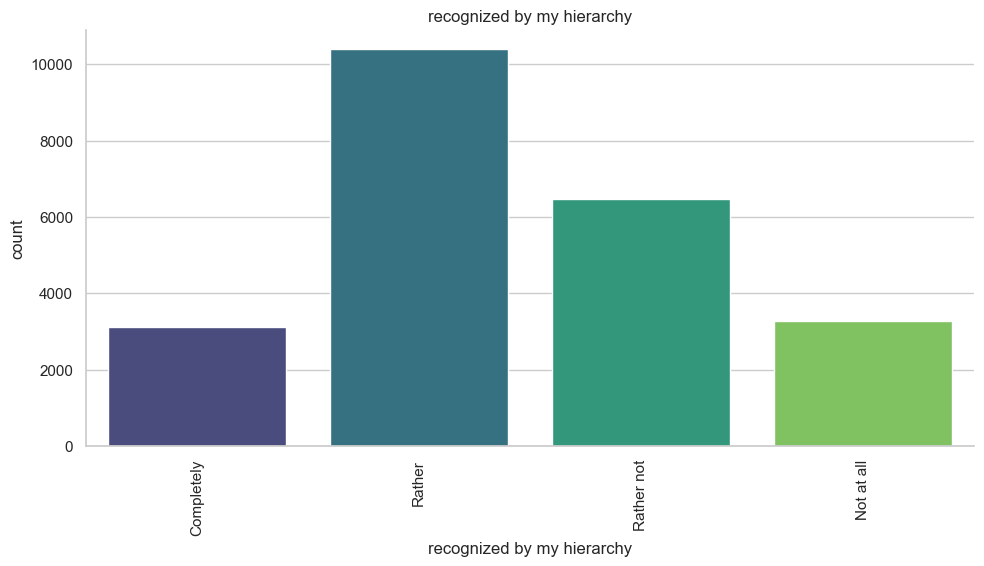

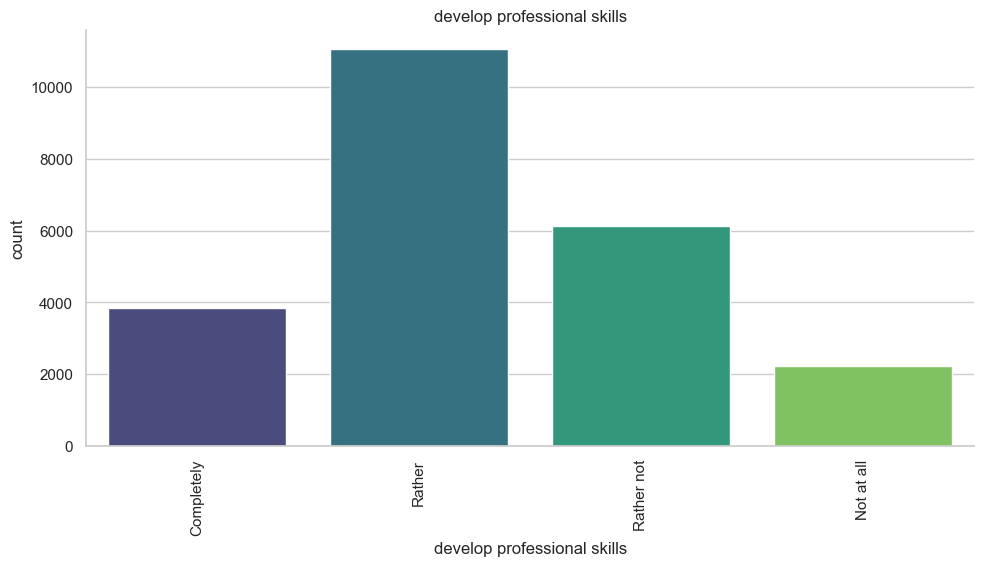

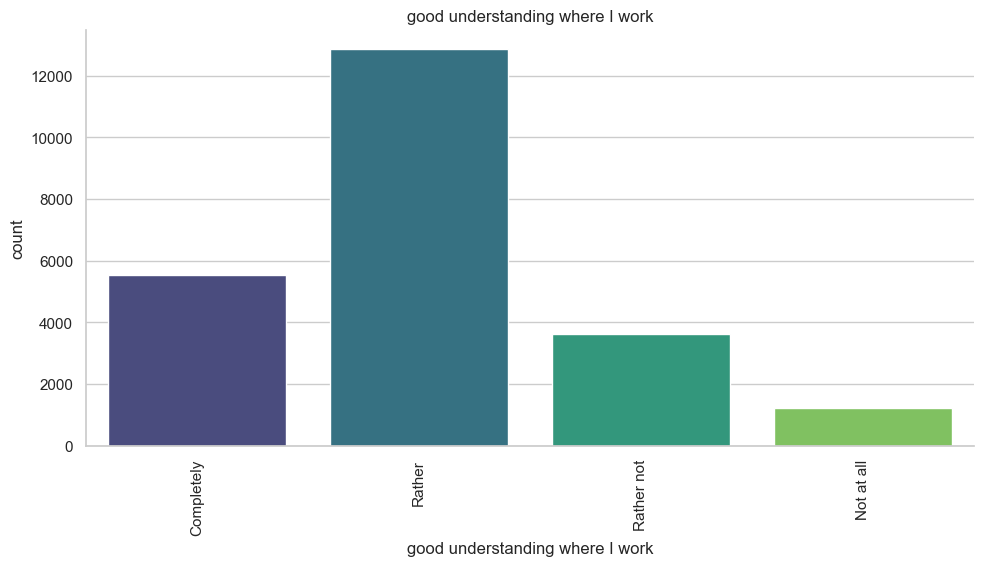

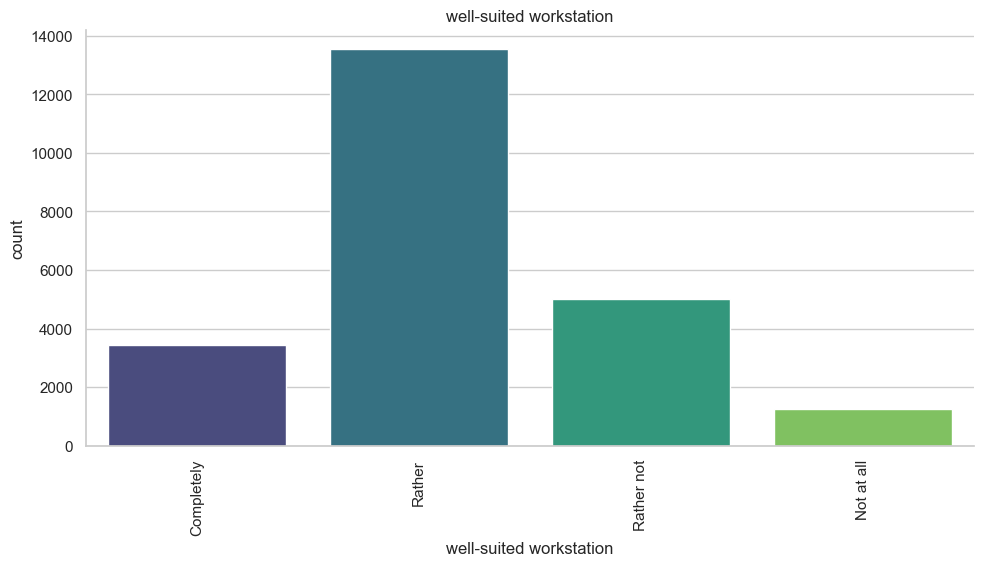

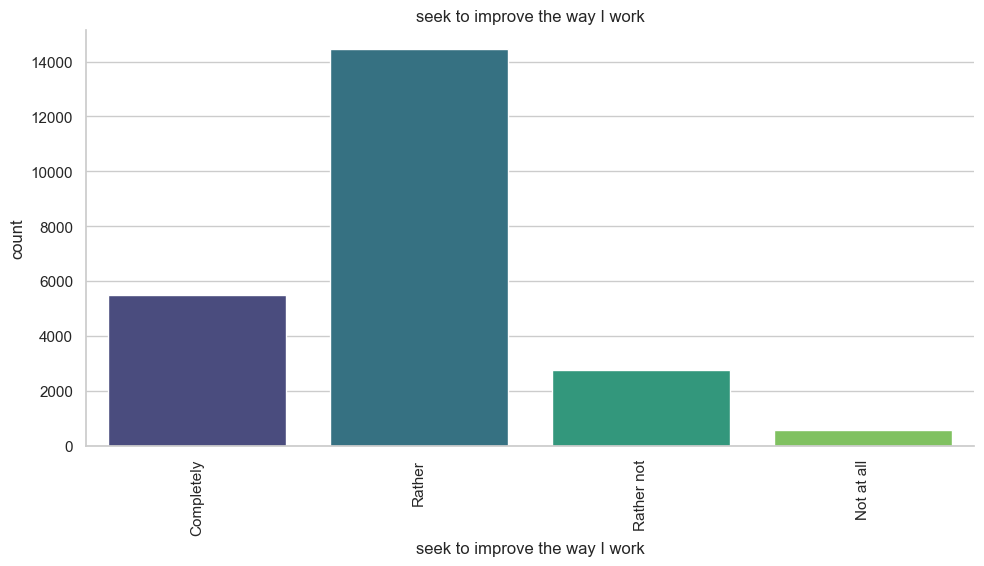

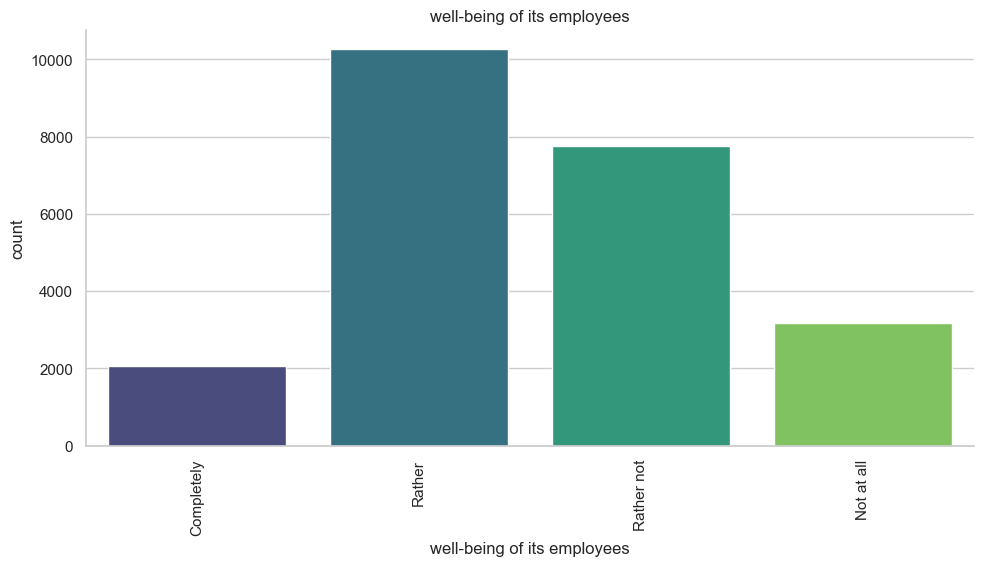

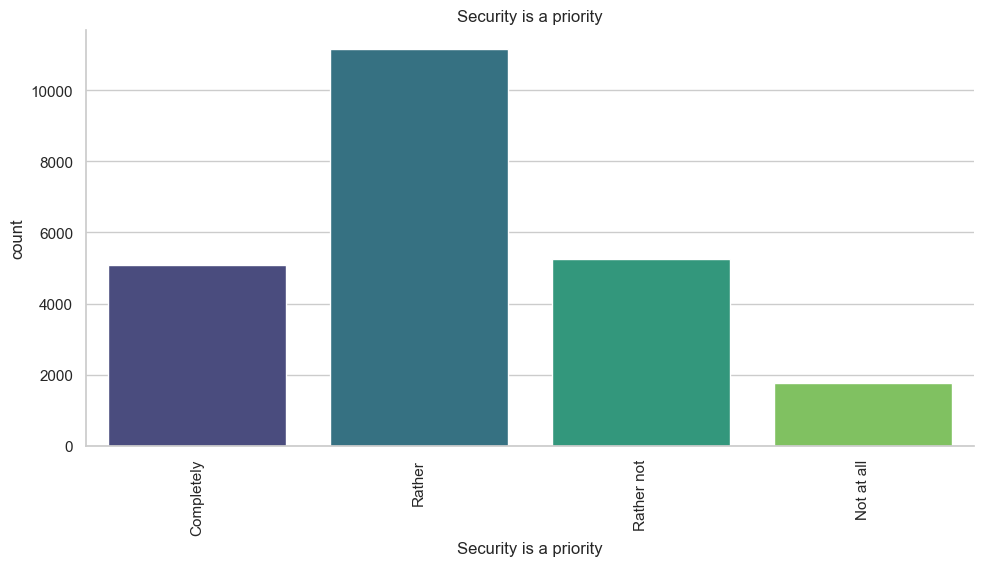

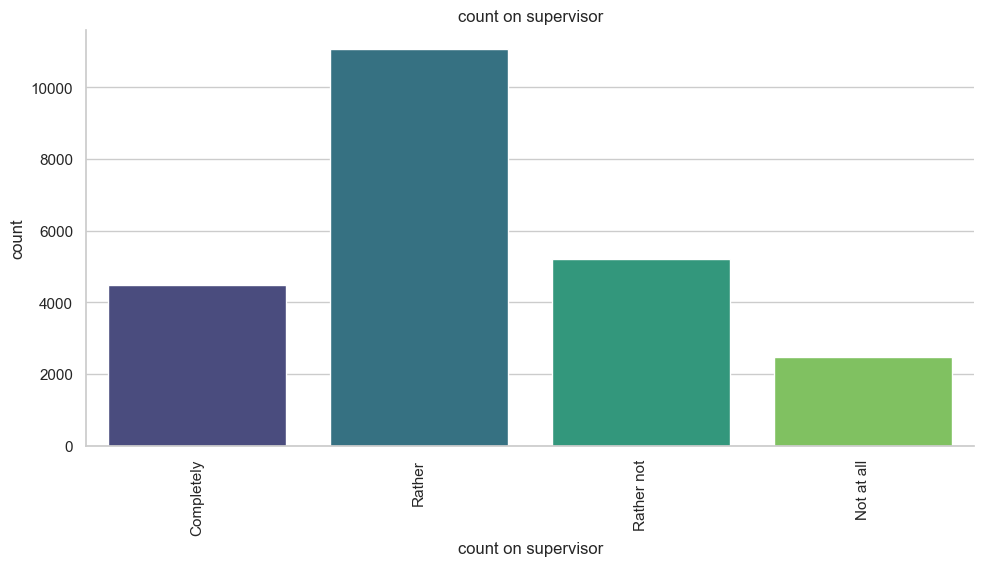

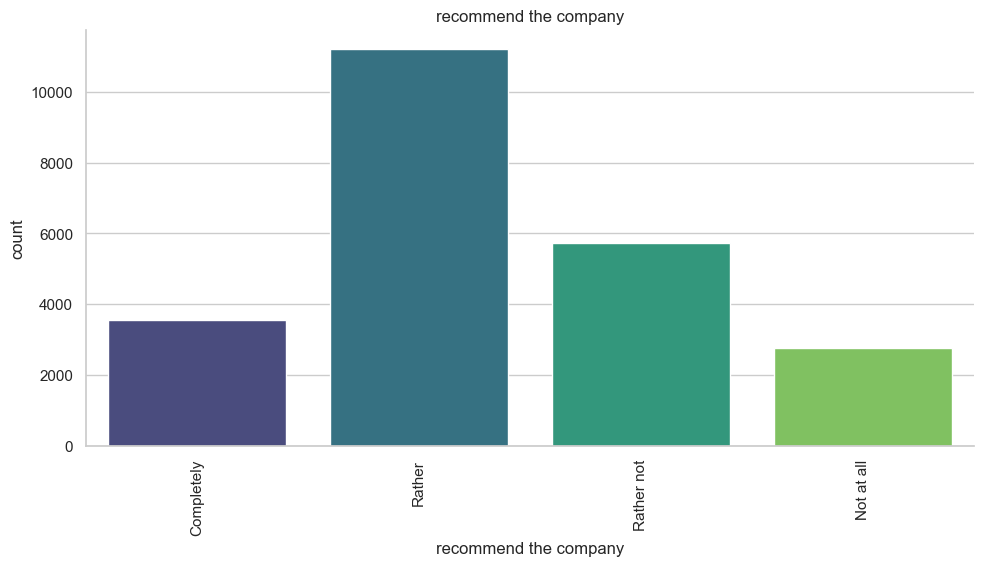

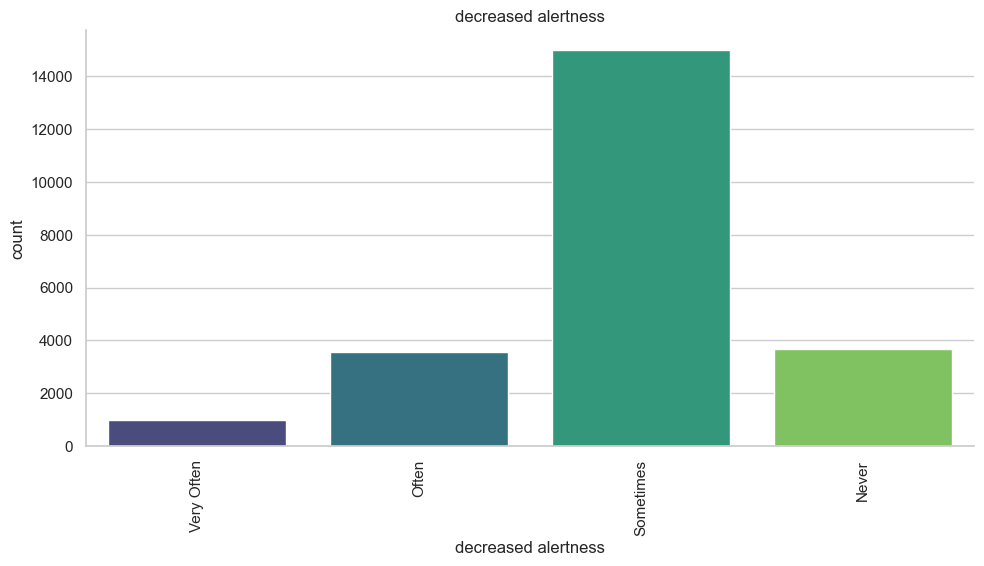

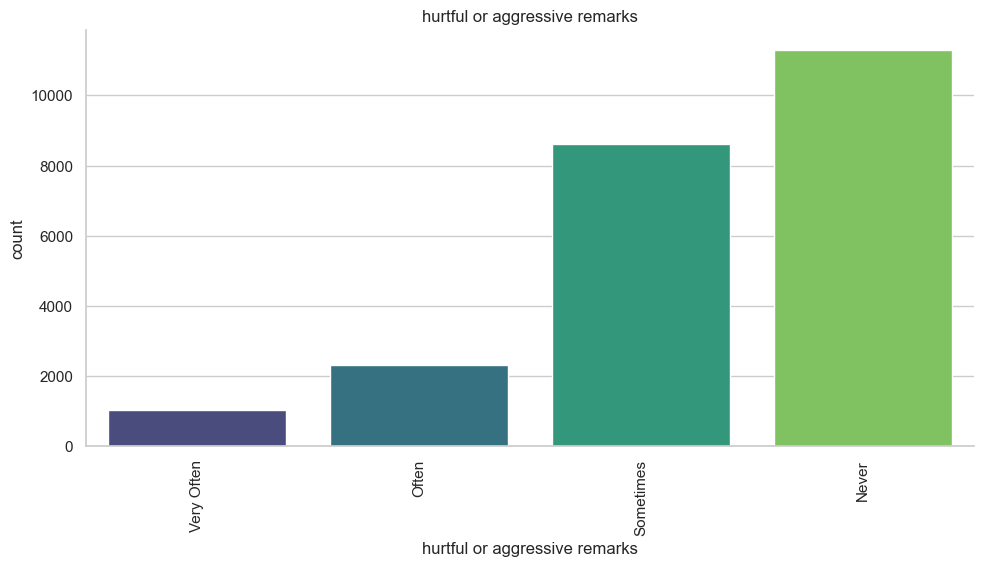

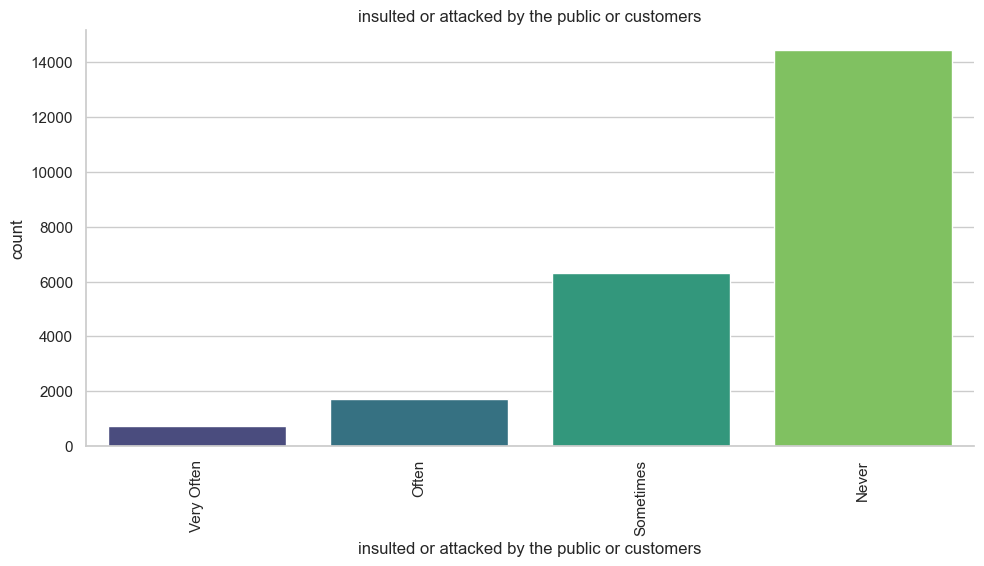

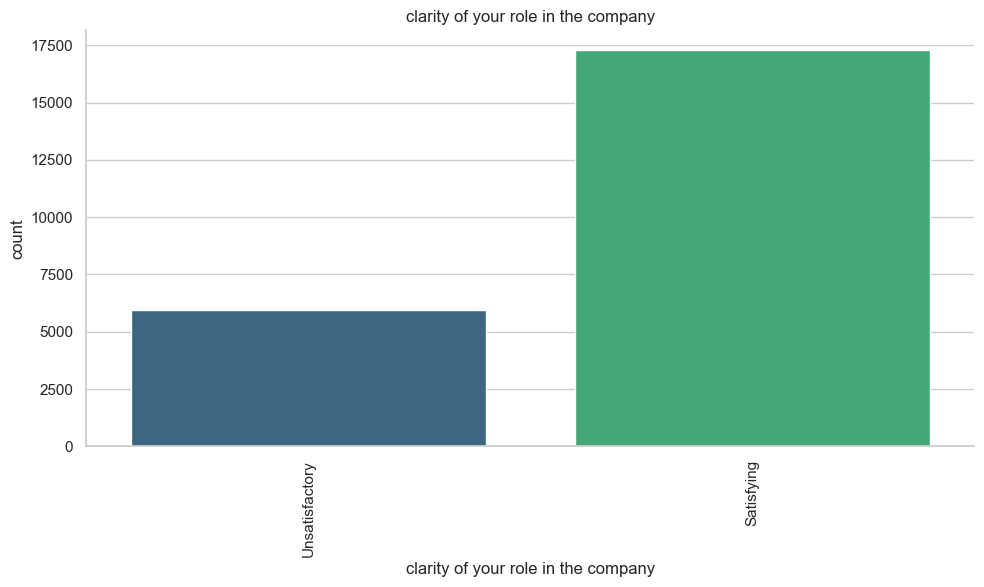

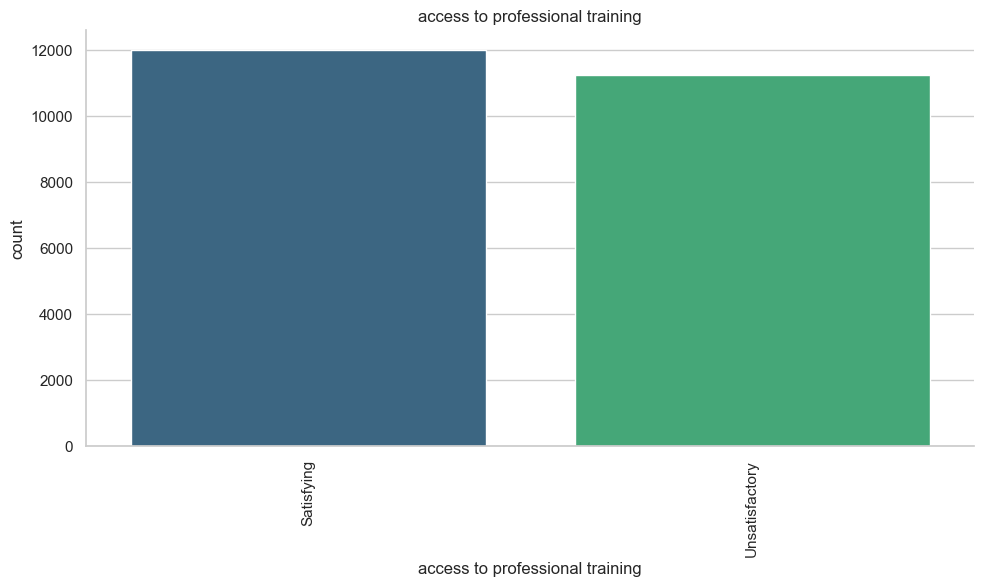

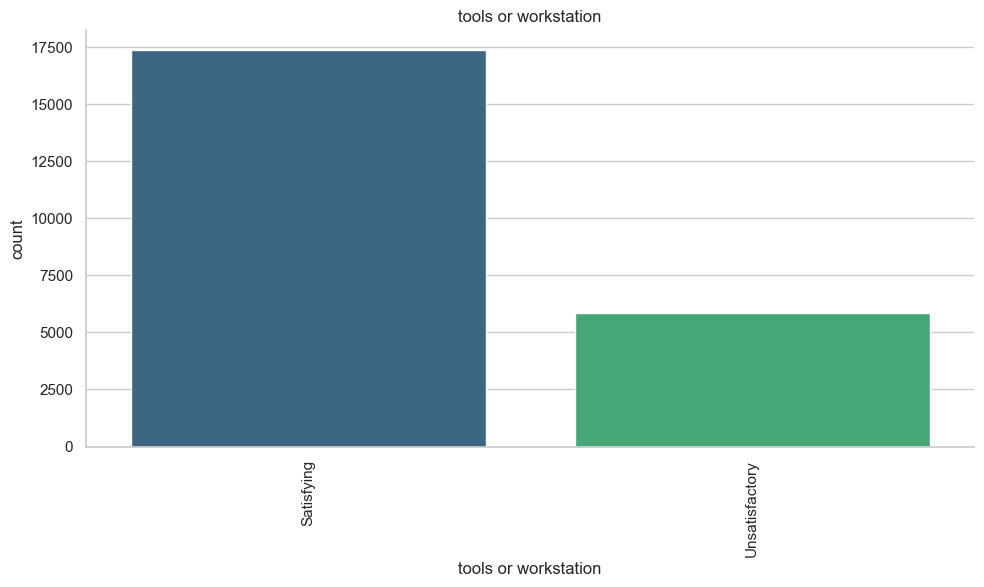

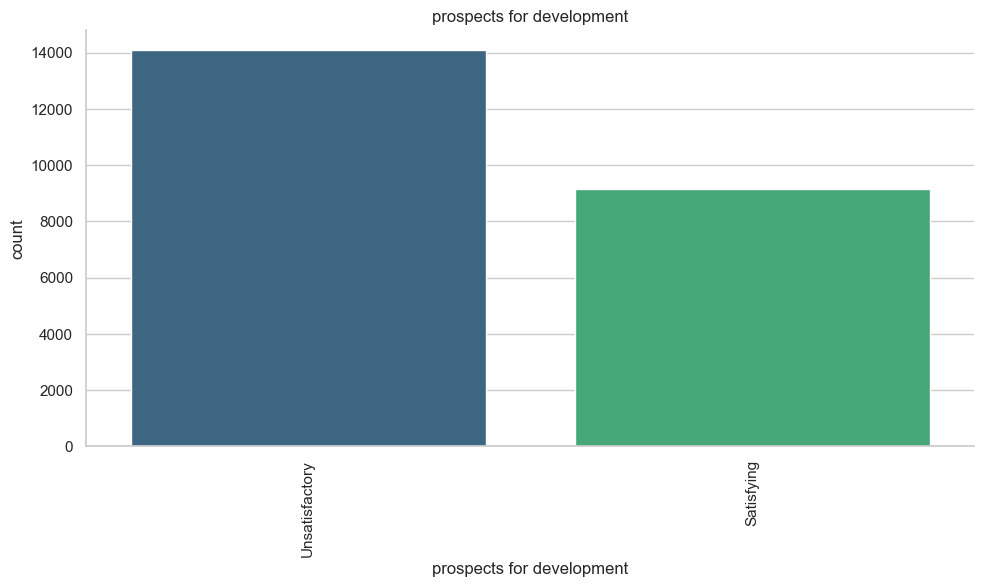

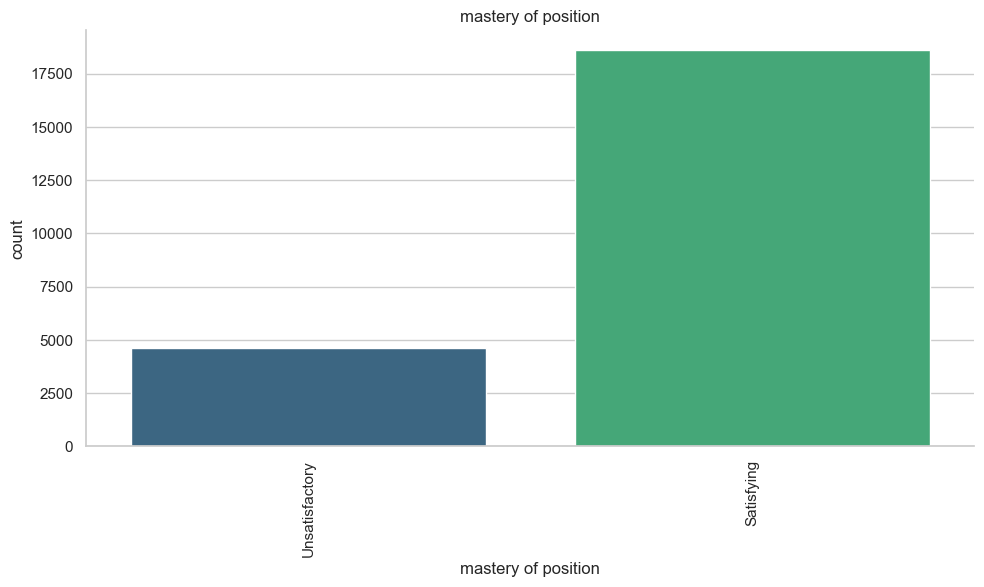

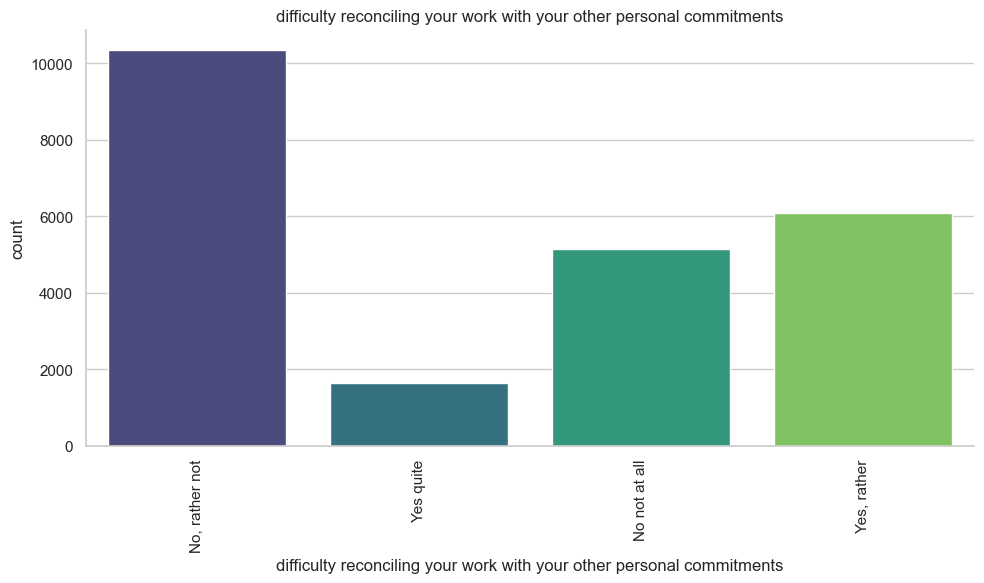

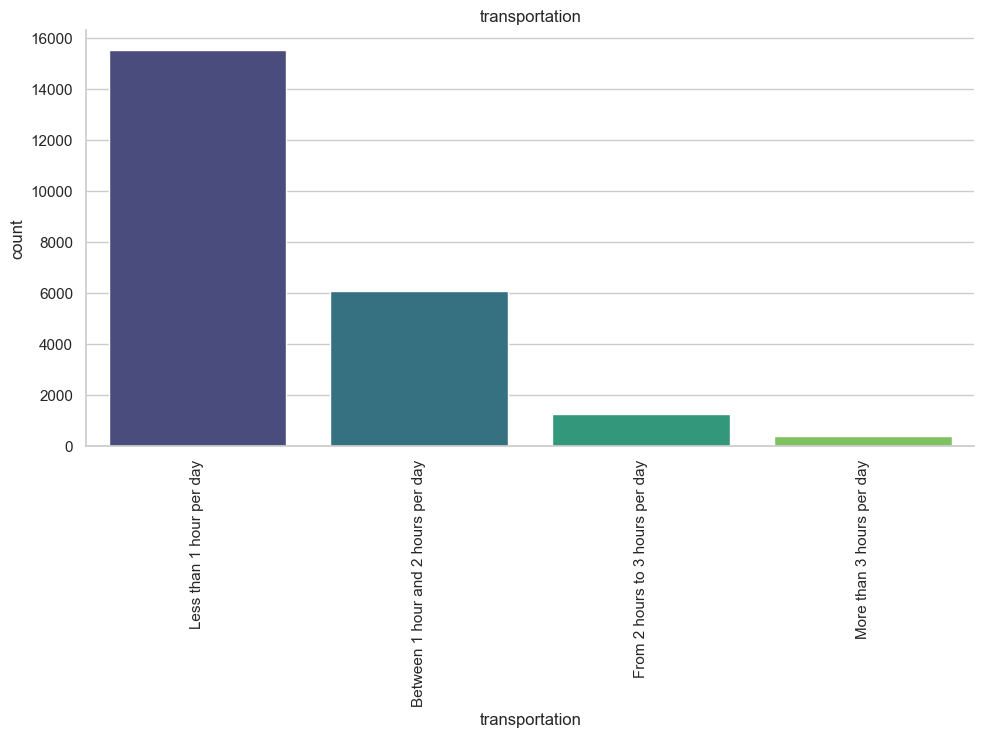

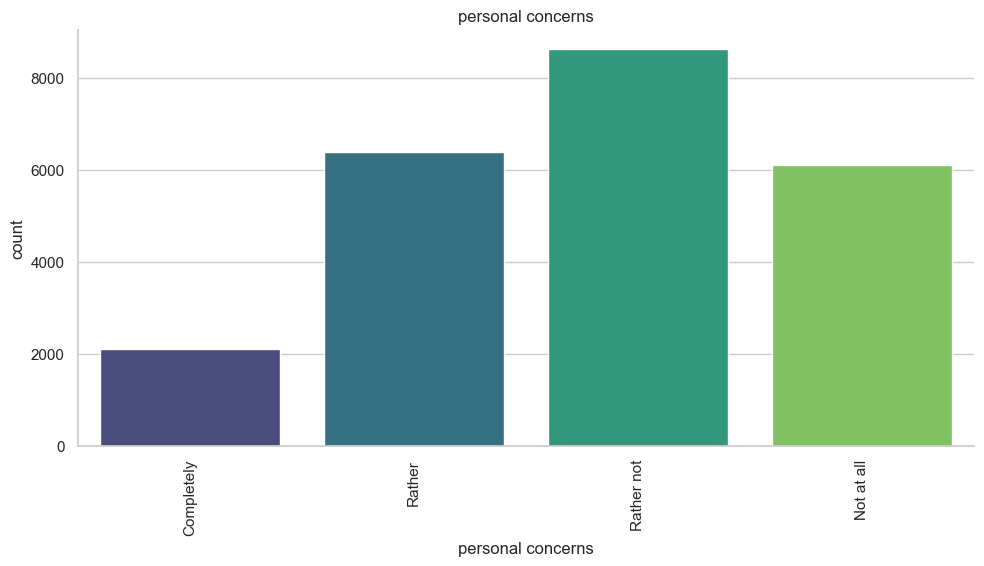

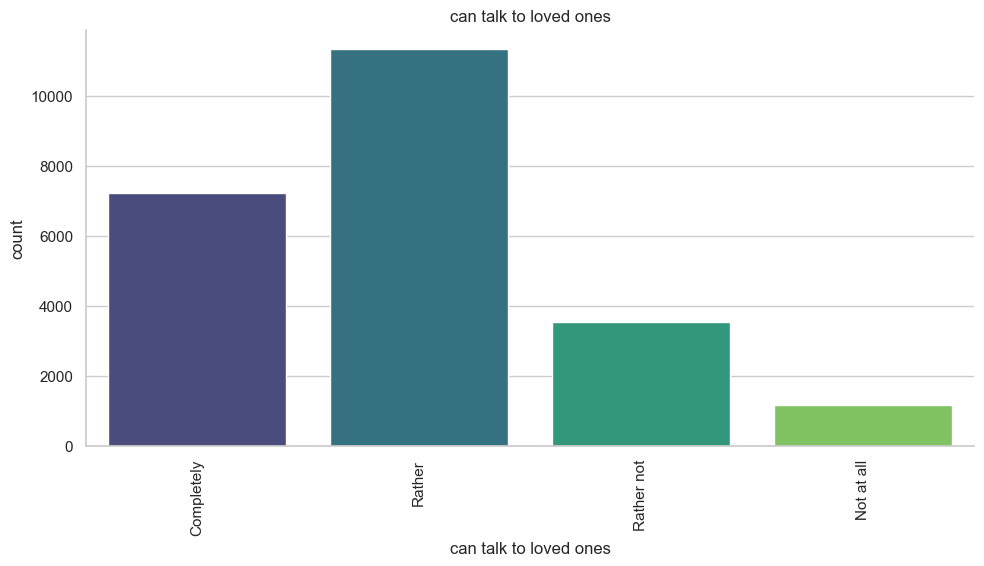

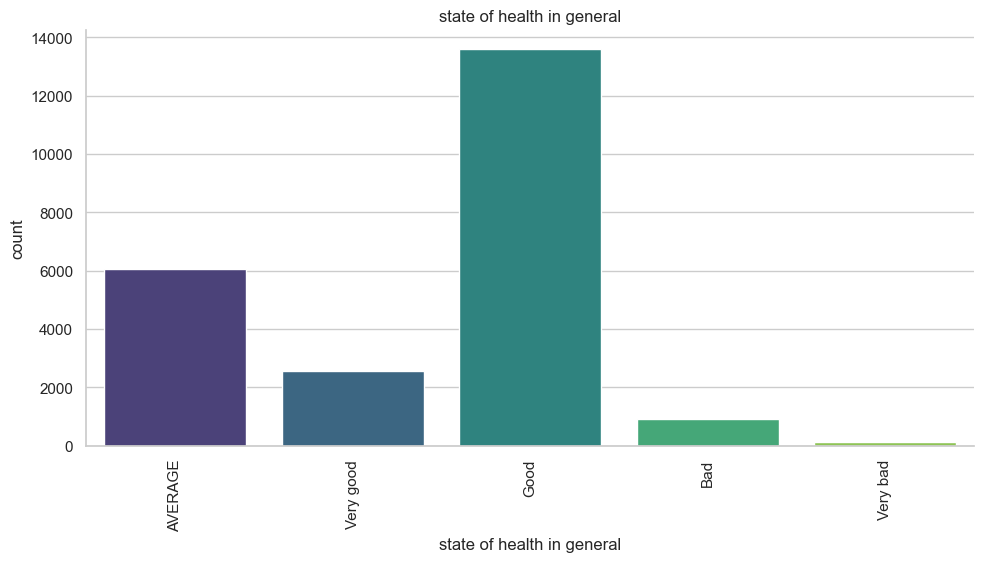

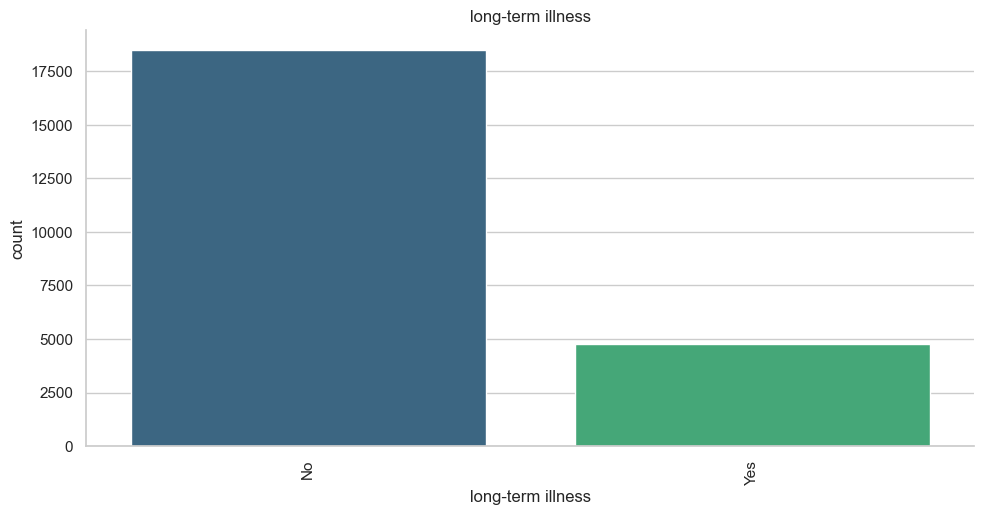

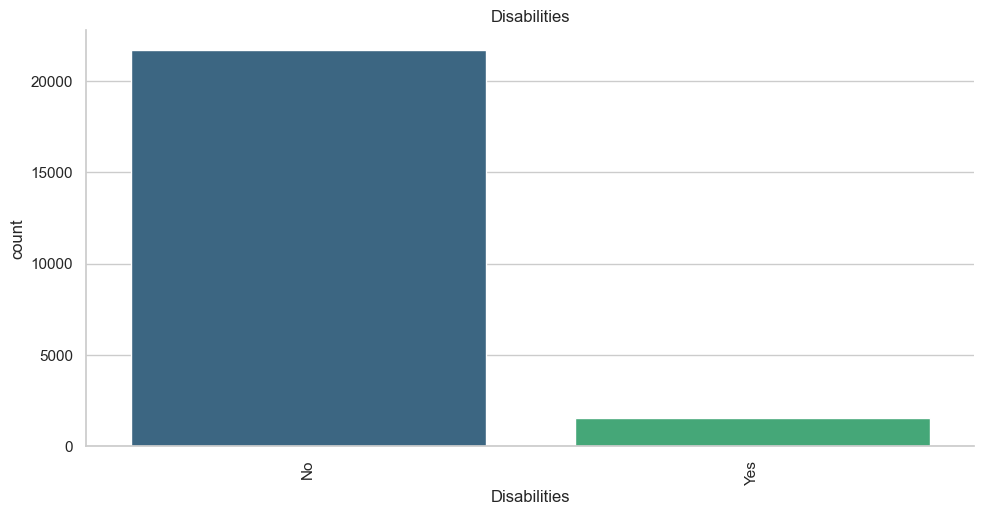

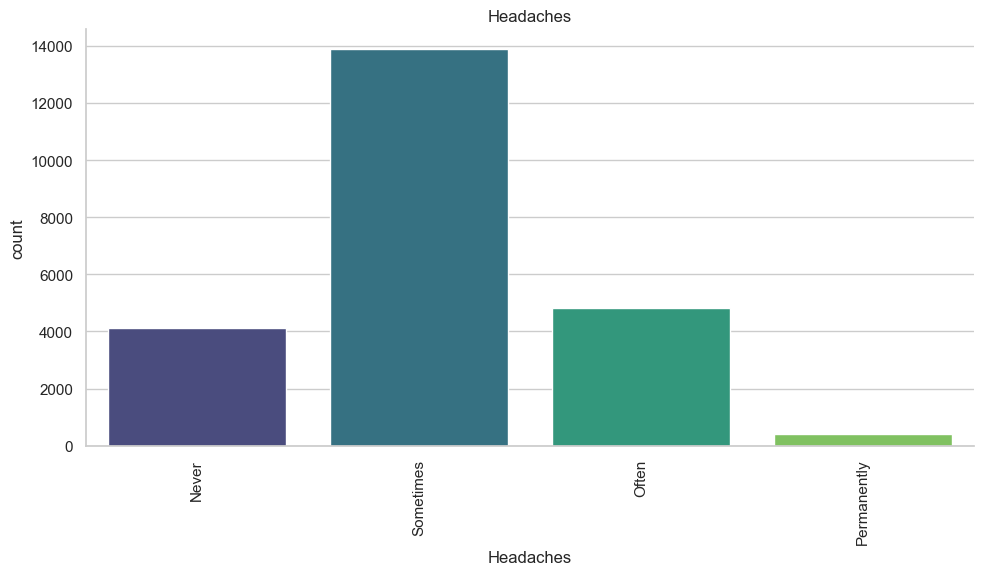

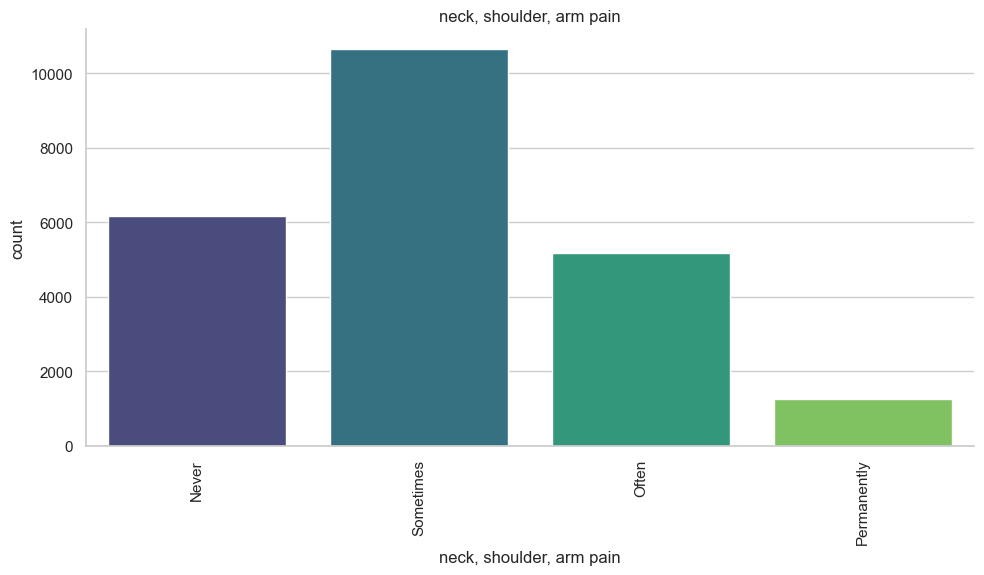

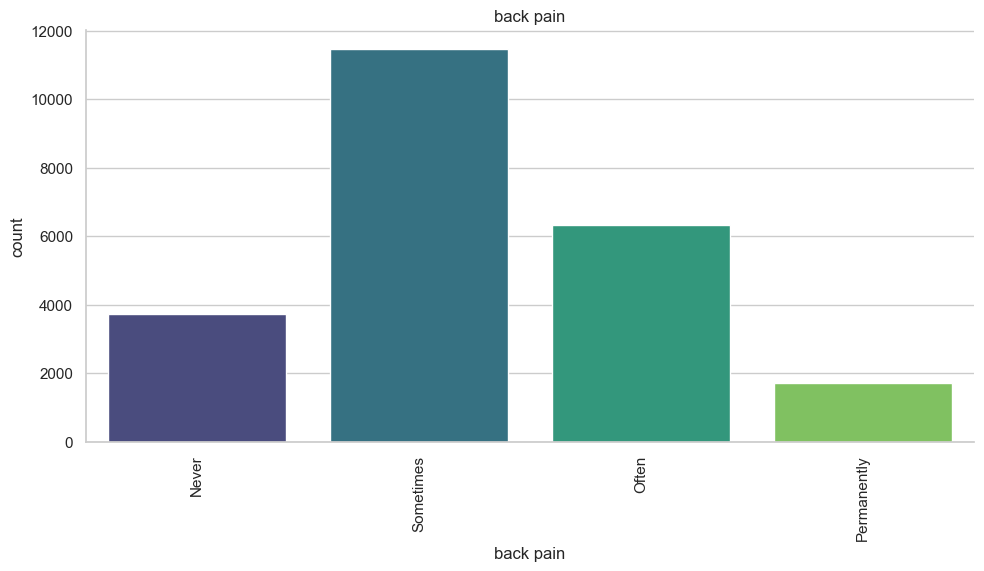

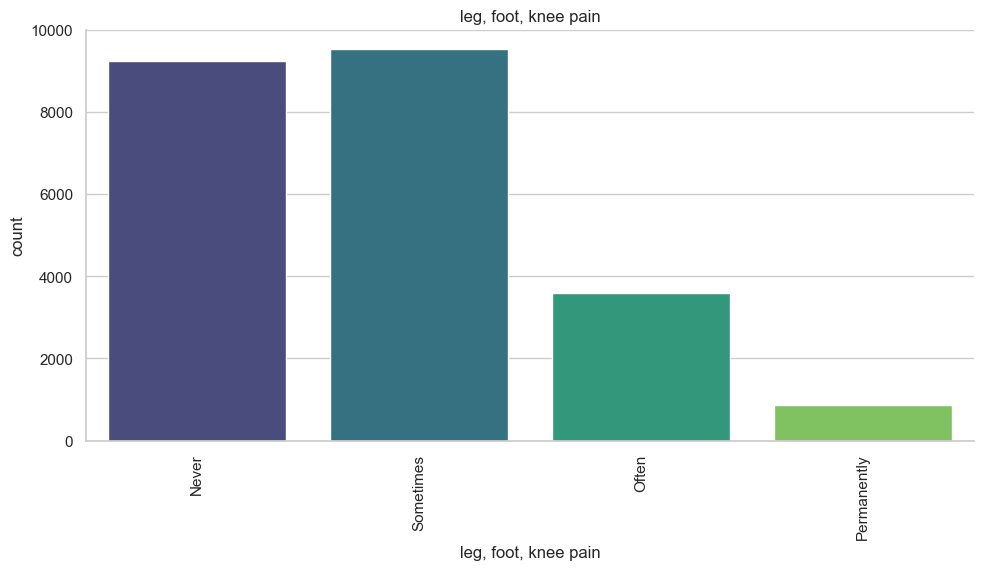

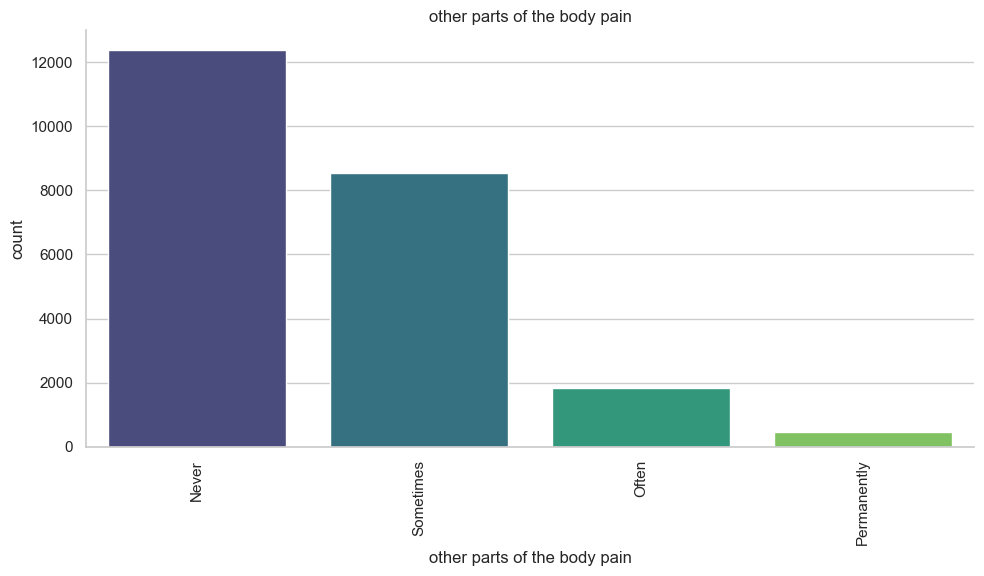

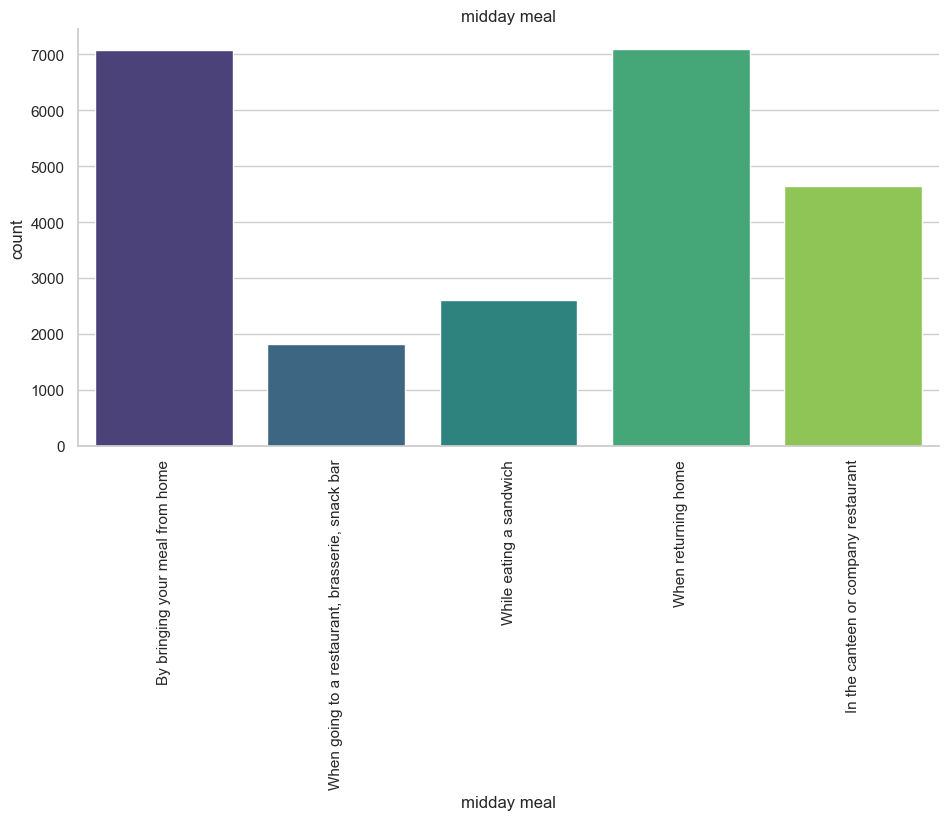

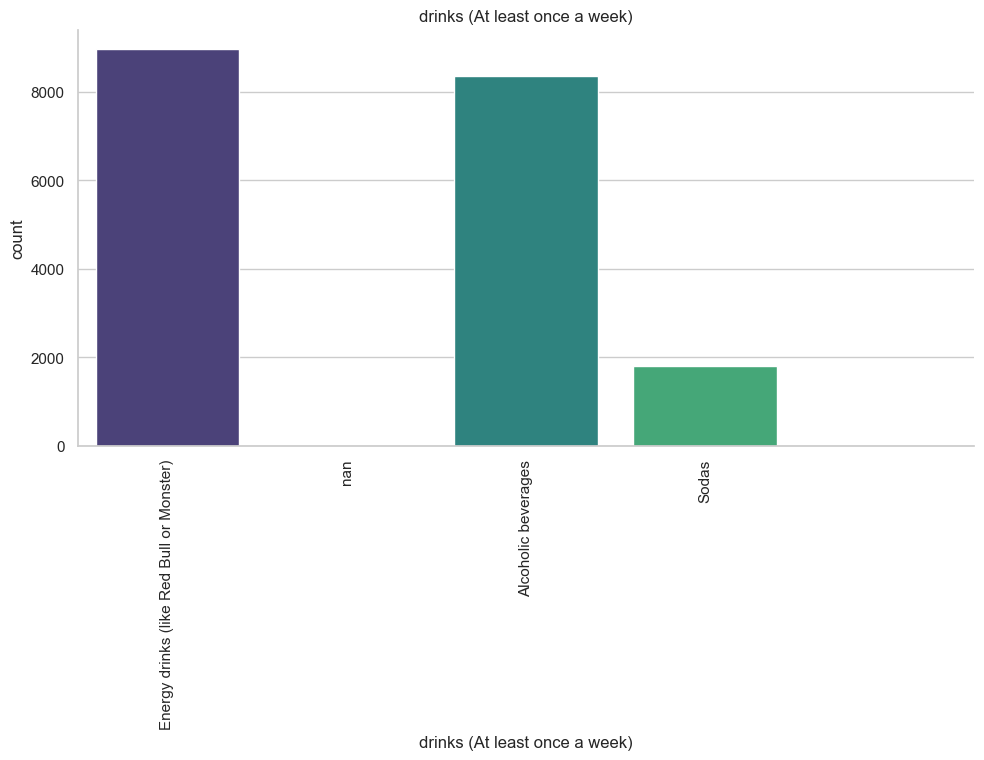

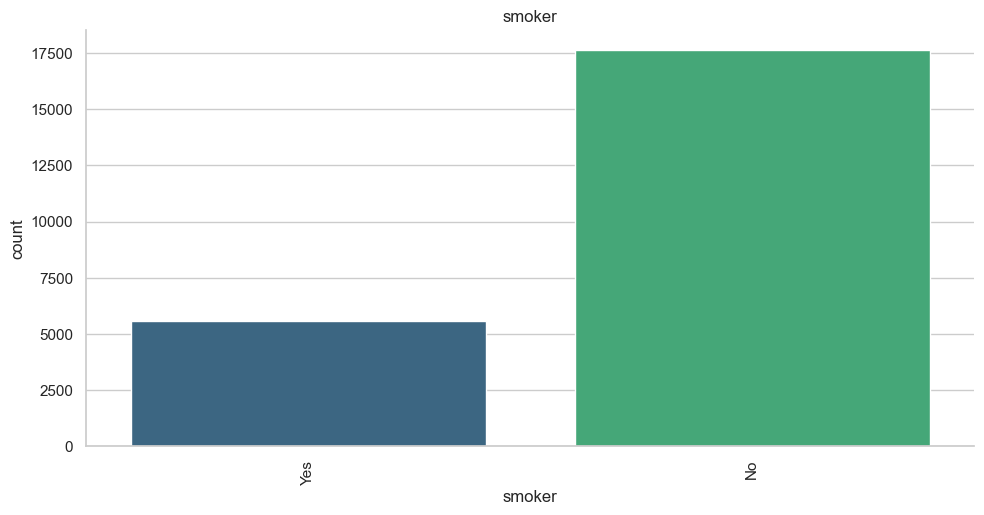

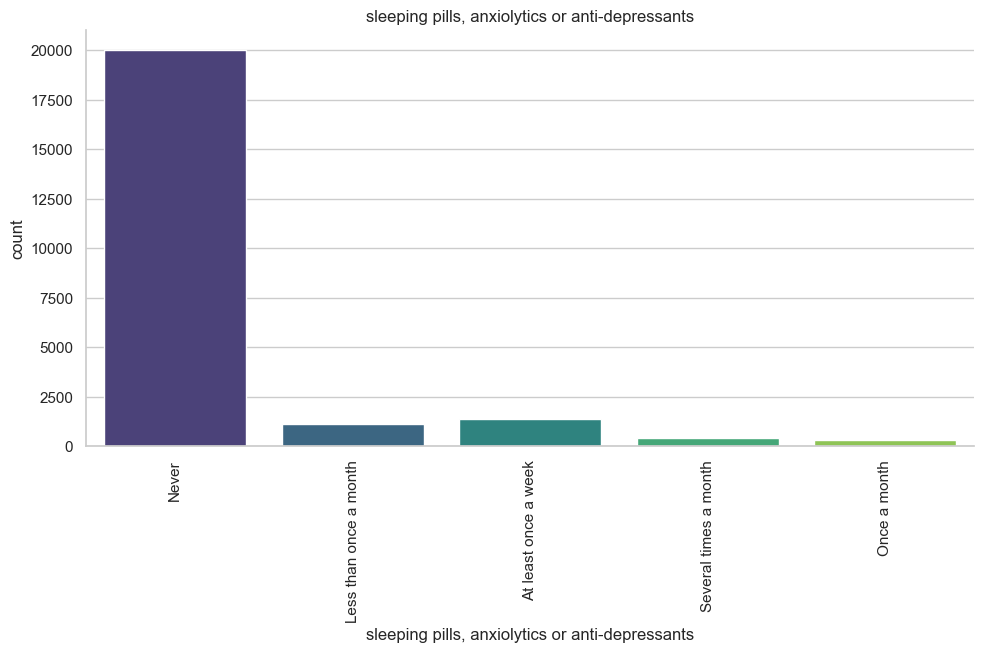

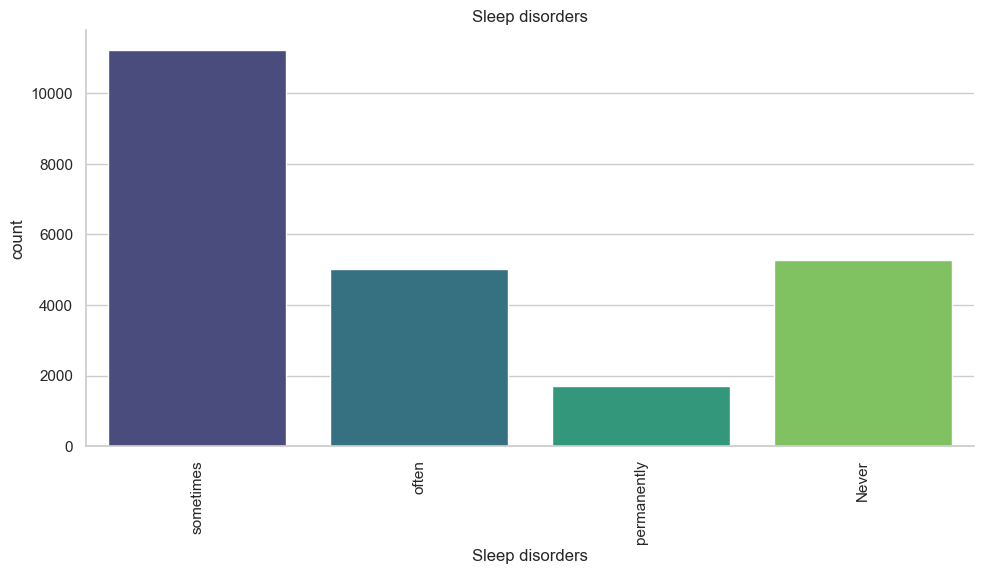

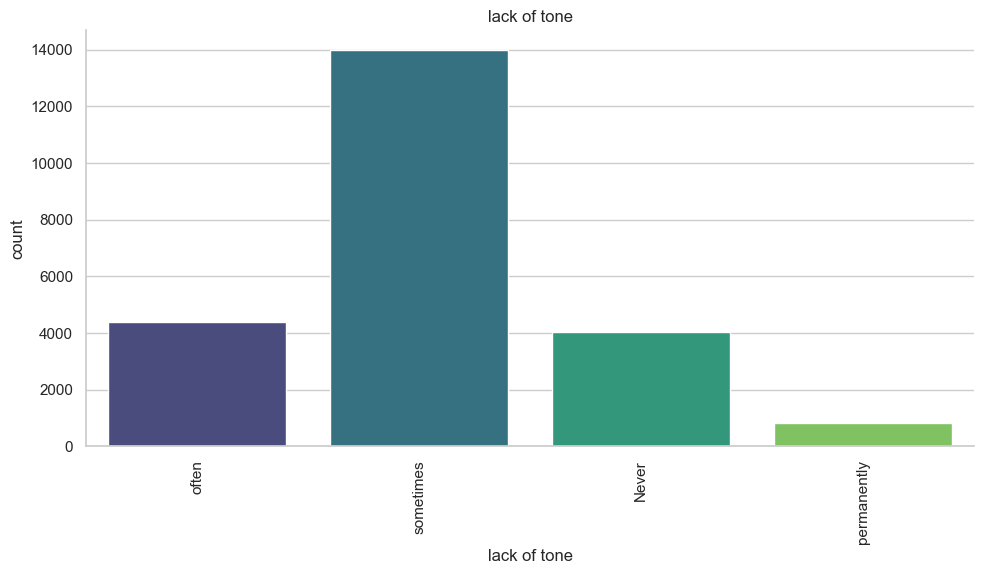

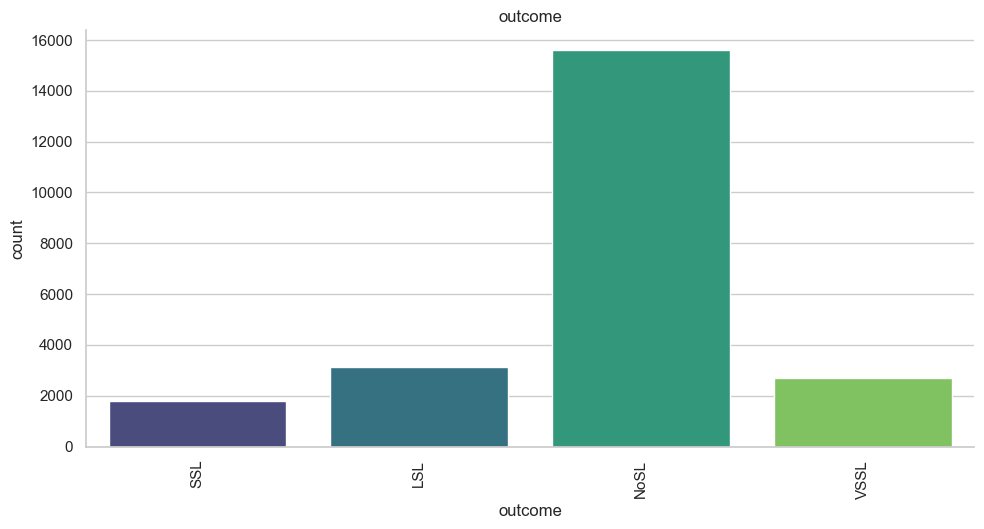

In [7]:
for column in data.columns:
    # print(column)
    # order 
    order = data[column].sort_index().unique()
    x = data[column].value_counts().sort_index().index[0]

    if isinstance(x, str):
        try:
            # Check if the first character is a number and if either the third or fourth character is a dash
            if x[0].isdigit() and (x[2] == "-" or x[3] == "-"): 
                try:
                    order = sorted(data[column].unique(), key=extract_starting_number)
                except:
                    order = data[column].value_counts().sort_index().index
            else:
                
                # if all the values in data[column].unique() are in custom_orders1 then sort them according to the custom order1
                if all(elem in custom_orders1 for elem in data[column].unique()):
                    order = sorted(data[column].unique(), key=lambda y: custom_orders1.index(y))
                    

                if all(elem in custom_orders2 for elem in data[column].unique()):
                    order = sorted(data[column].unique(), key=lambda y: custom_orders2.index(y))
                    

                if all(elem in custom_orders3 for elem in data[column].unique()):
                    order = sorted(data[column].unique(), key=lambda y: custom_orders3.index(y))
                    

                if all(elem in custom_orders4 for elem in data[column].unique()):
                    order = sorted(data[column].unique(), key=lambda y: custom_orders4.index(y))
                    

                if all(elem in custom_orders5 for elem in data[column].unique()):
                    order = sorted(data[column].unique(), key=lambda y: custom_orders5.index(y))
                    
        except Exception as e:
            print("Exception:", e)
            continue
    
    # plot
    sns.catplot(data=data, x=column, kind="count", height=5, aspect=2 , palette="viridis", orient="h", dodge=False, order=order)
    plt.title(column)
    plt.xticks(rotation=90)
    # replace "/" with "_"
    column = column.replace("/", "_")
    plt.savefig(f"outputs/00_data_analysis/2_{column}.png", dpi=300, bbox_inches='tight')
    plt.show()

Gender


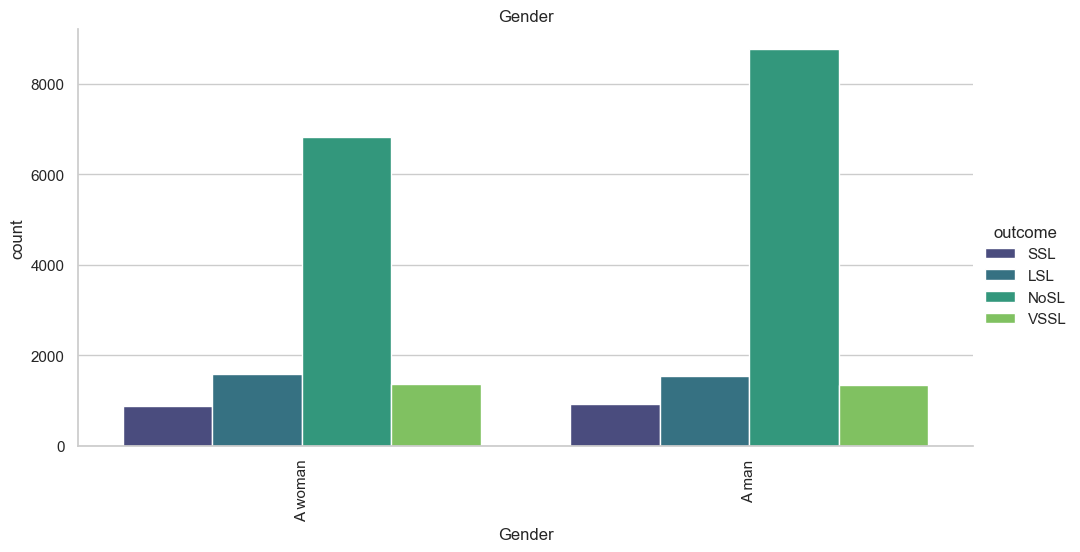

Age


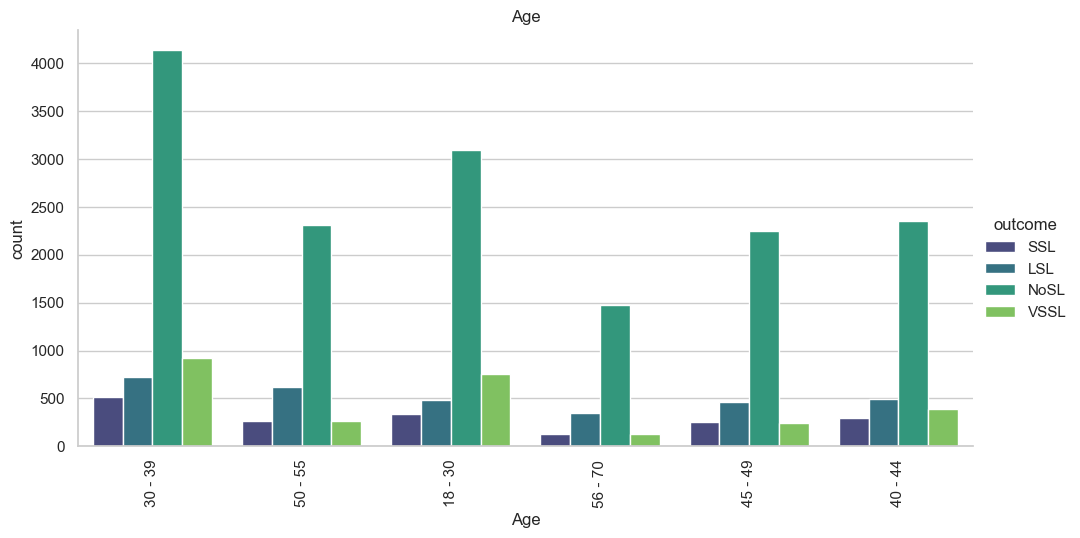

Work type


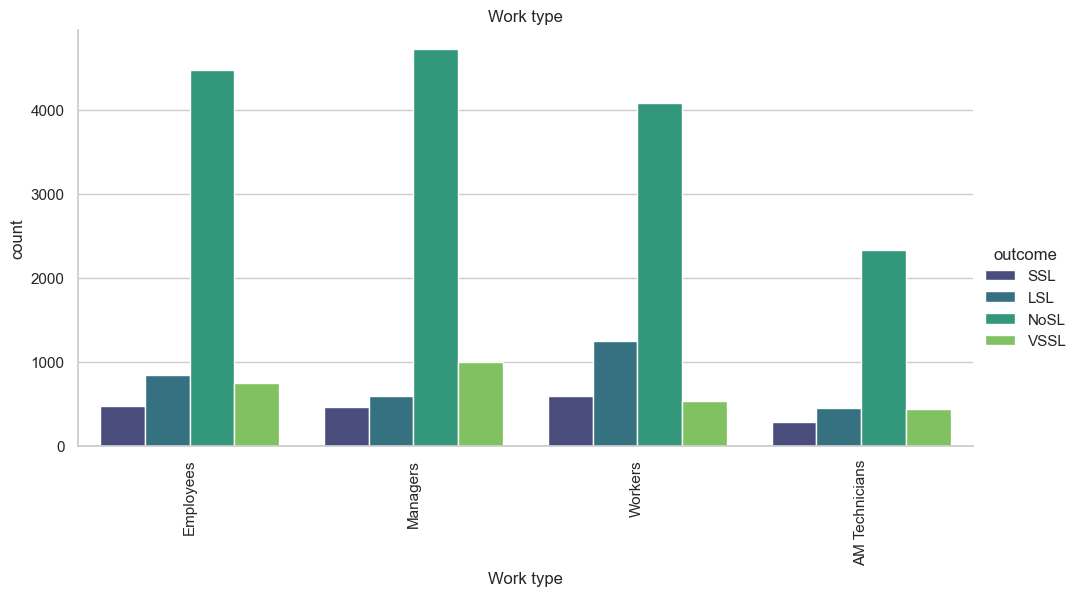

sector


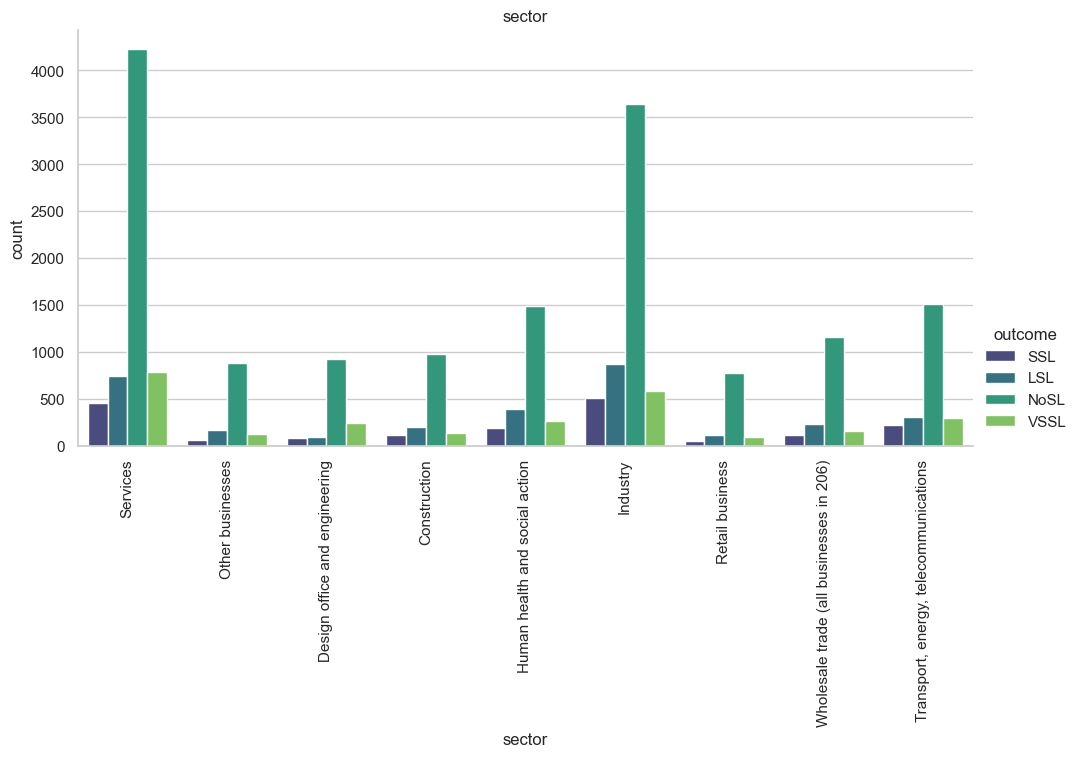

size of business


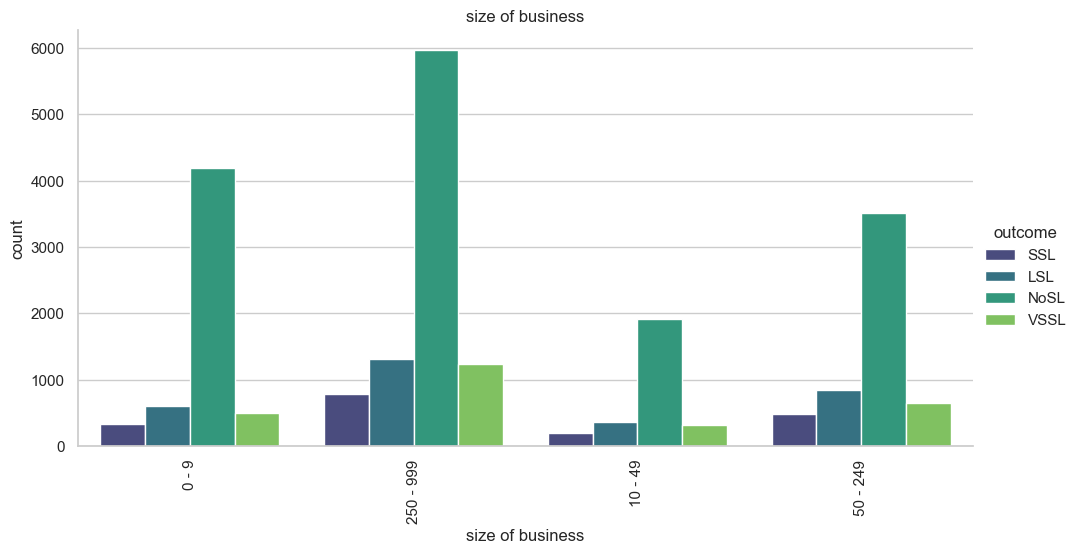

No of 3 to 6 years old children


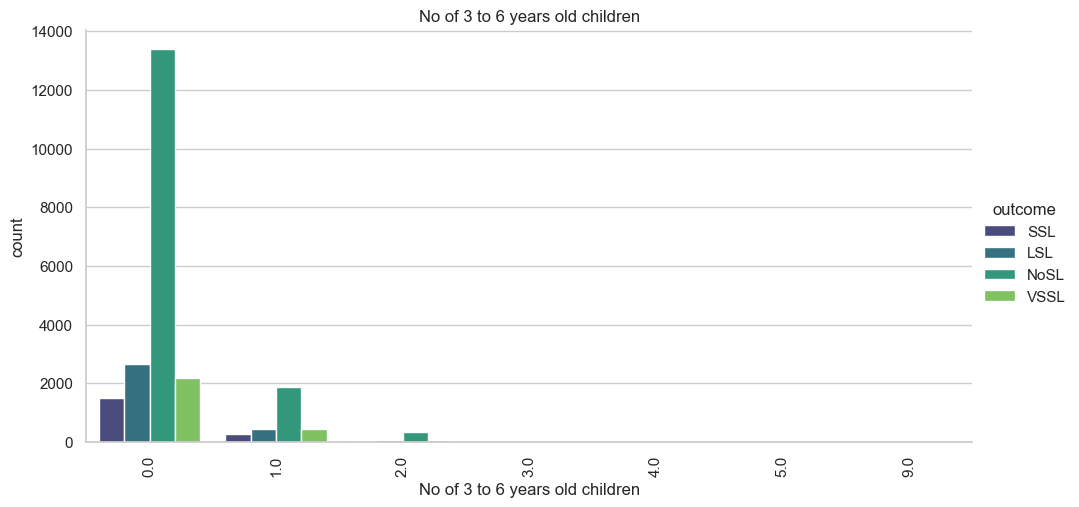

No of 7 to 12 years old children


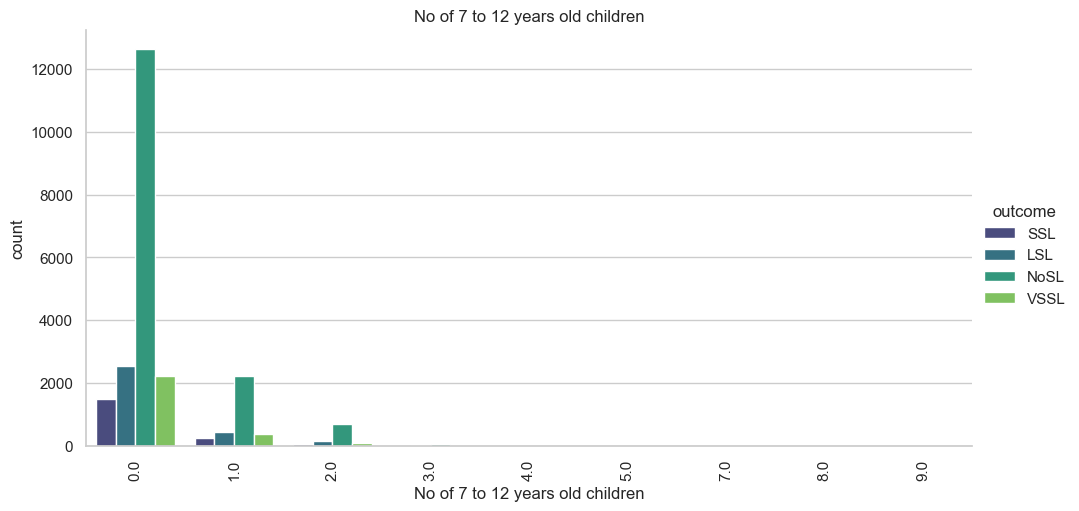

No of 13 to 17 years old children


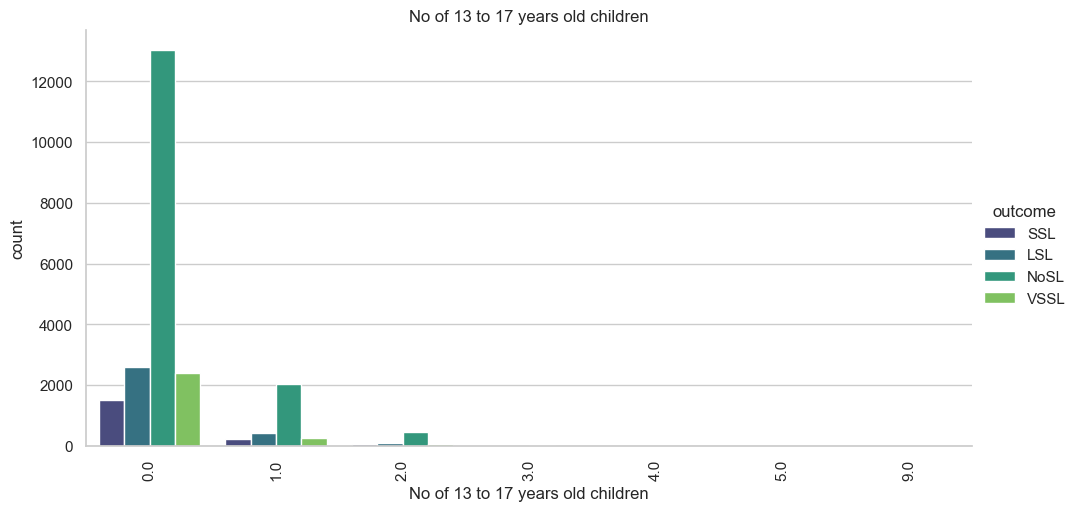

No of 18 years and over children


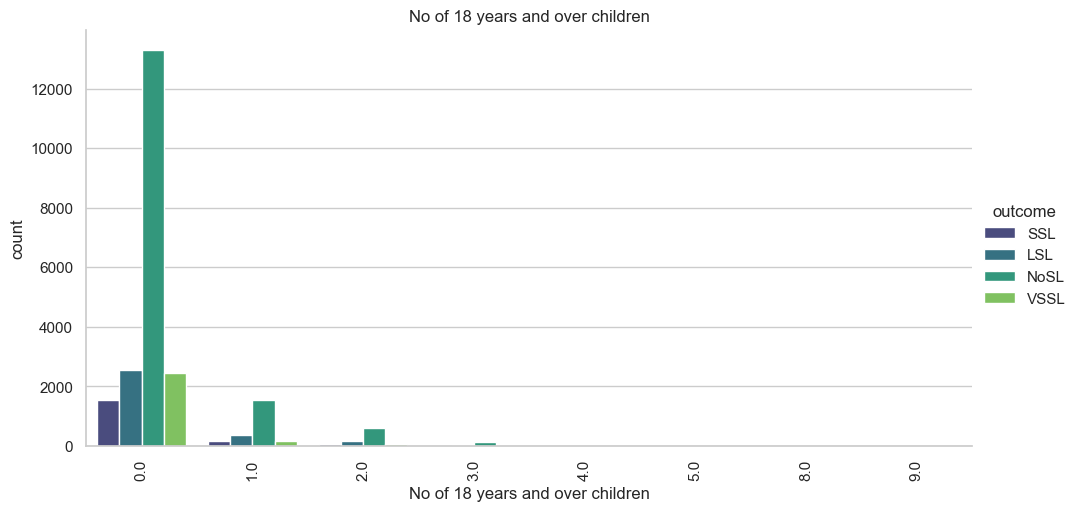

dependents


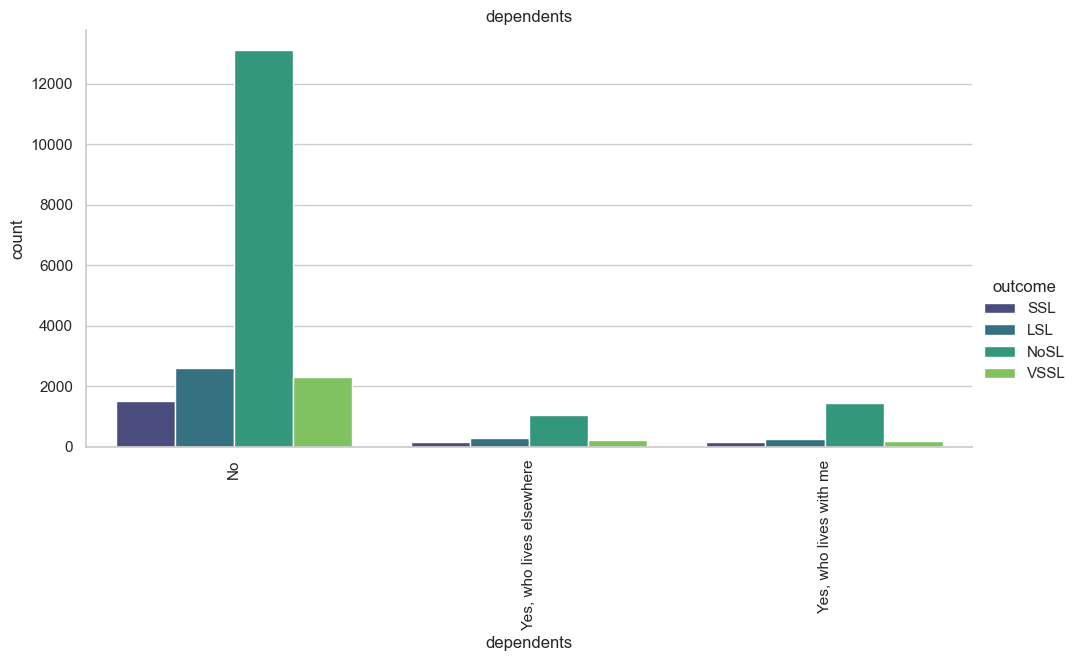

Full Time/Part Time


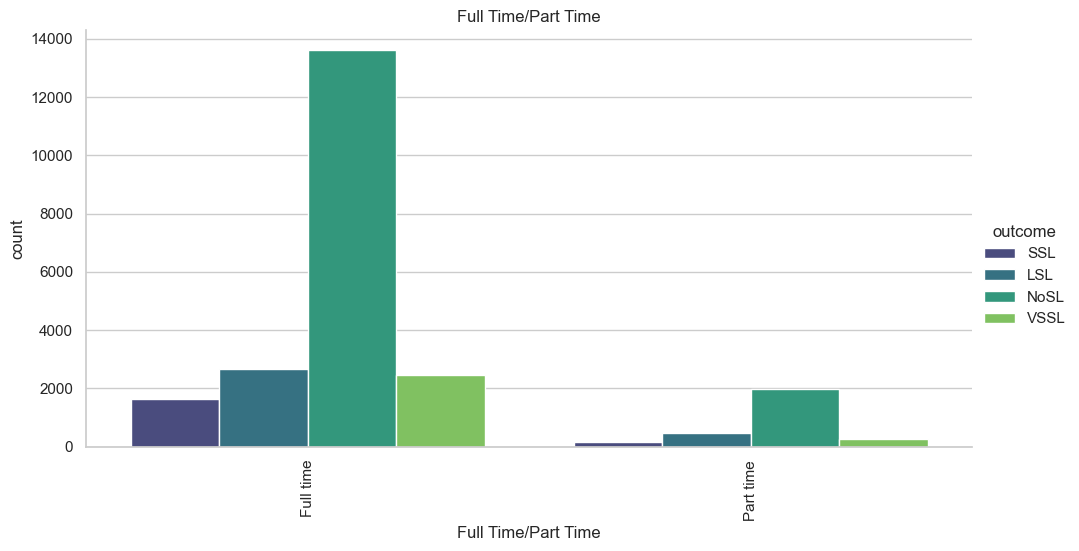

shift work with alternating hours


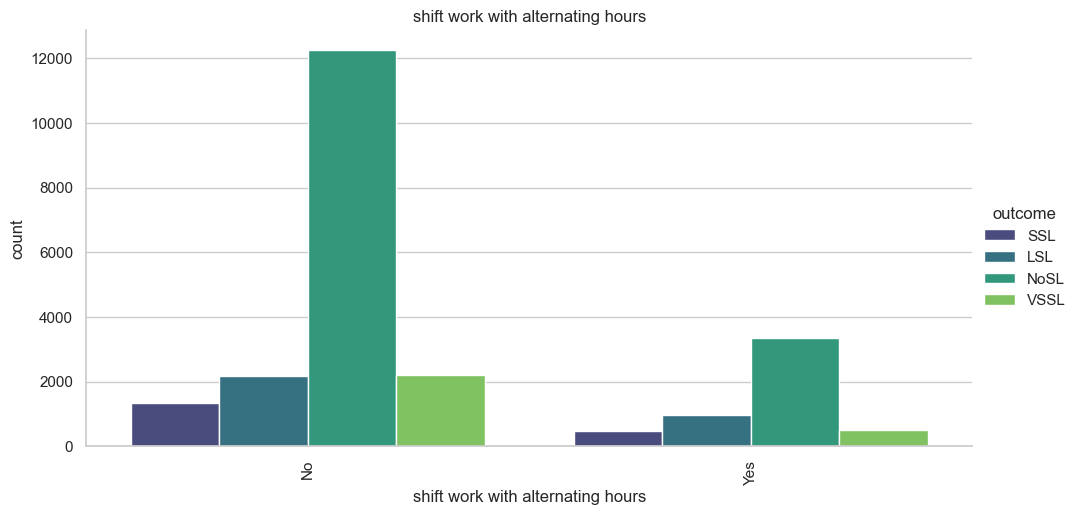

Place of work


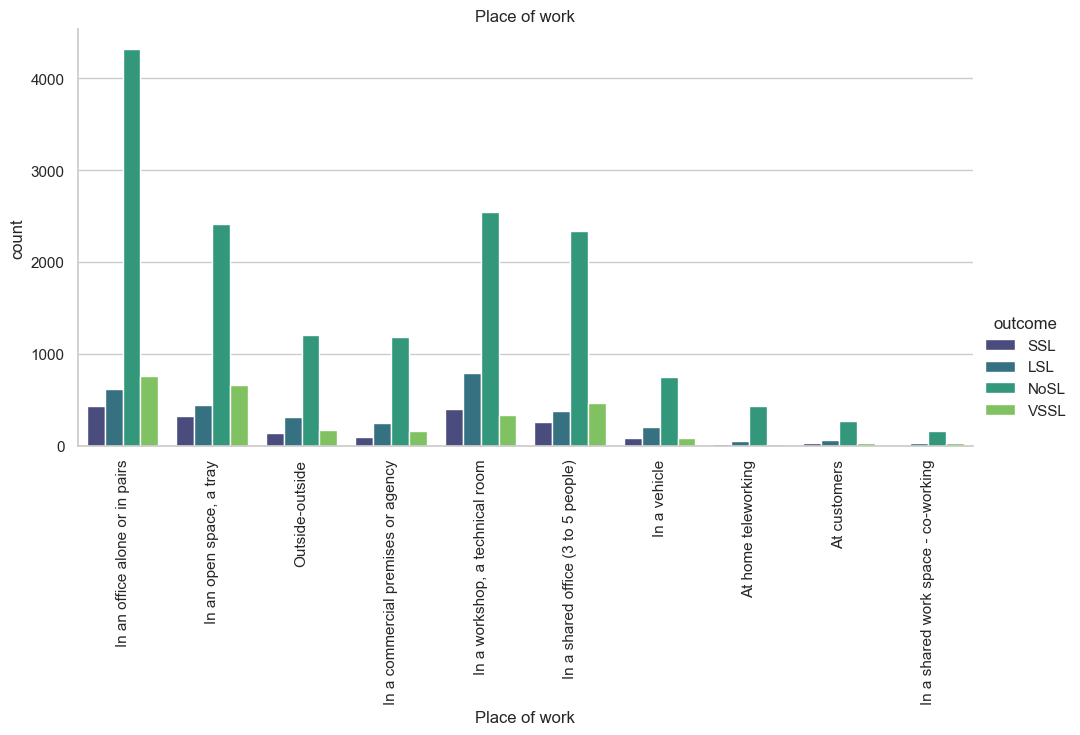

standing or in an awkward posture


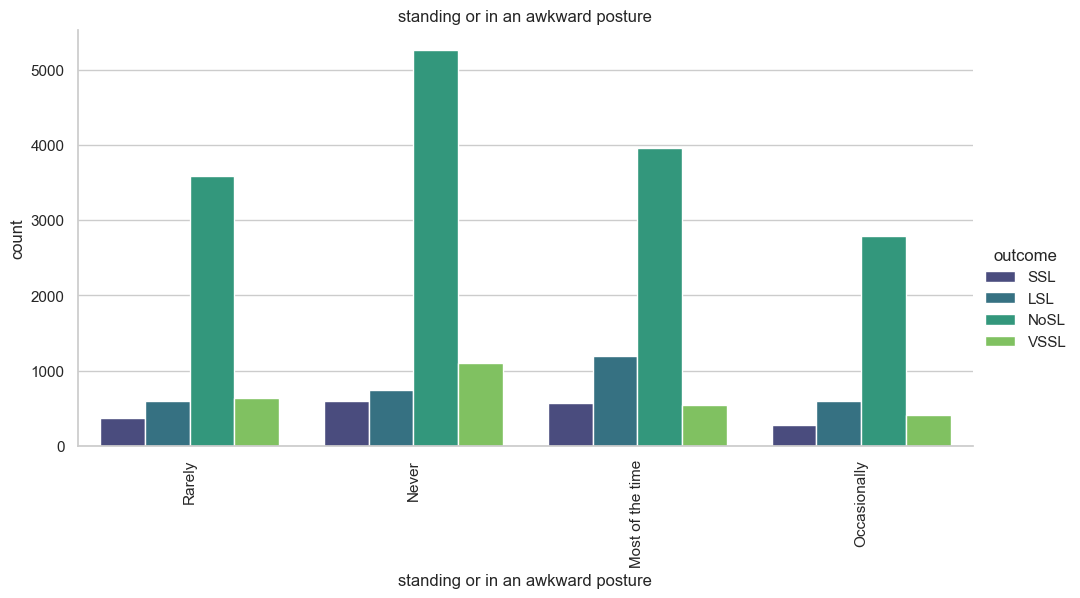

carry or move heavy loads


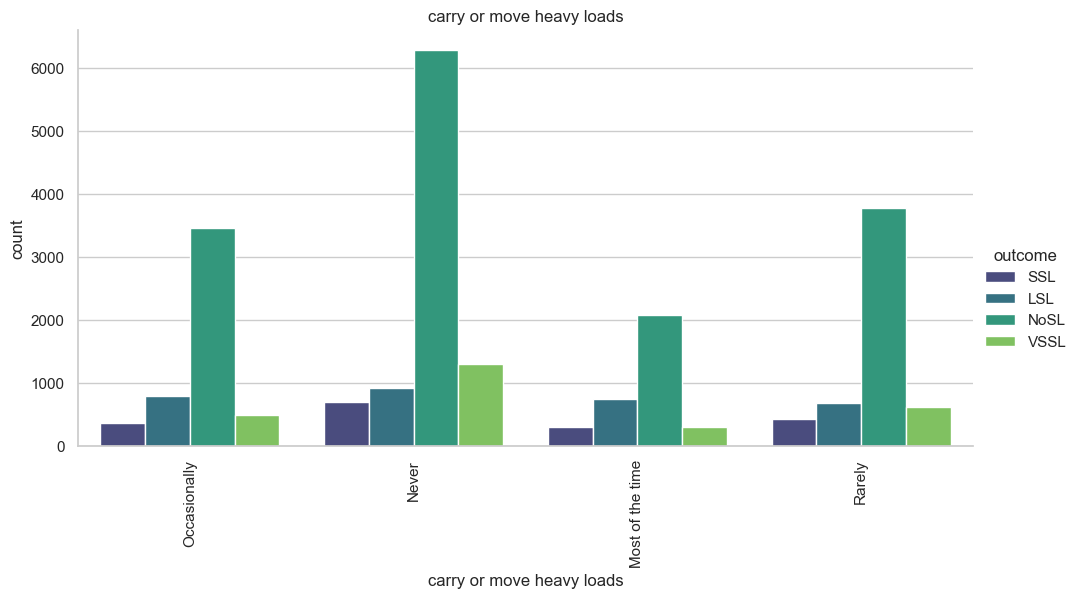

perform repetitive gestures


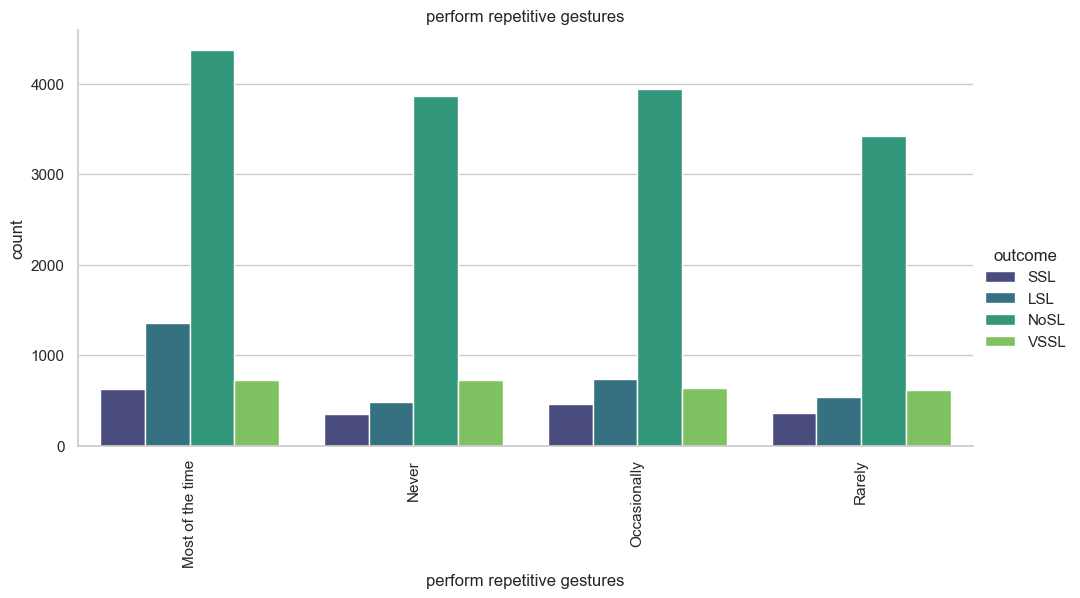

work on screen


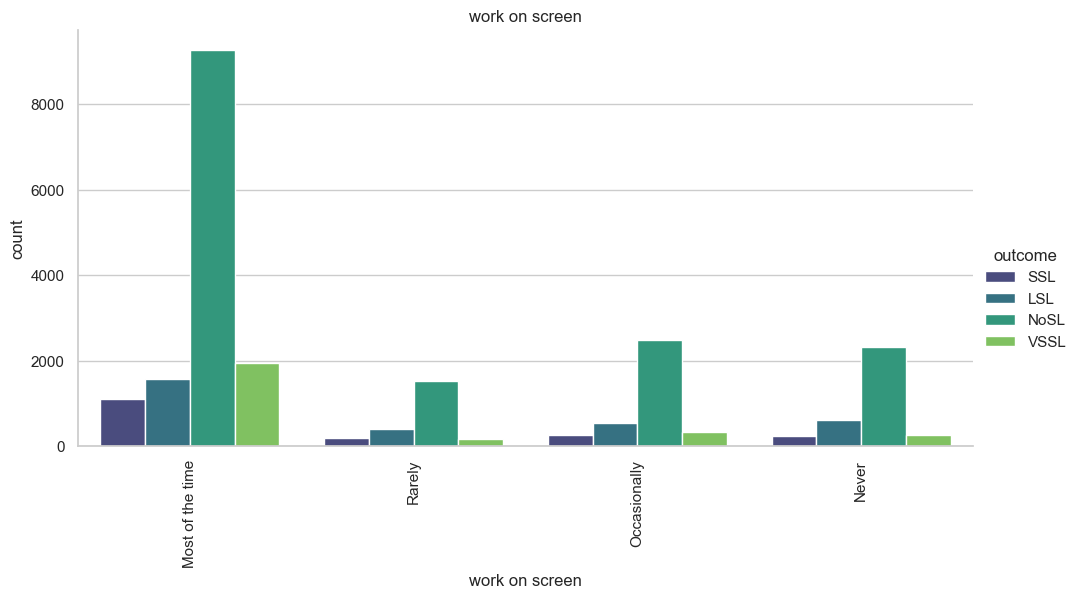

cold/ hot env


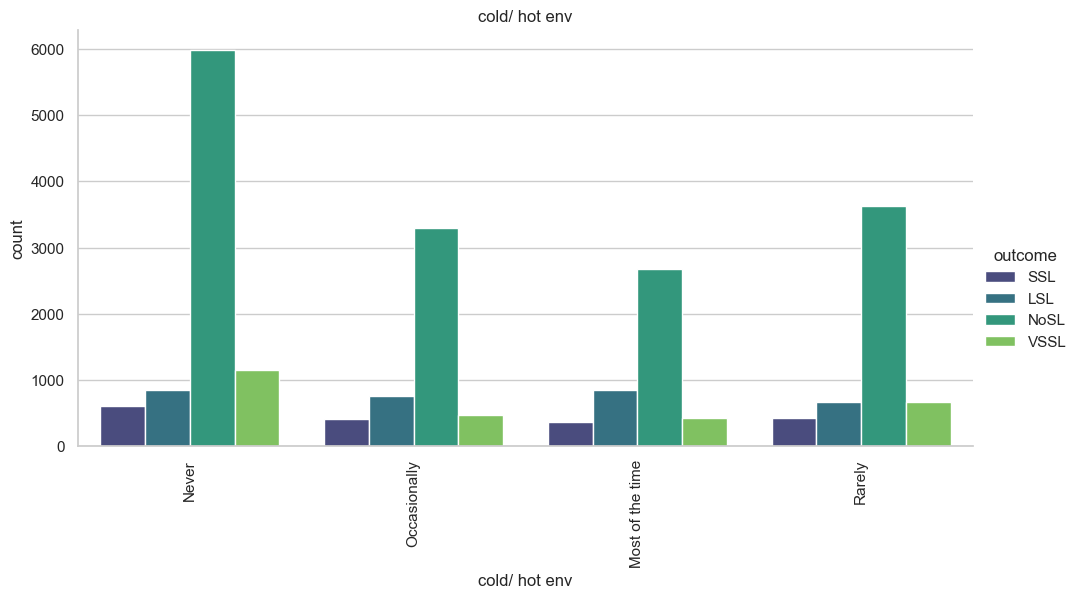

work in noisy env


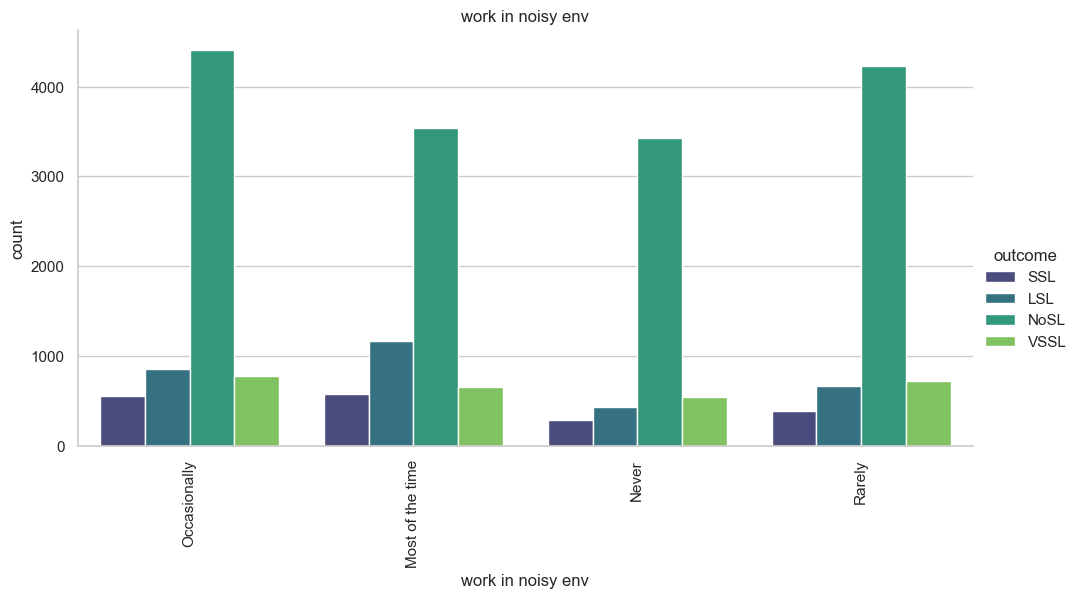

breathe toxic products or dust


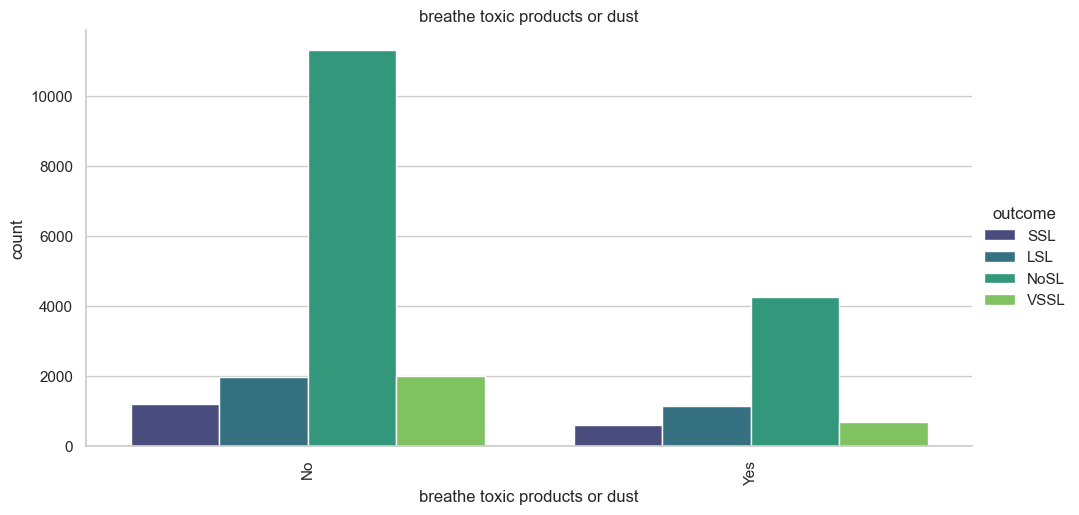

handle toxic or dangerous products


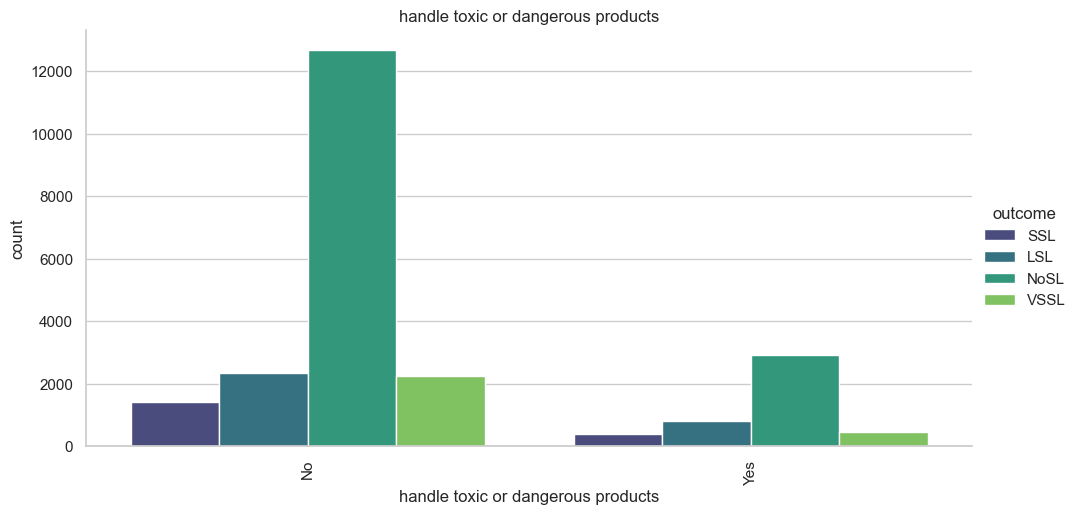

risk of serious fall


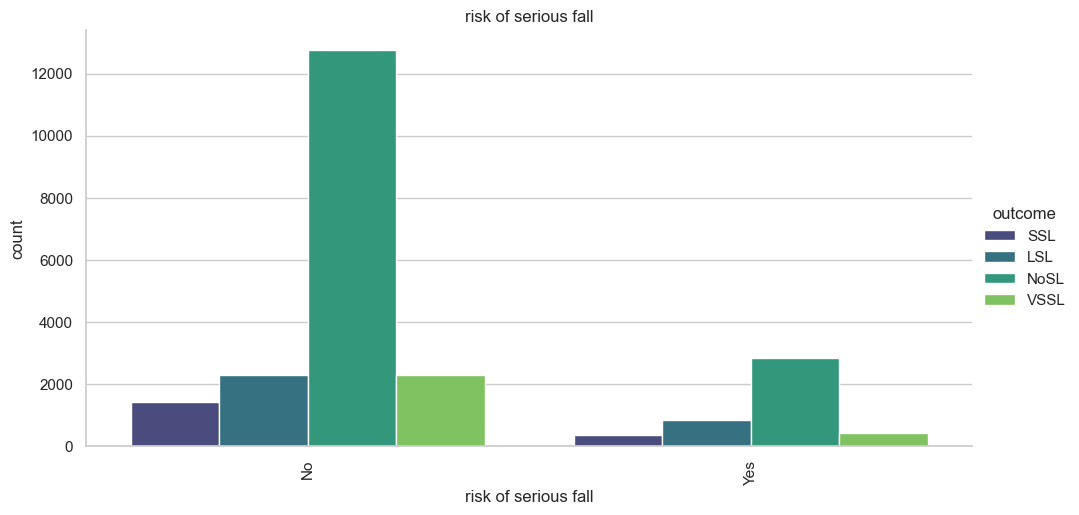

machinery with exposure to injury


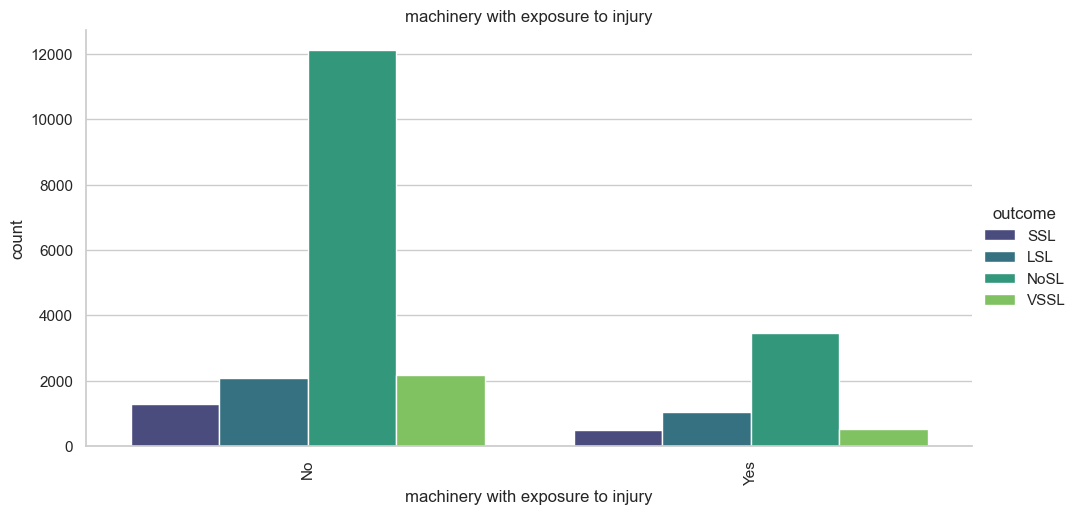

learn new things


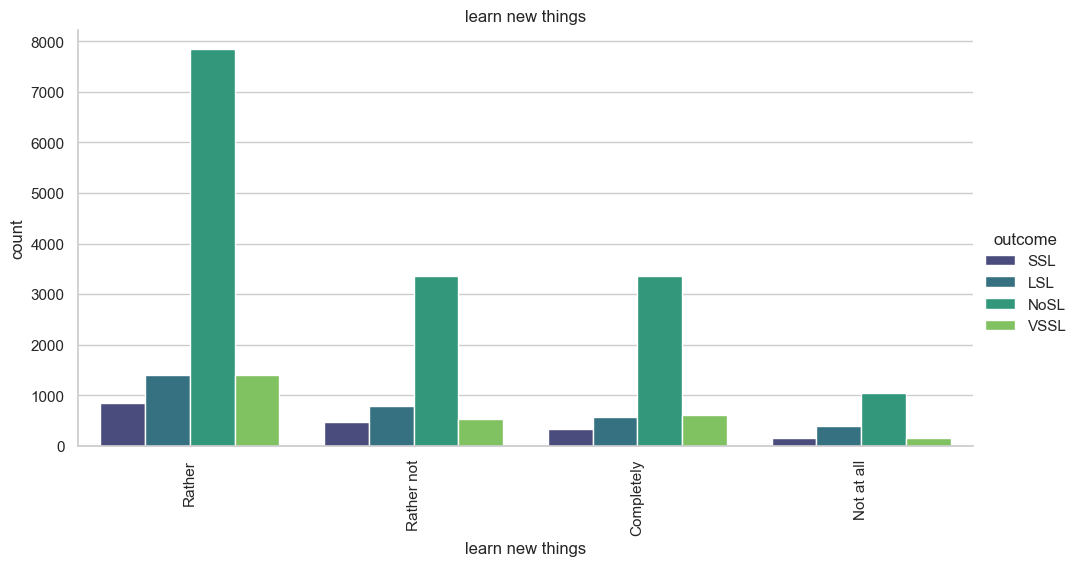

work quickly or very intensely


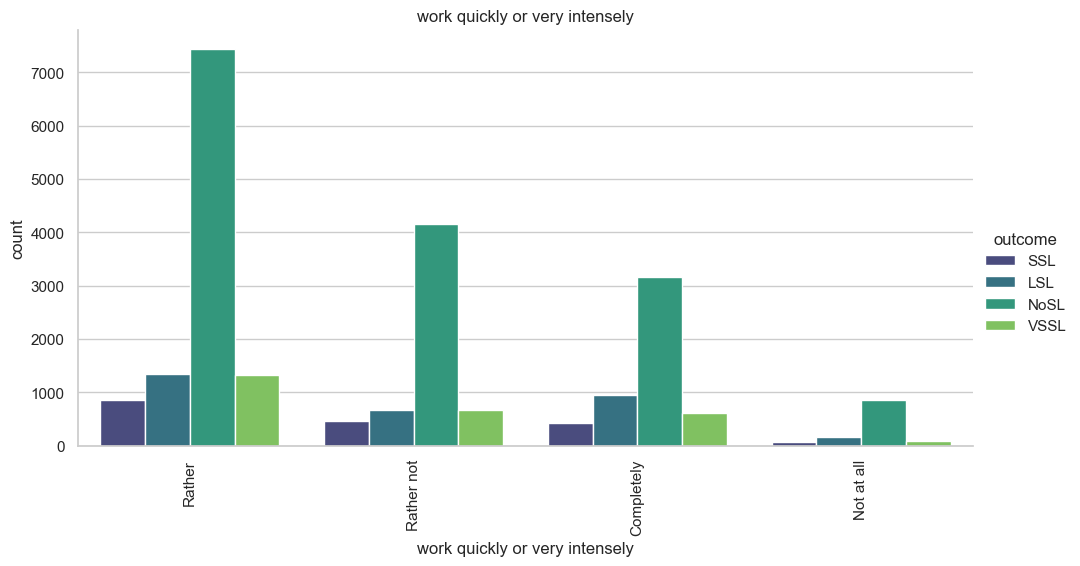

long periods of concentration


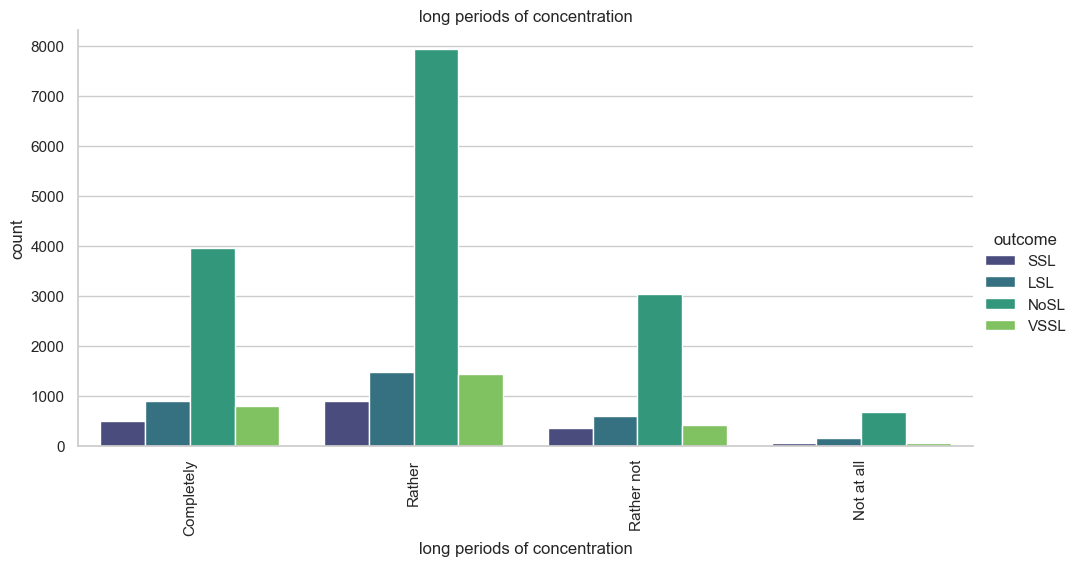

physically tiring


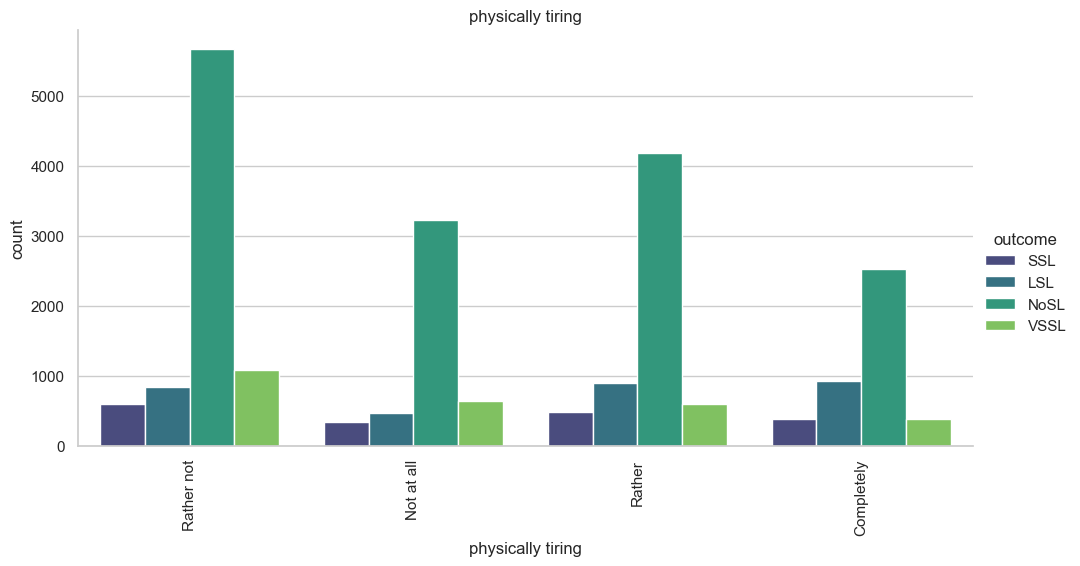

mentally tiring


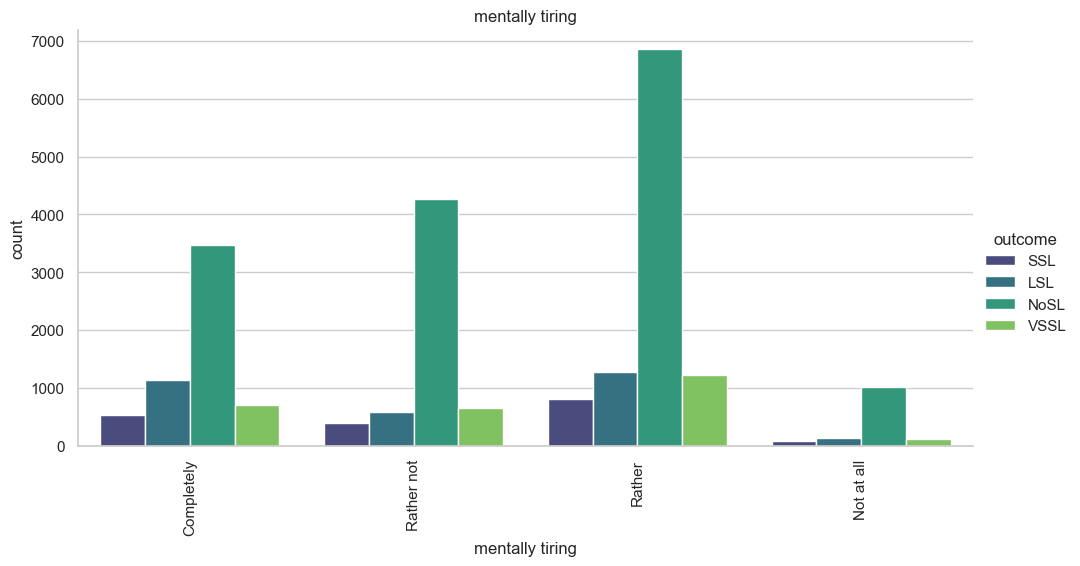

satisfaction with work


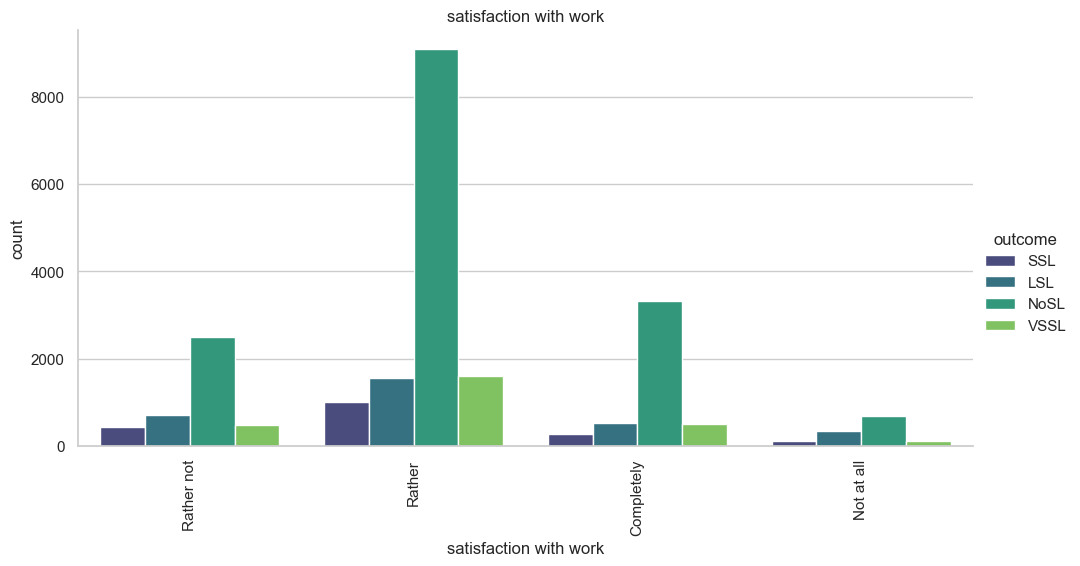

make decisions


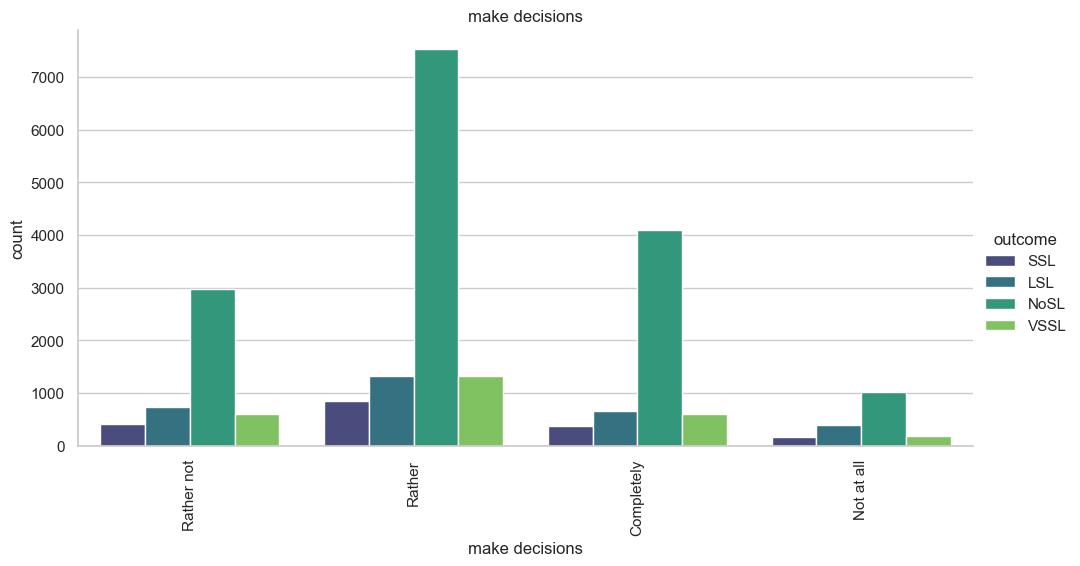

difficulty managing priorities


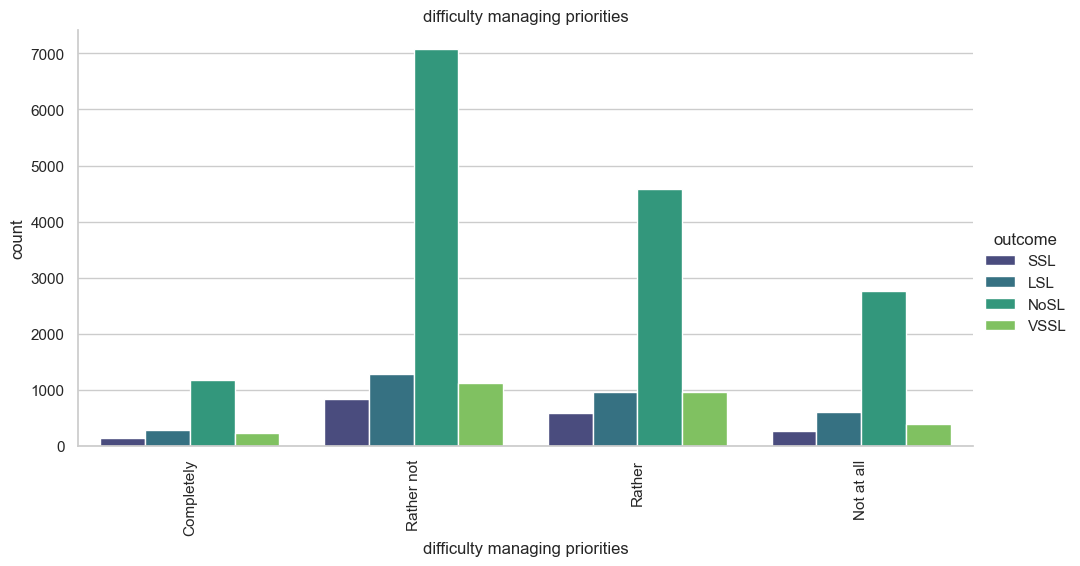

recognized by my hierarchy


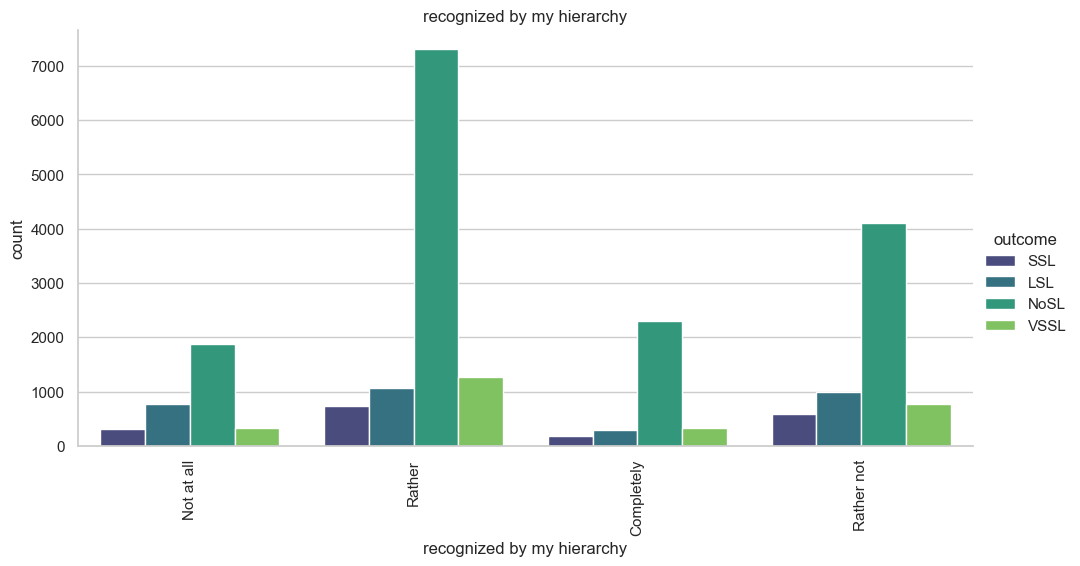

develop professional skills


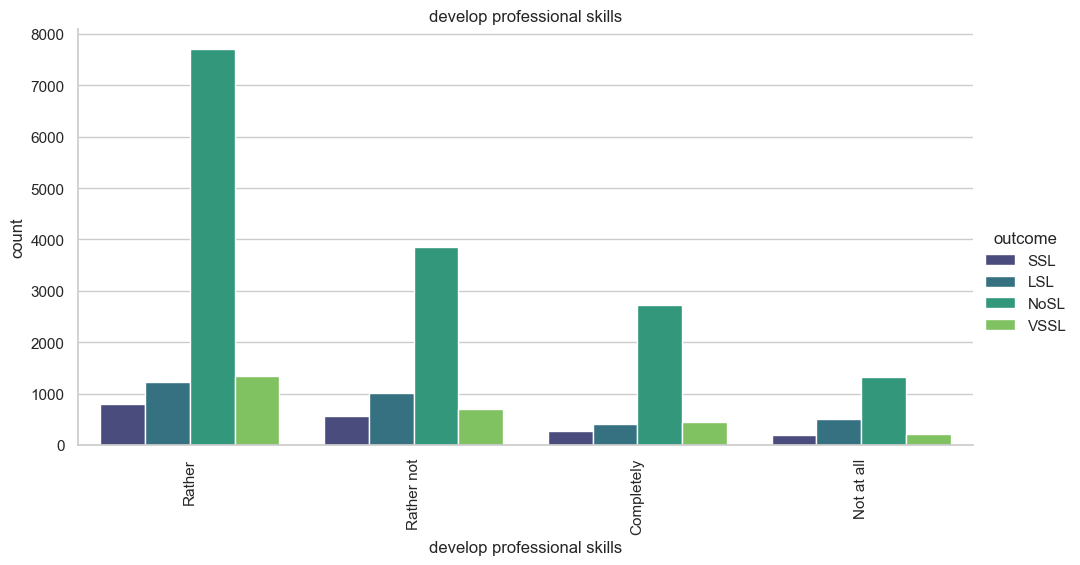

good understanding where I work


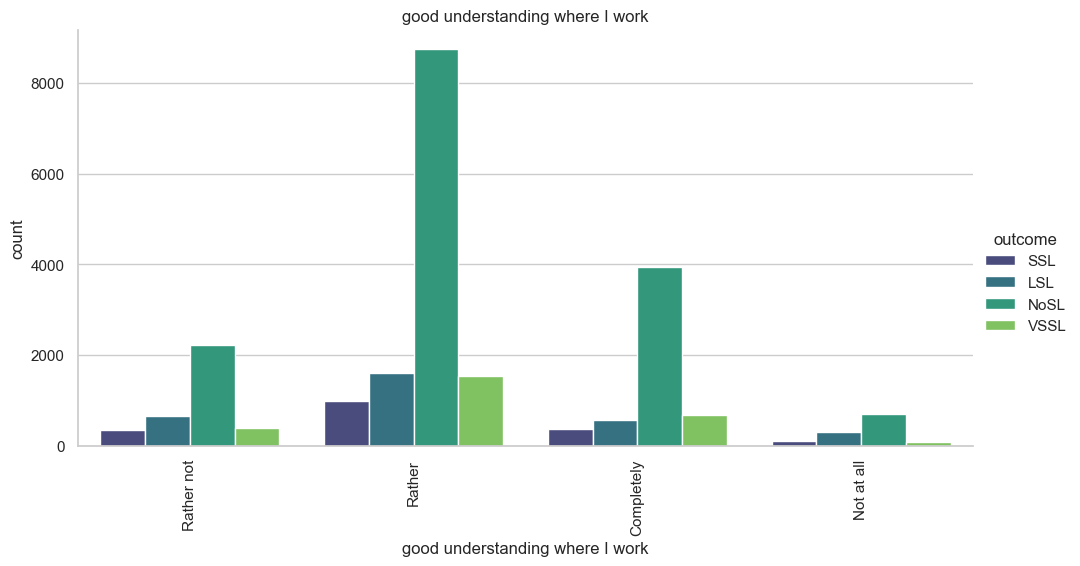

well-suited workstation


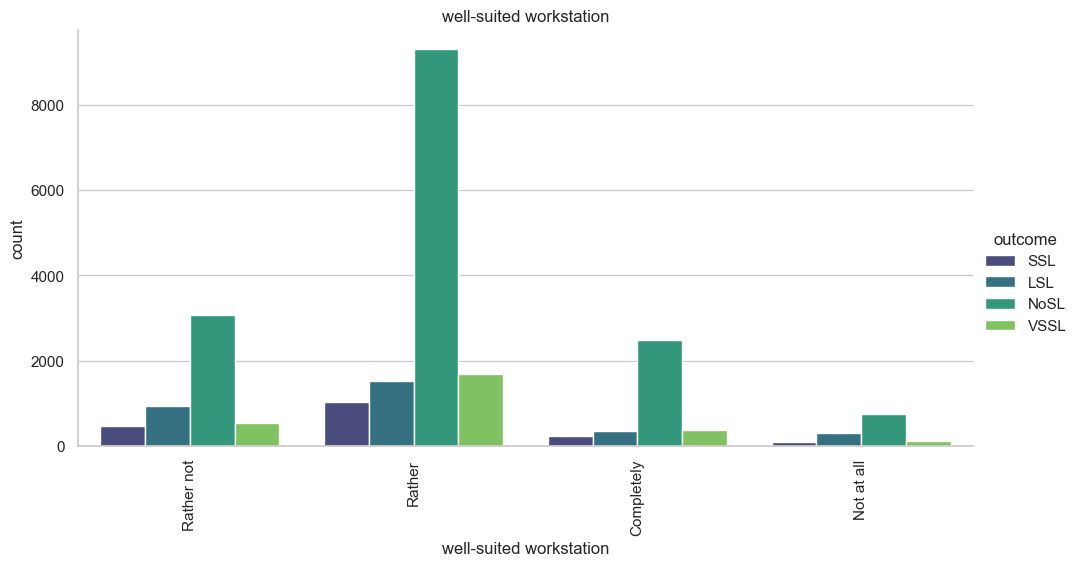

seek to improve the way I work


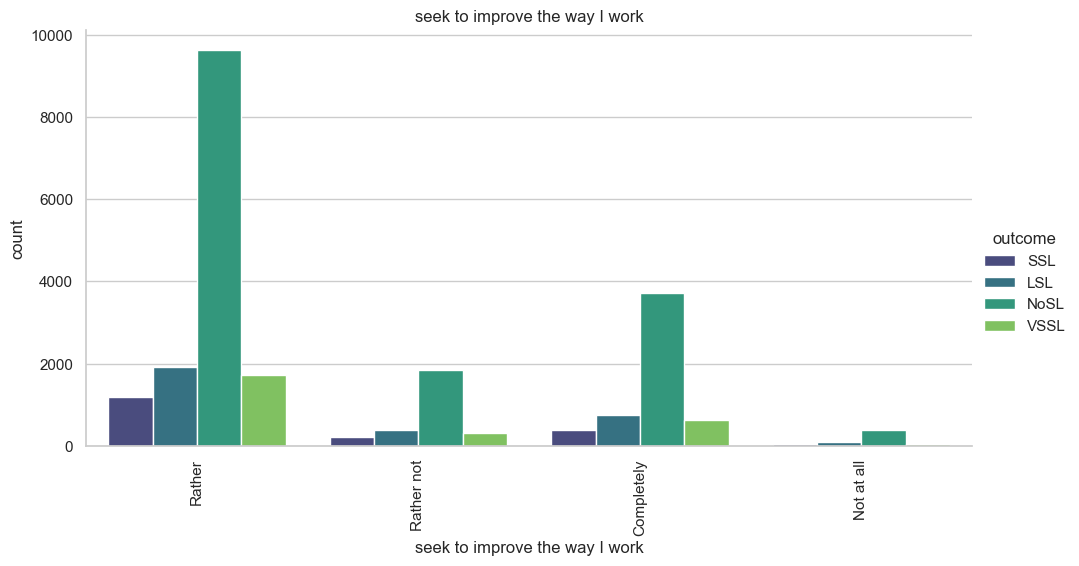

well-being of its employees


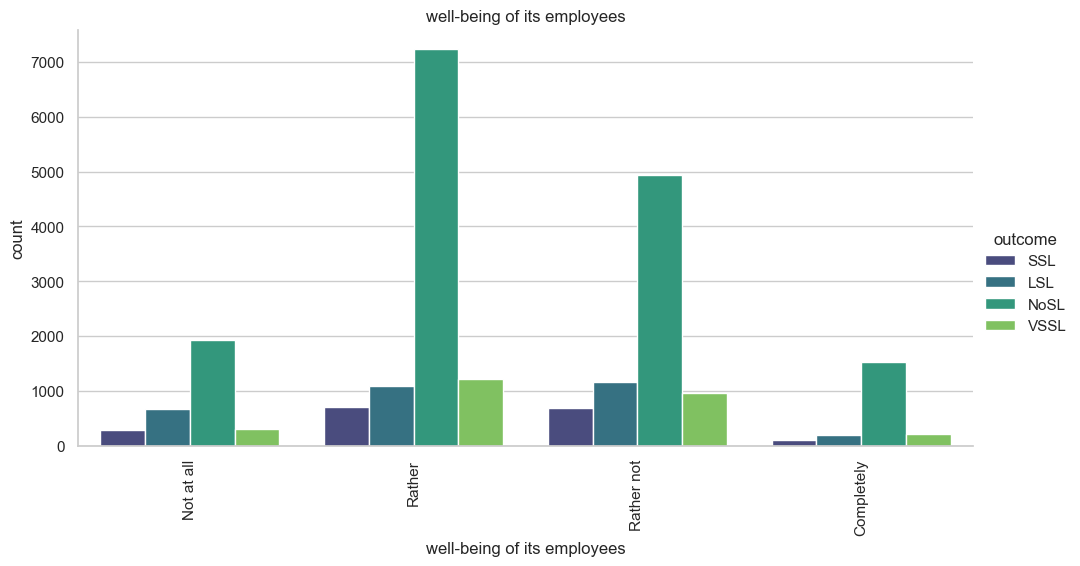

Security is a priority


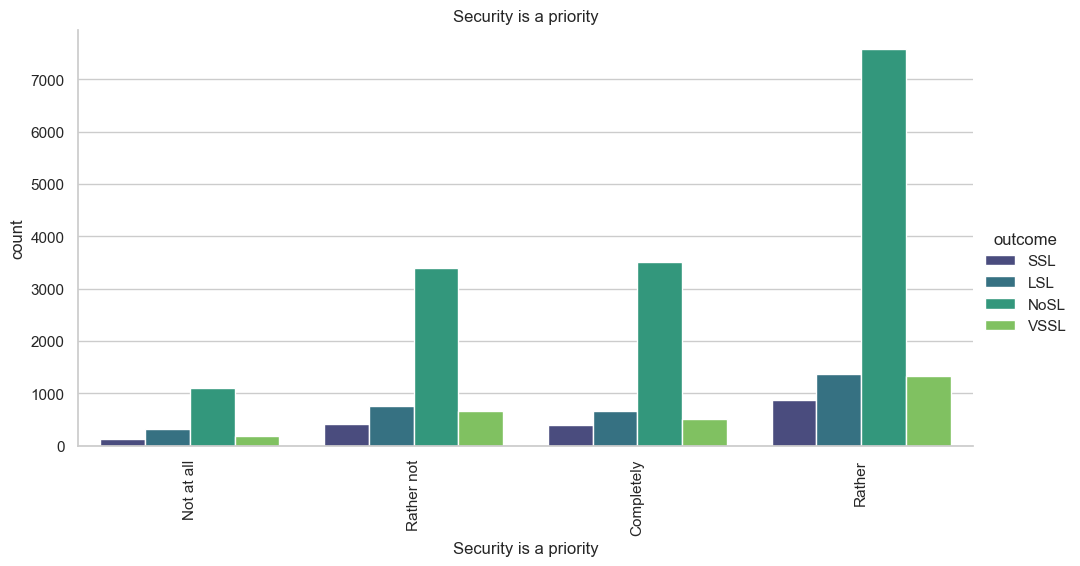

count on supervisor


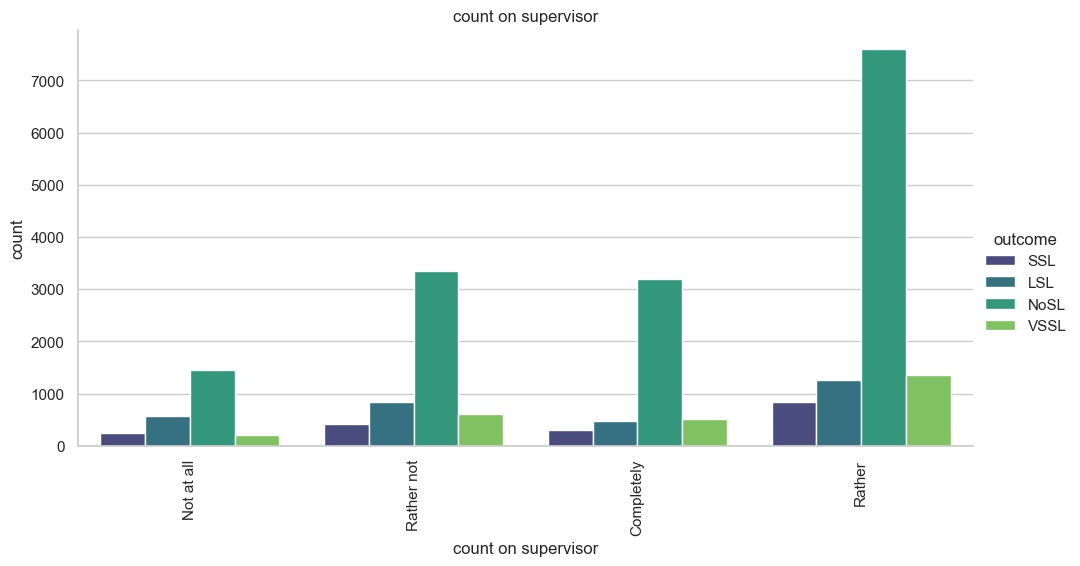

recommend the company


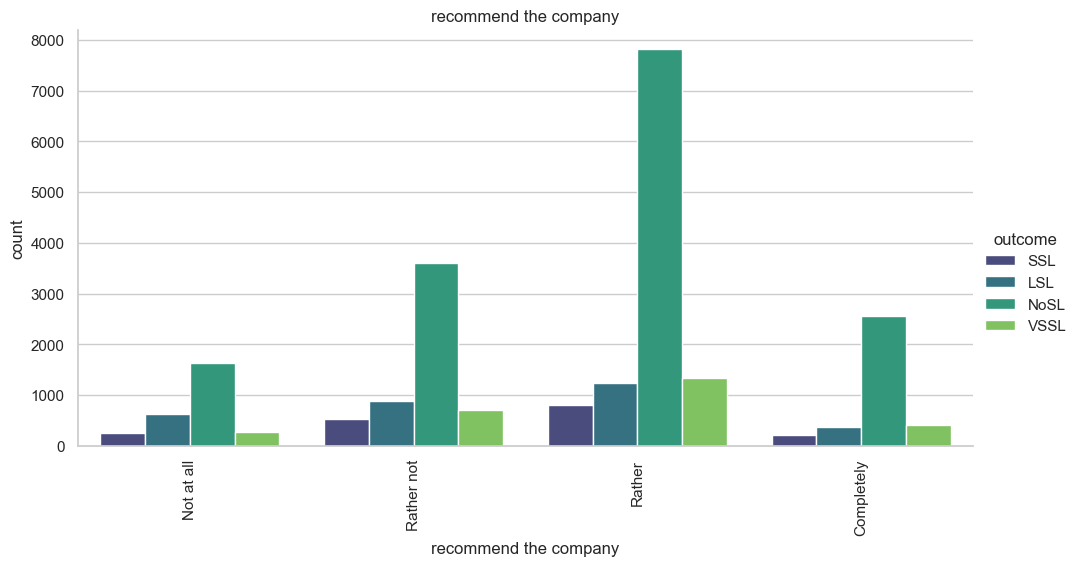

decreased alertness


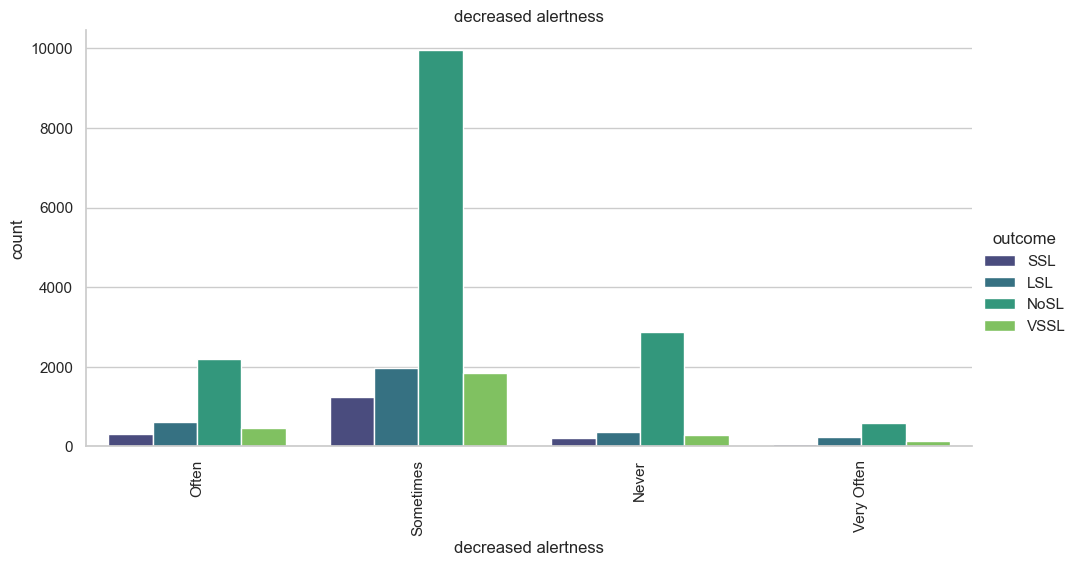

hurtful or aggressive remarks


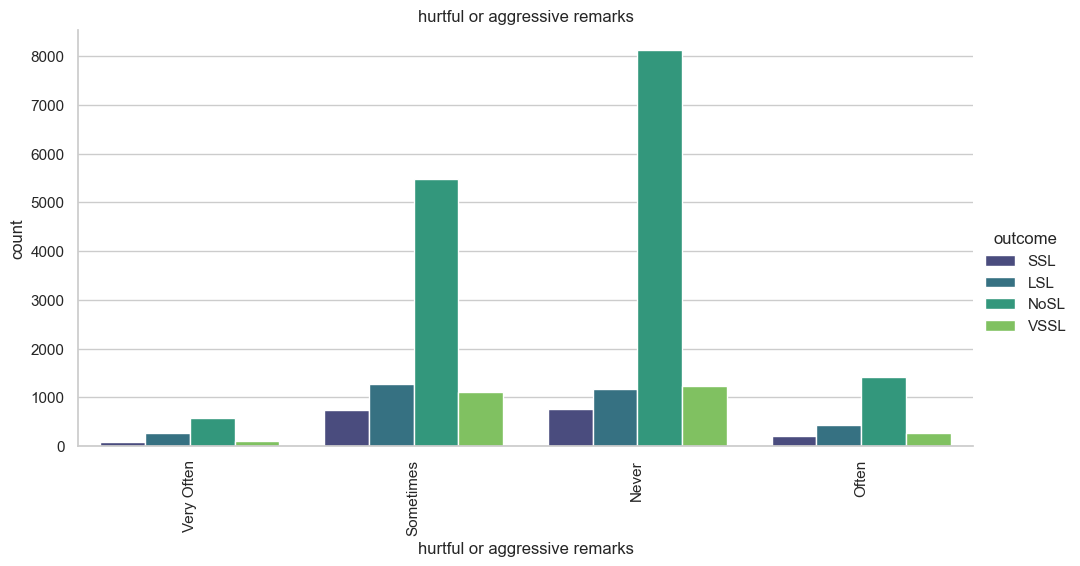

insulted or attacked by the public or customers


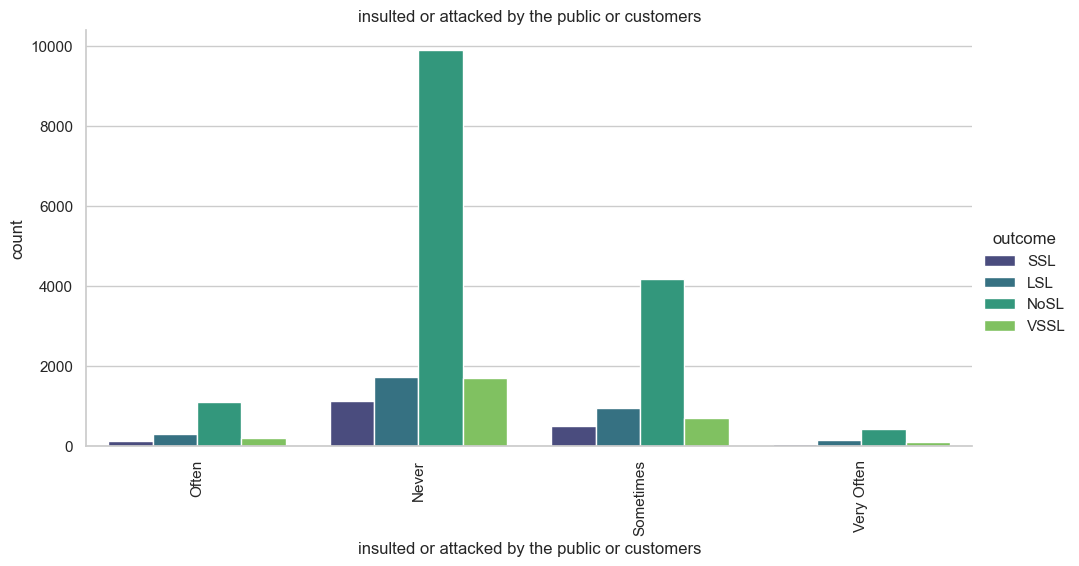

clarity of your role in the company


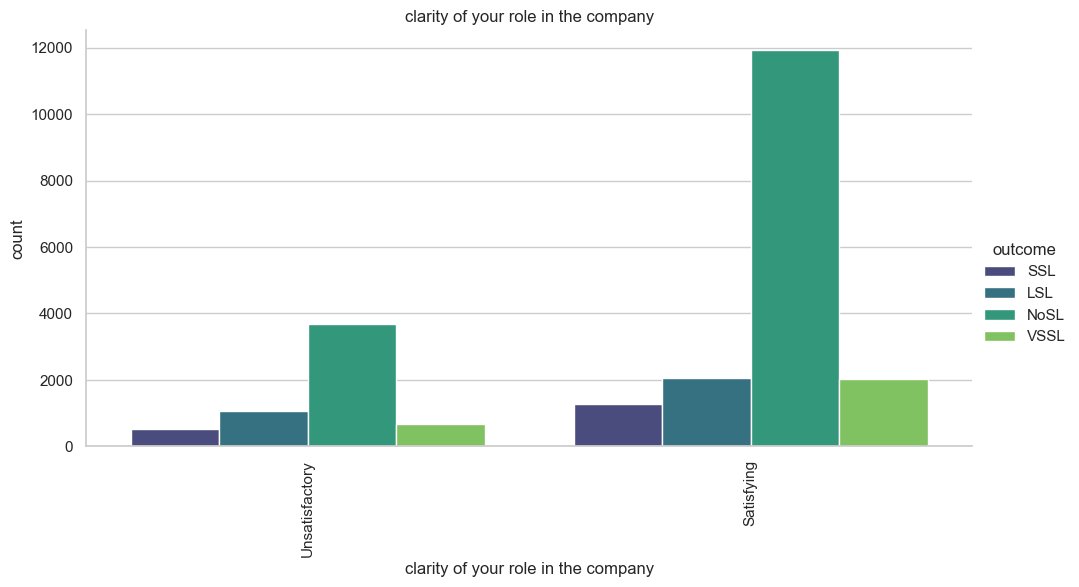

access to professional training


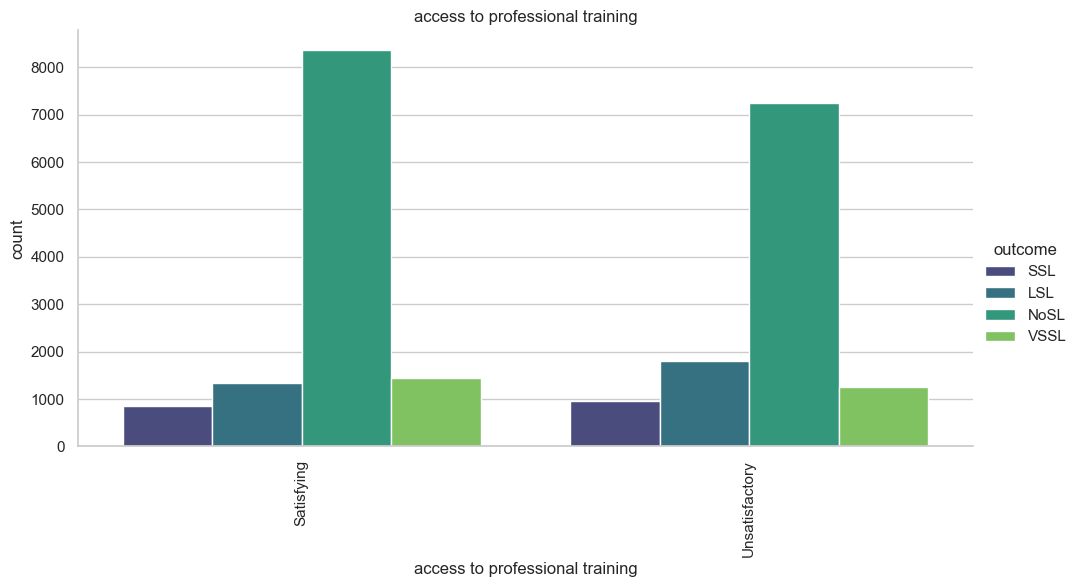

tools or workstation


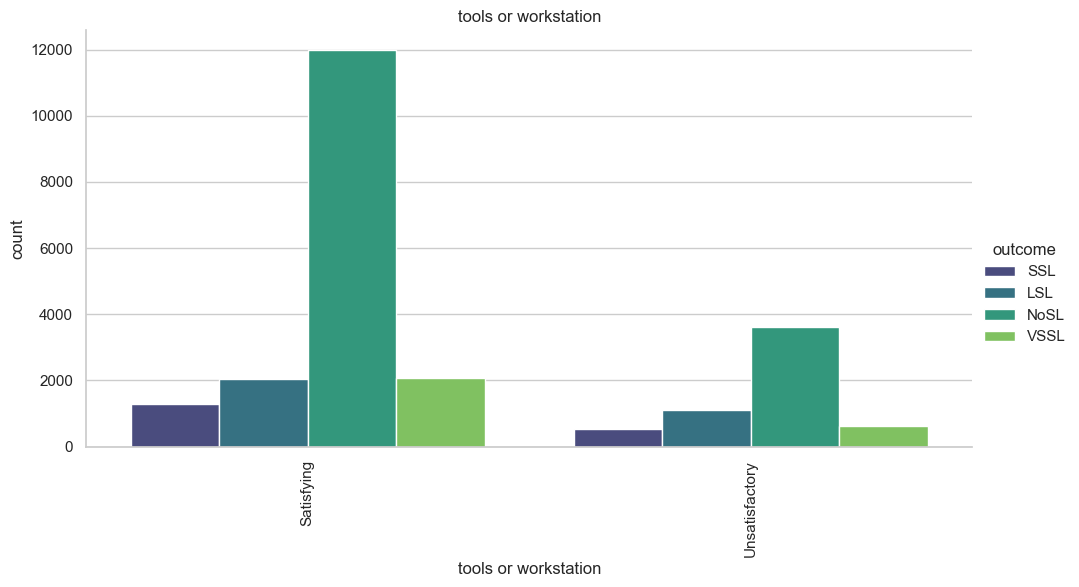

prospects for development


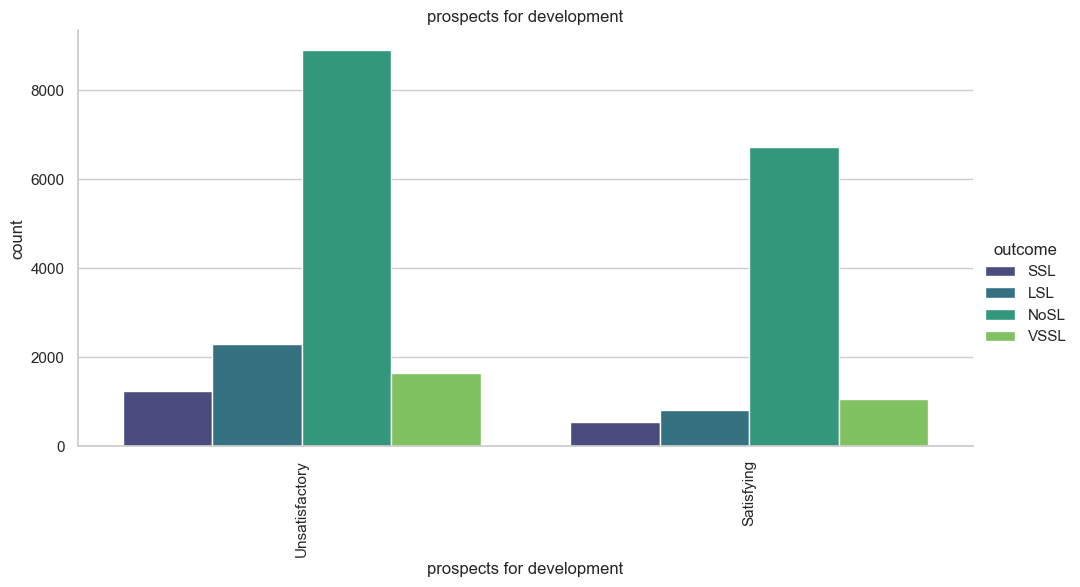

mastery of position


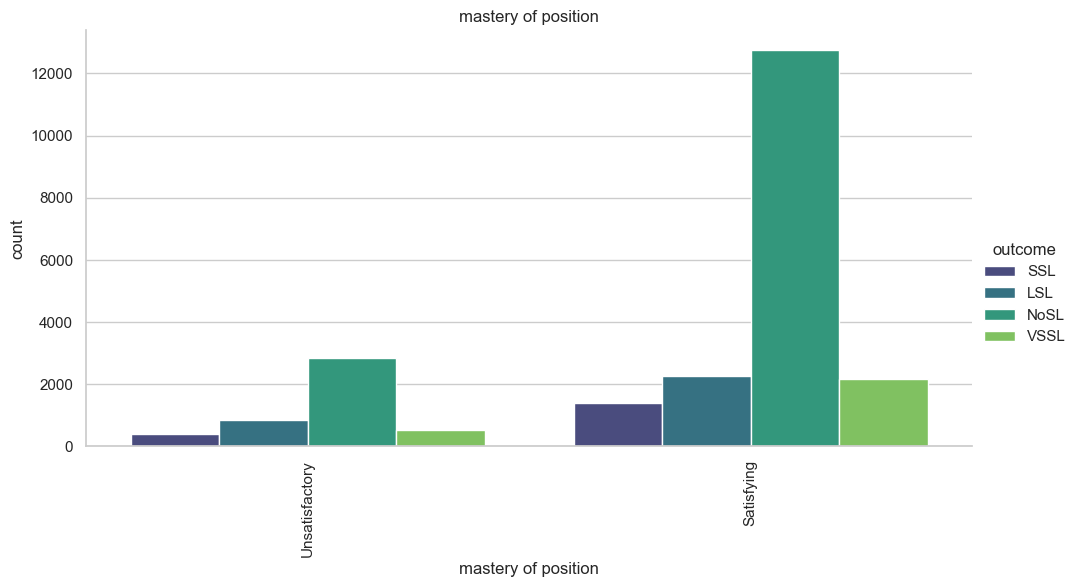

difficulty reconciling your work with your other personal commitments


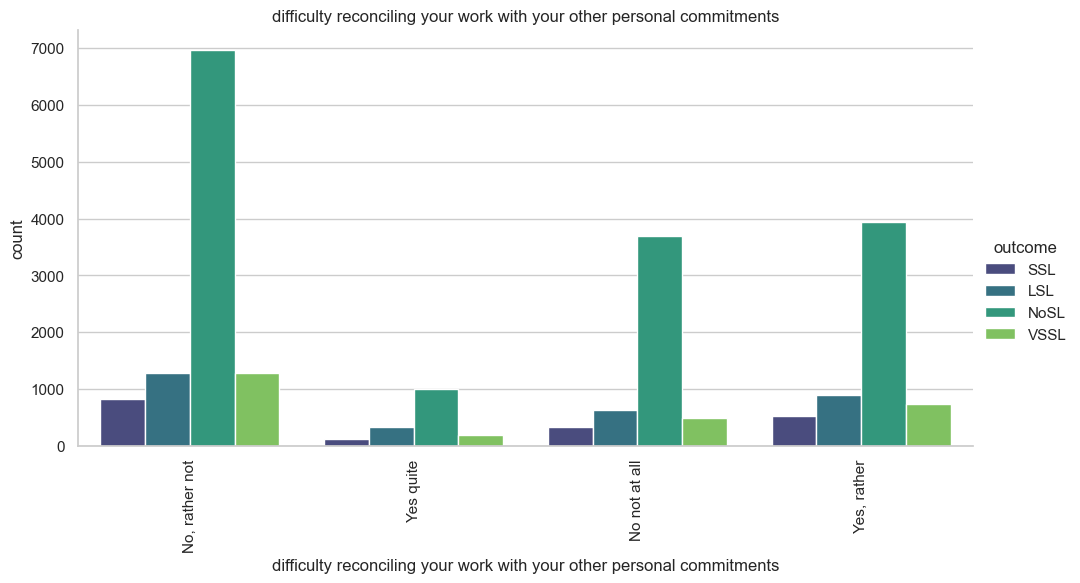

transportation


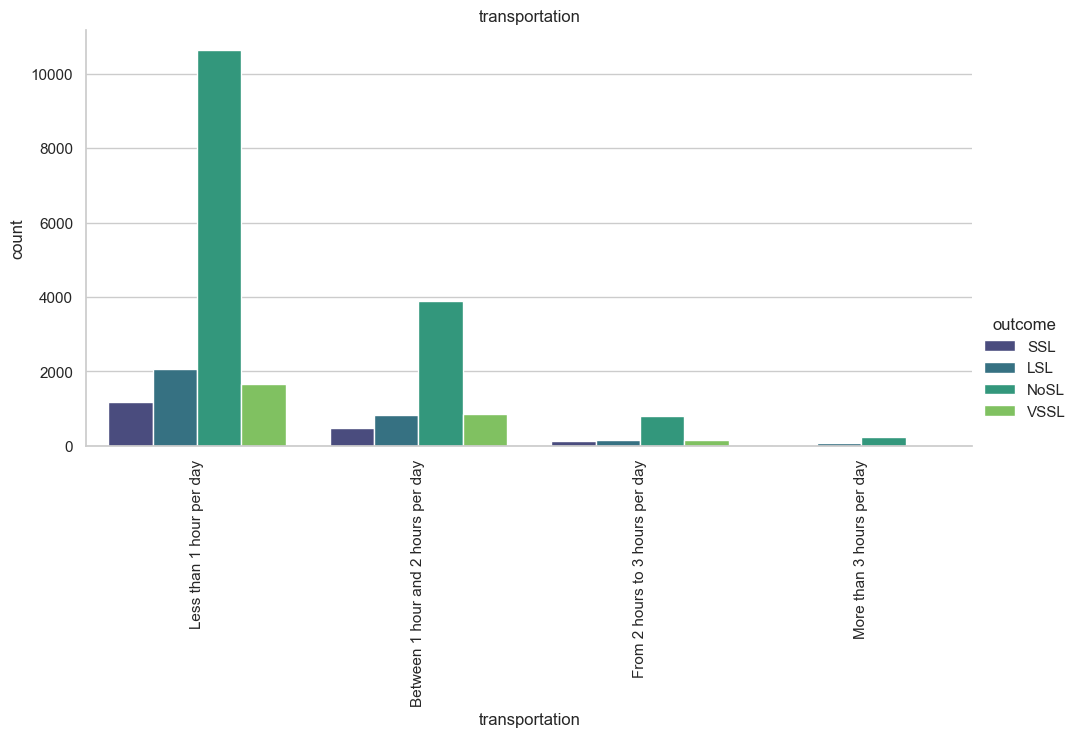

personal concerns


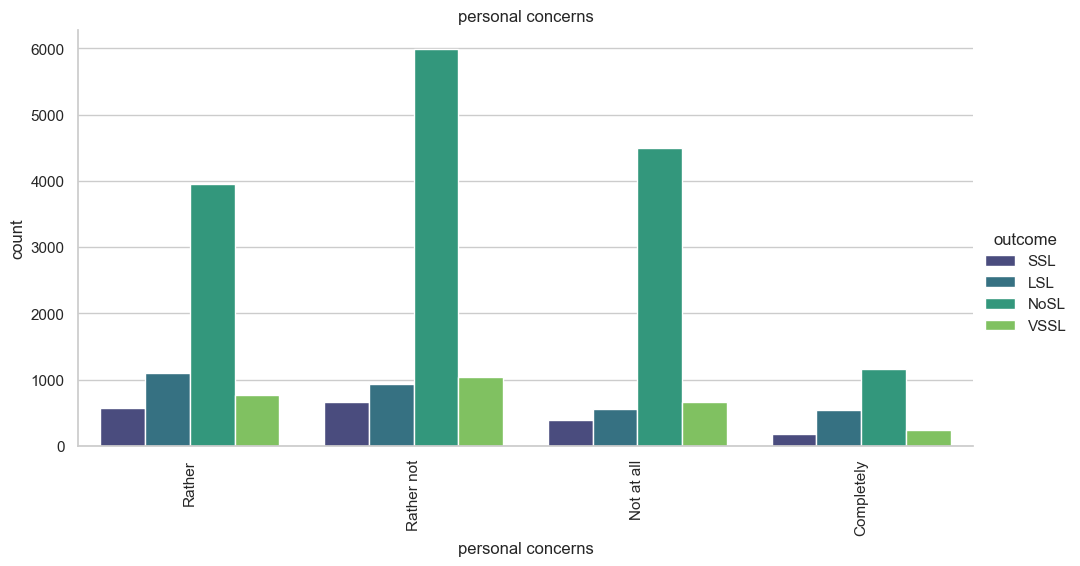

can talk to loved ones


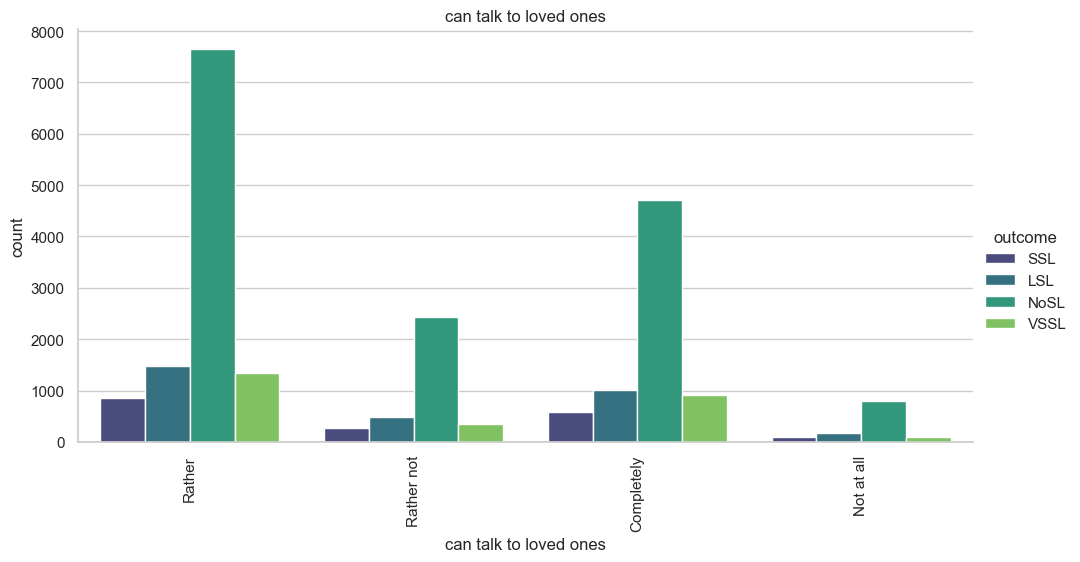

state of health in general


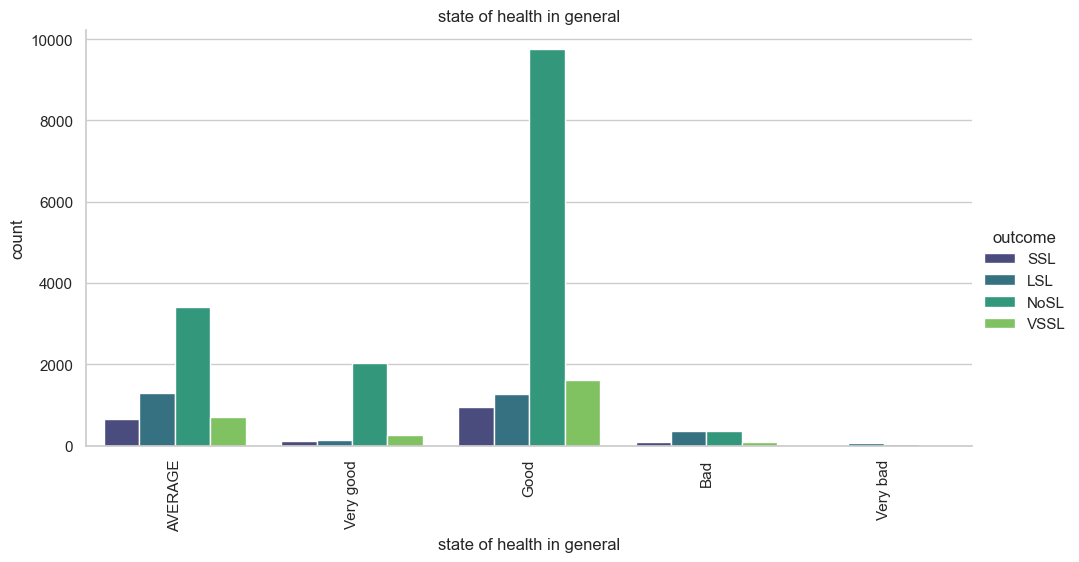

long-term illness


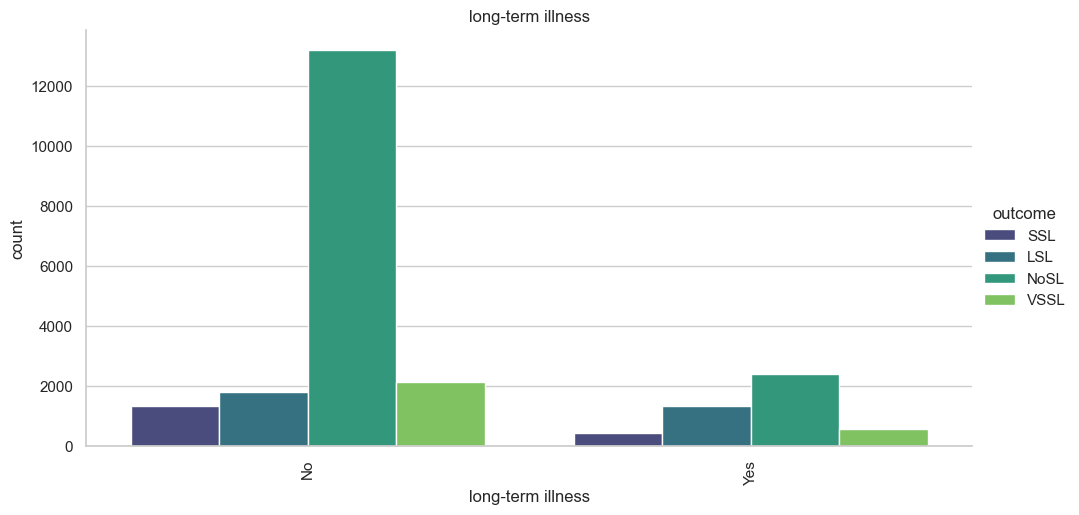

Disabilities


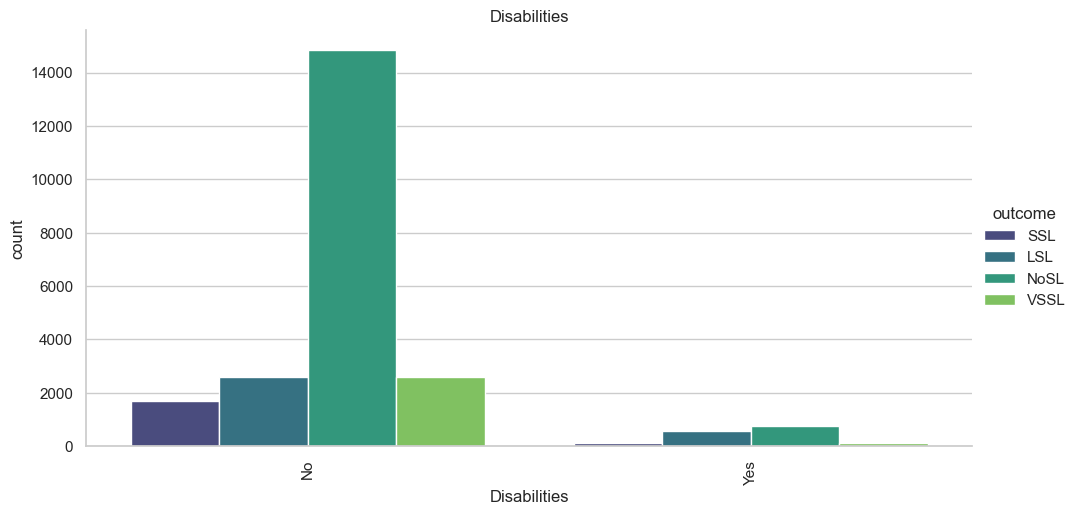

Headaches


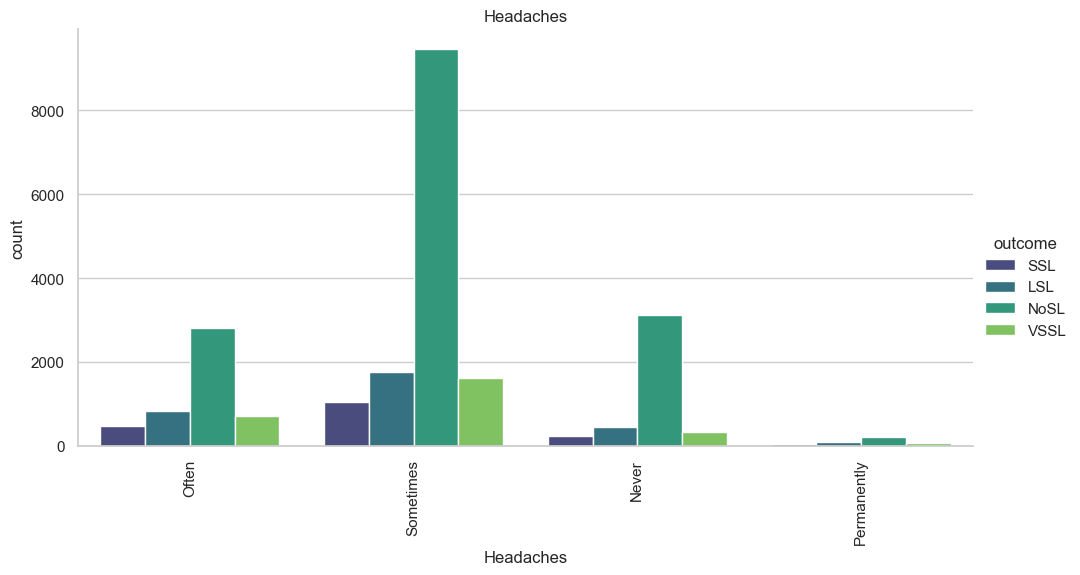

neck, shoulder, arm pain


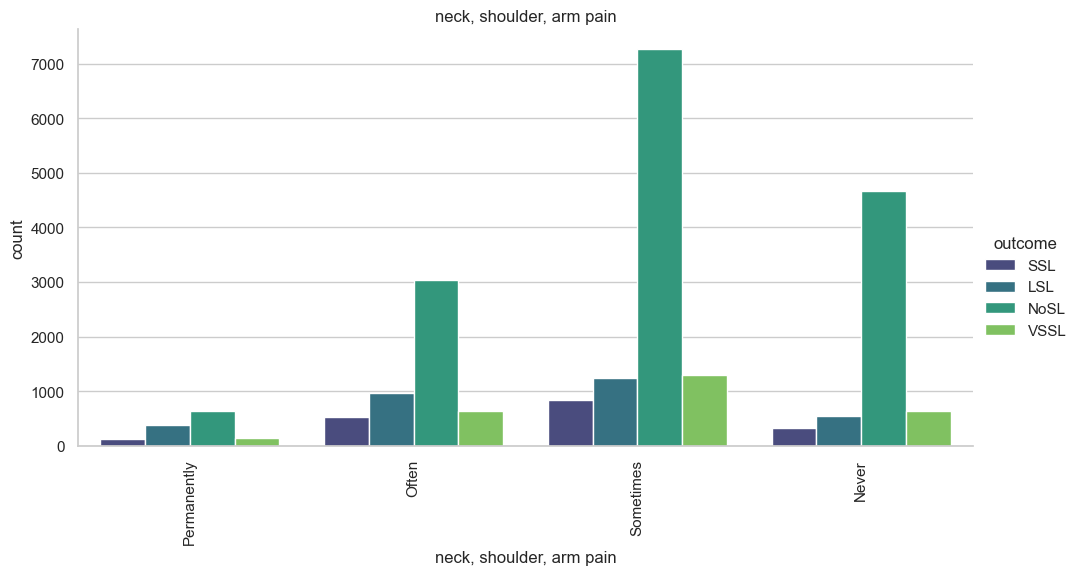

back pain


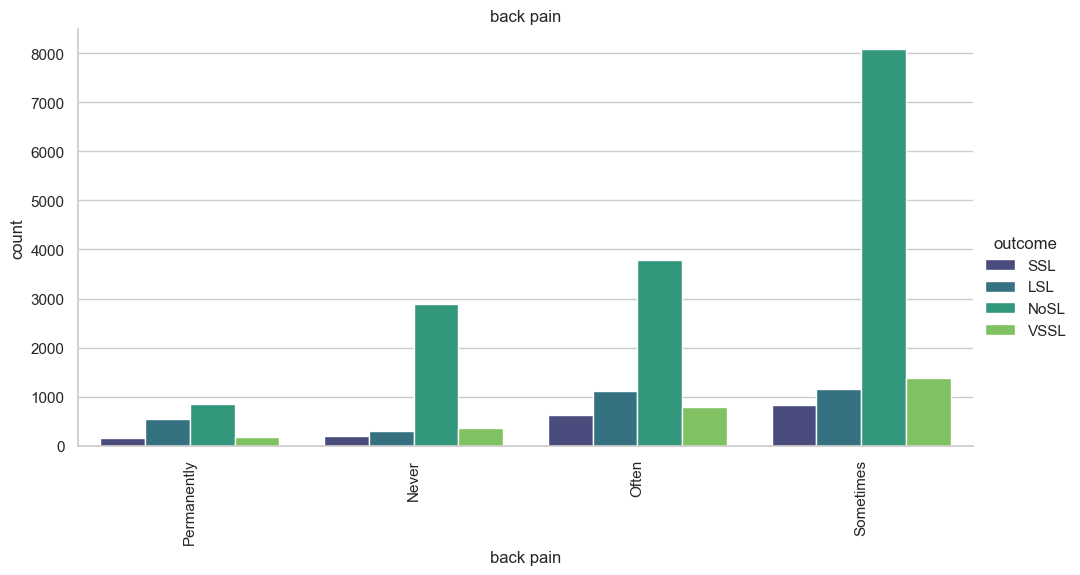

leg, foot, knee pain


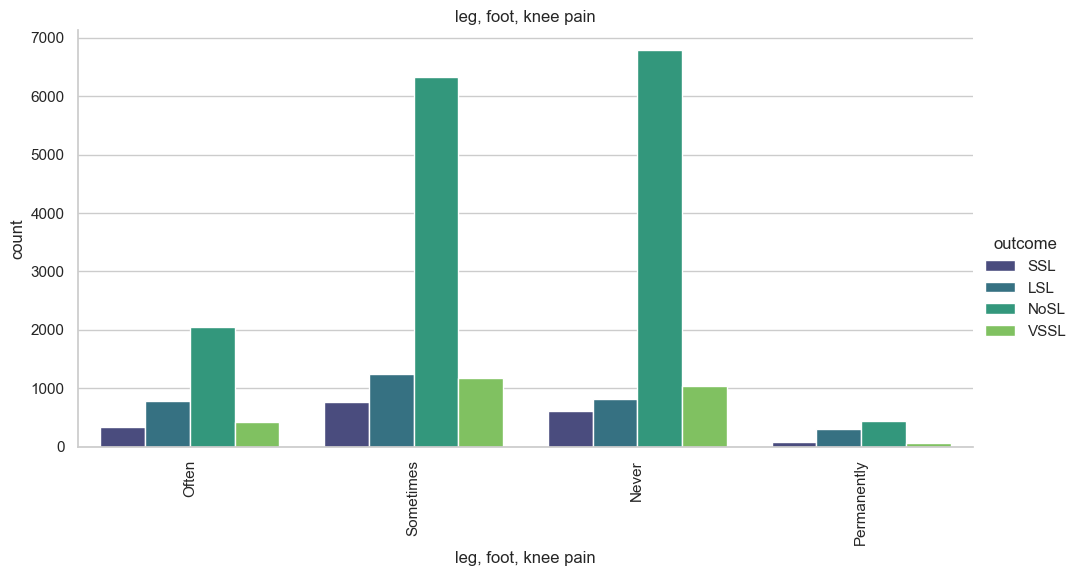

other parts of the body pain


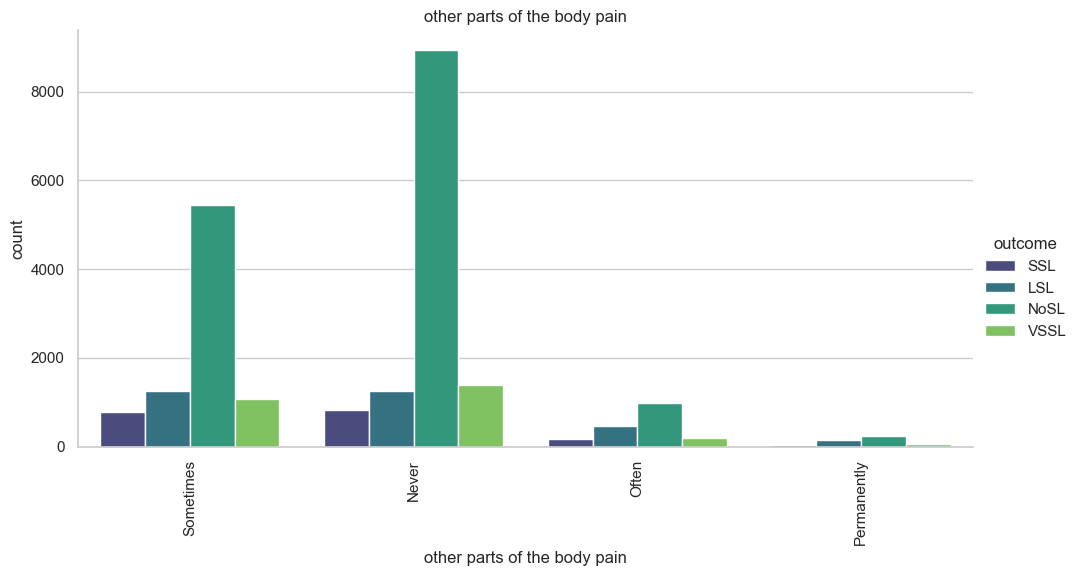

midday meal


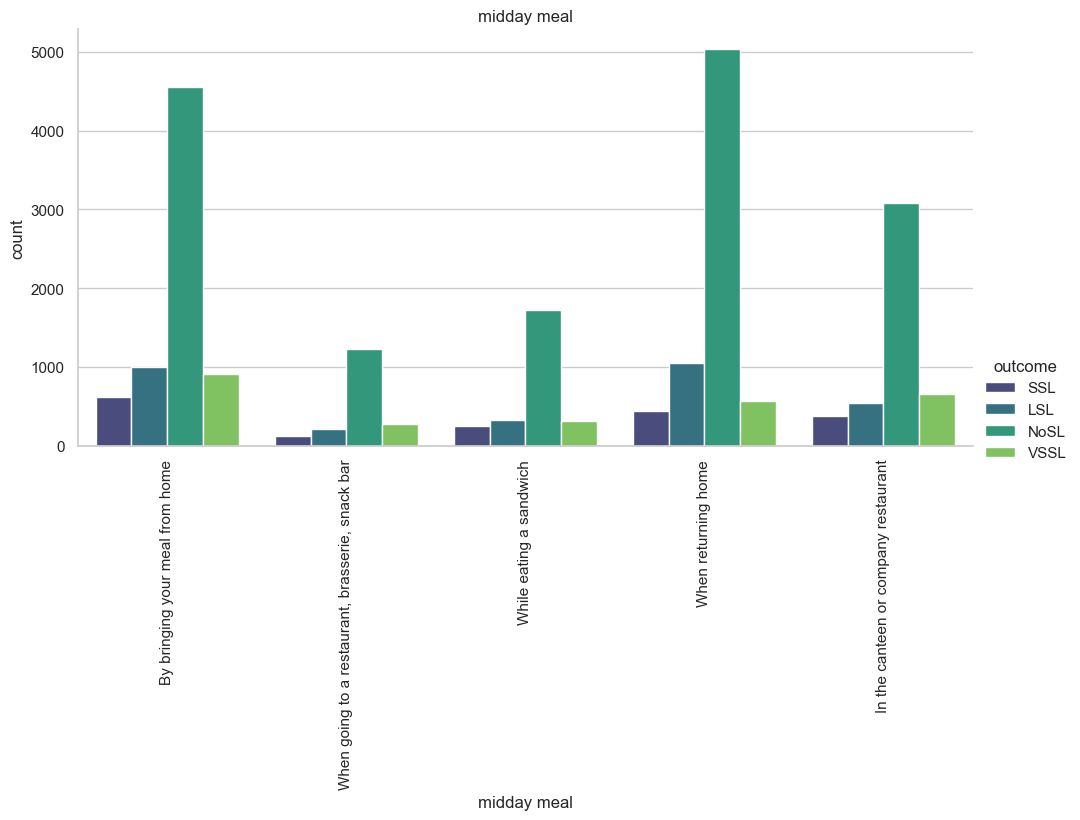

drinks (At least once a week)


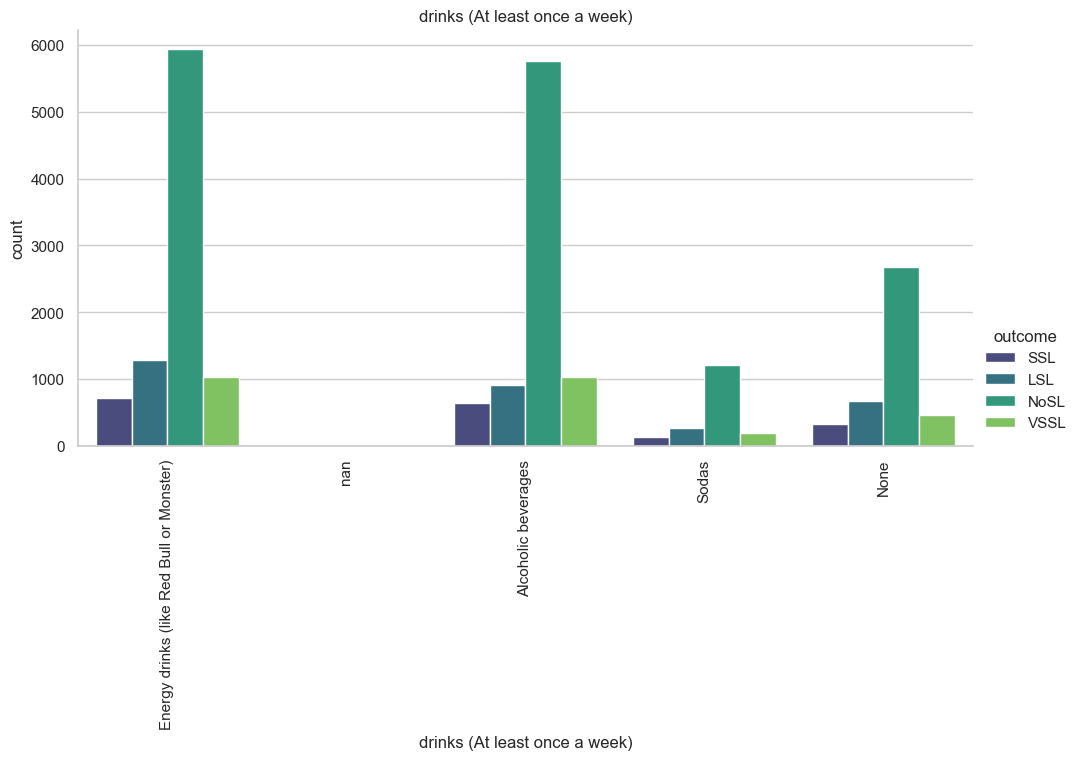

smoker


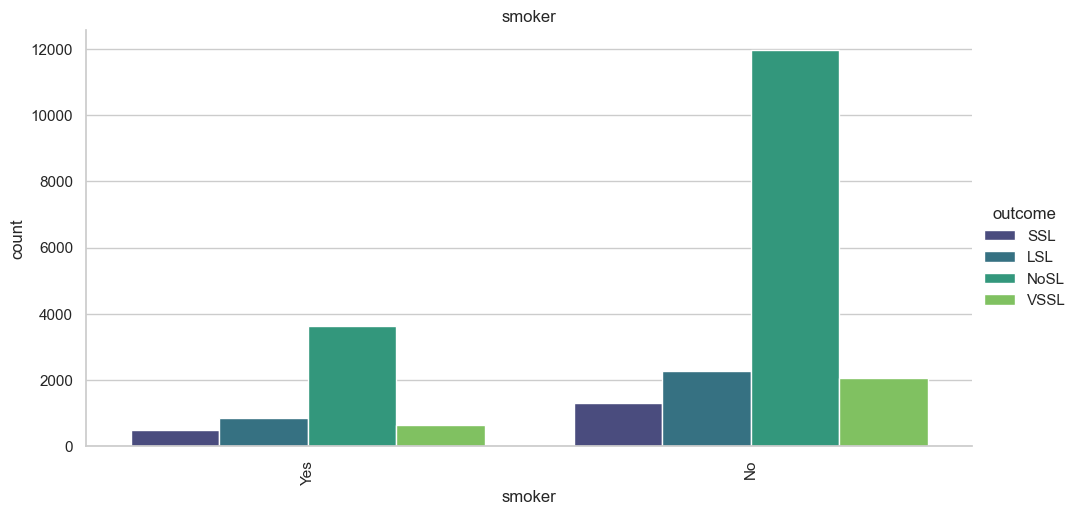

sleeping pills, anxiolytics or anti-depressants


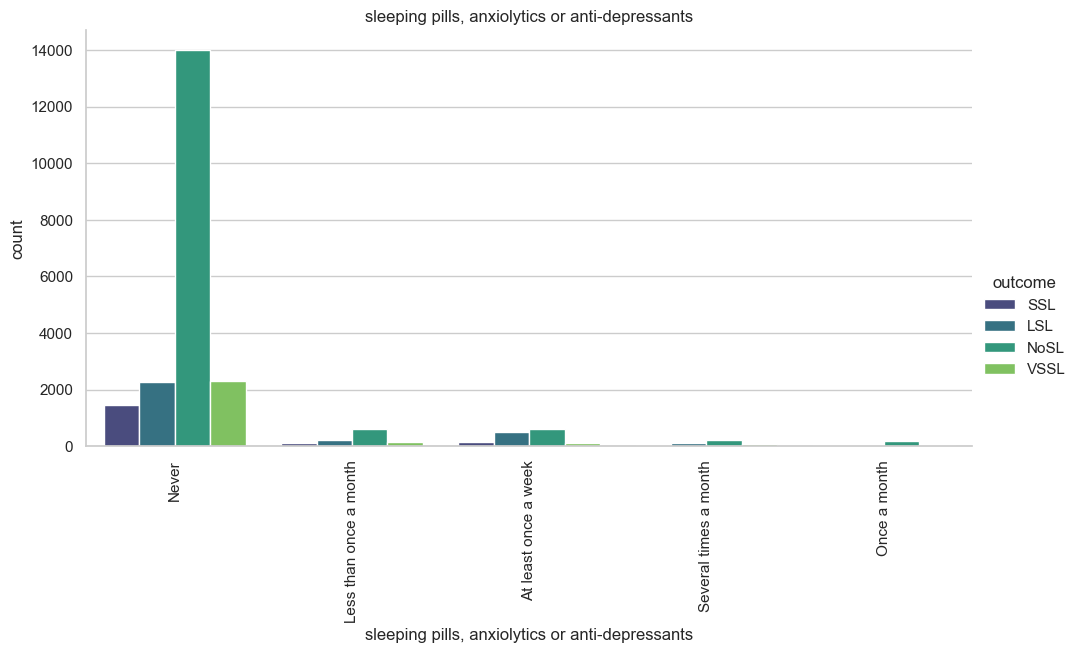

Sleep disorders


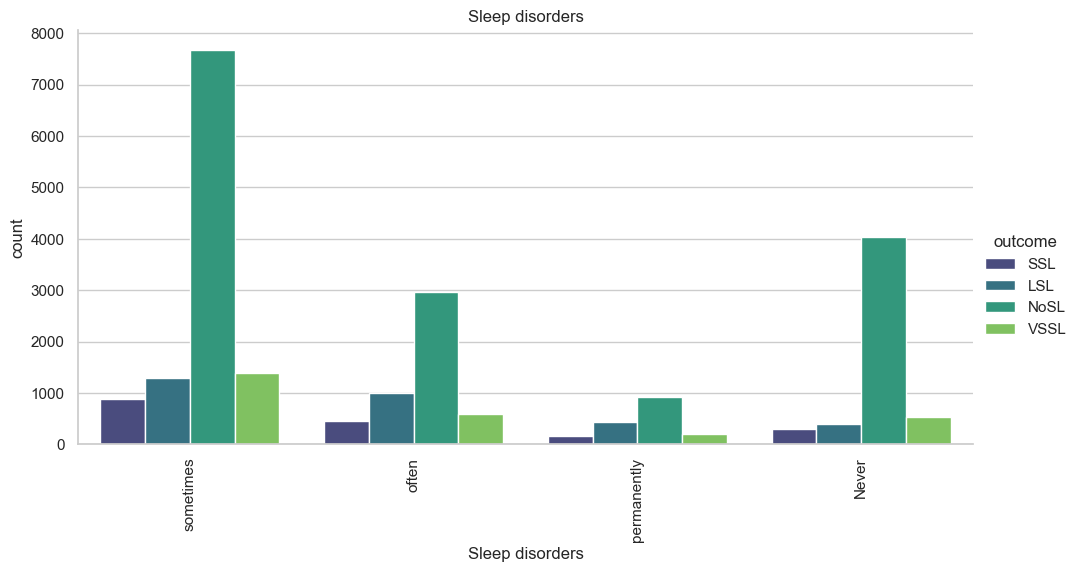

lack of tone


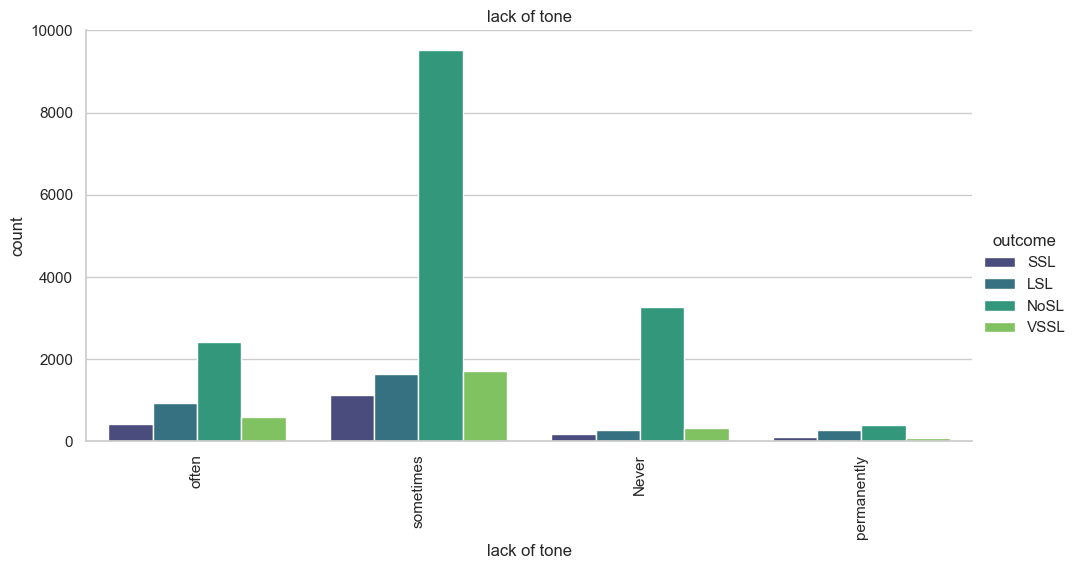

outcome


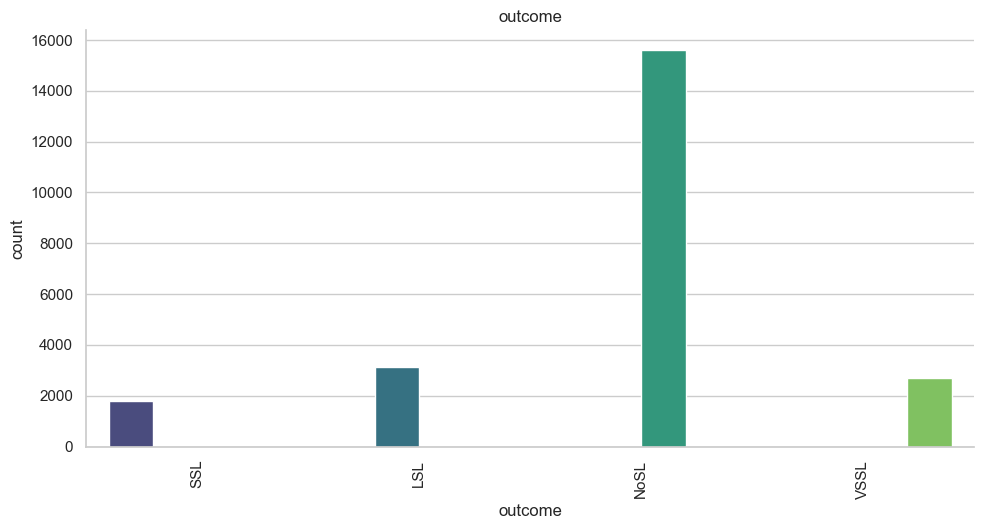

In [8]:
# get the value count for each column according to the output column
total_rows = len(data)
data_save = {
    "No SL": [],
    "VSSL": [],
    "SSL": [],
    "LSL": []
}
for j in data.columns:
    print(j)
    no_sl = data[j][data['outcome'] == 0].value_counts()
    vssl = data[j][data['outcome'] == 1].value_counts()
    ssl = data[j][data['outcome'] == 2].value_counts()
    lsl = data[j][data['outcome'] == 3].value_counts()

    # data[j] unique values
    try:
        order = data[j].unique().tolist().sort()
    except:
        # if str, float combination then convert to str and sort
        data[j] = data[j].astype(str)
        order = data[j].unique().tolist().sort()
        
    # ().sort()
    # plot with sns
    sns.catplot(data=data, x=j, kind="count", height=5, aspect=2, orient="h", order=order, hue="outcome", palette="viridis")
    plt.title(j)
    plt.xticks(rotation=90)
    if "/" in j:
        j = j.replace("/", "_")
    plt.savefig(f"outputs/00_data_analysis/2_{j}_by_outcome.png", dpi=300, bbox_inches='tight')
    plt.show()

## Plot Correlations

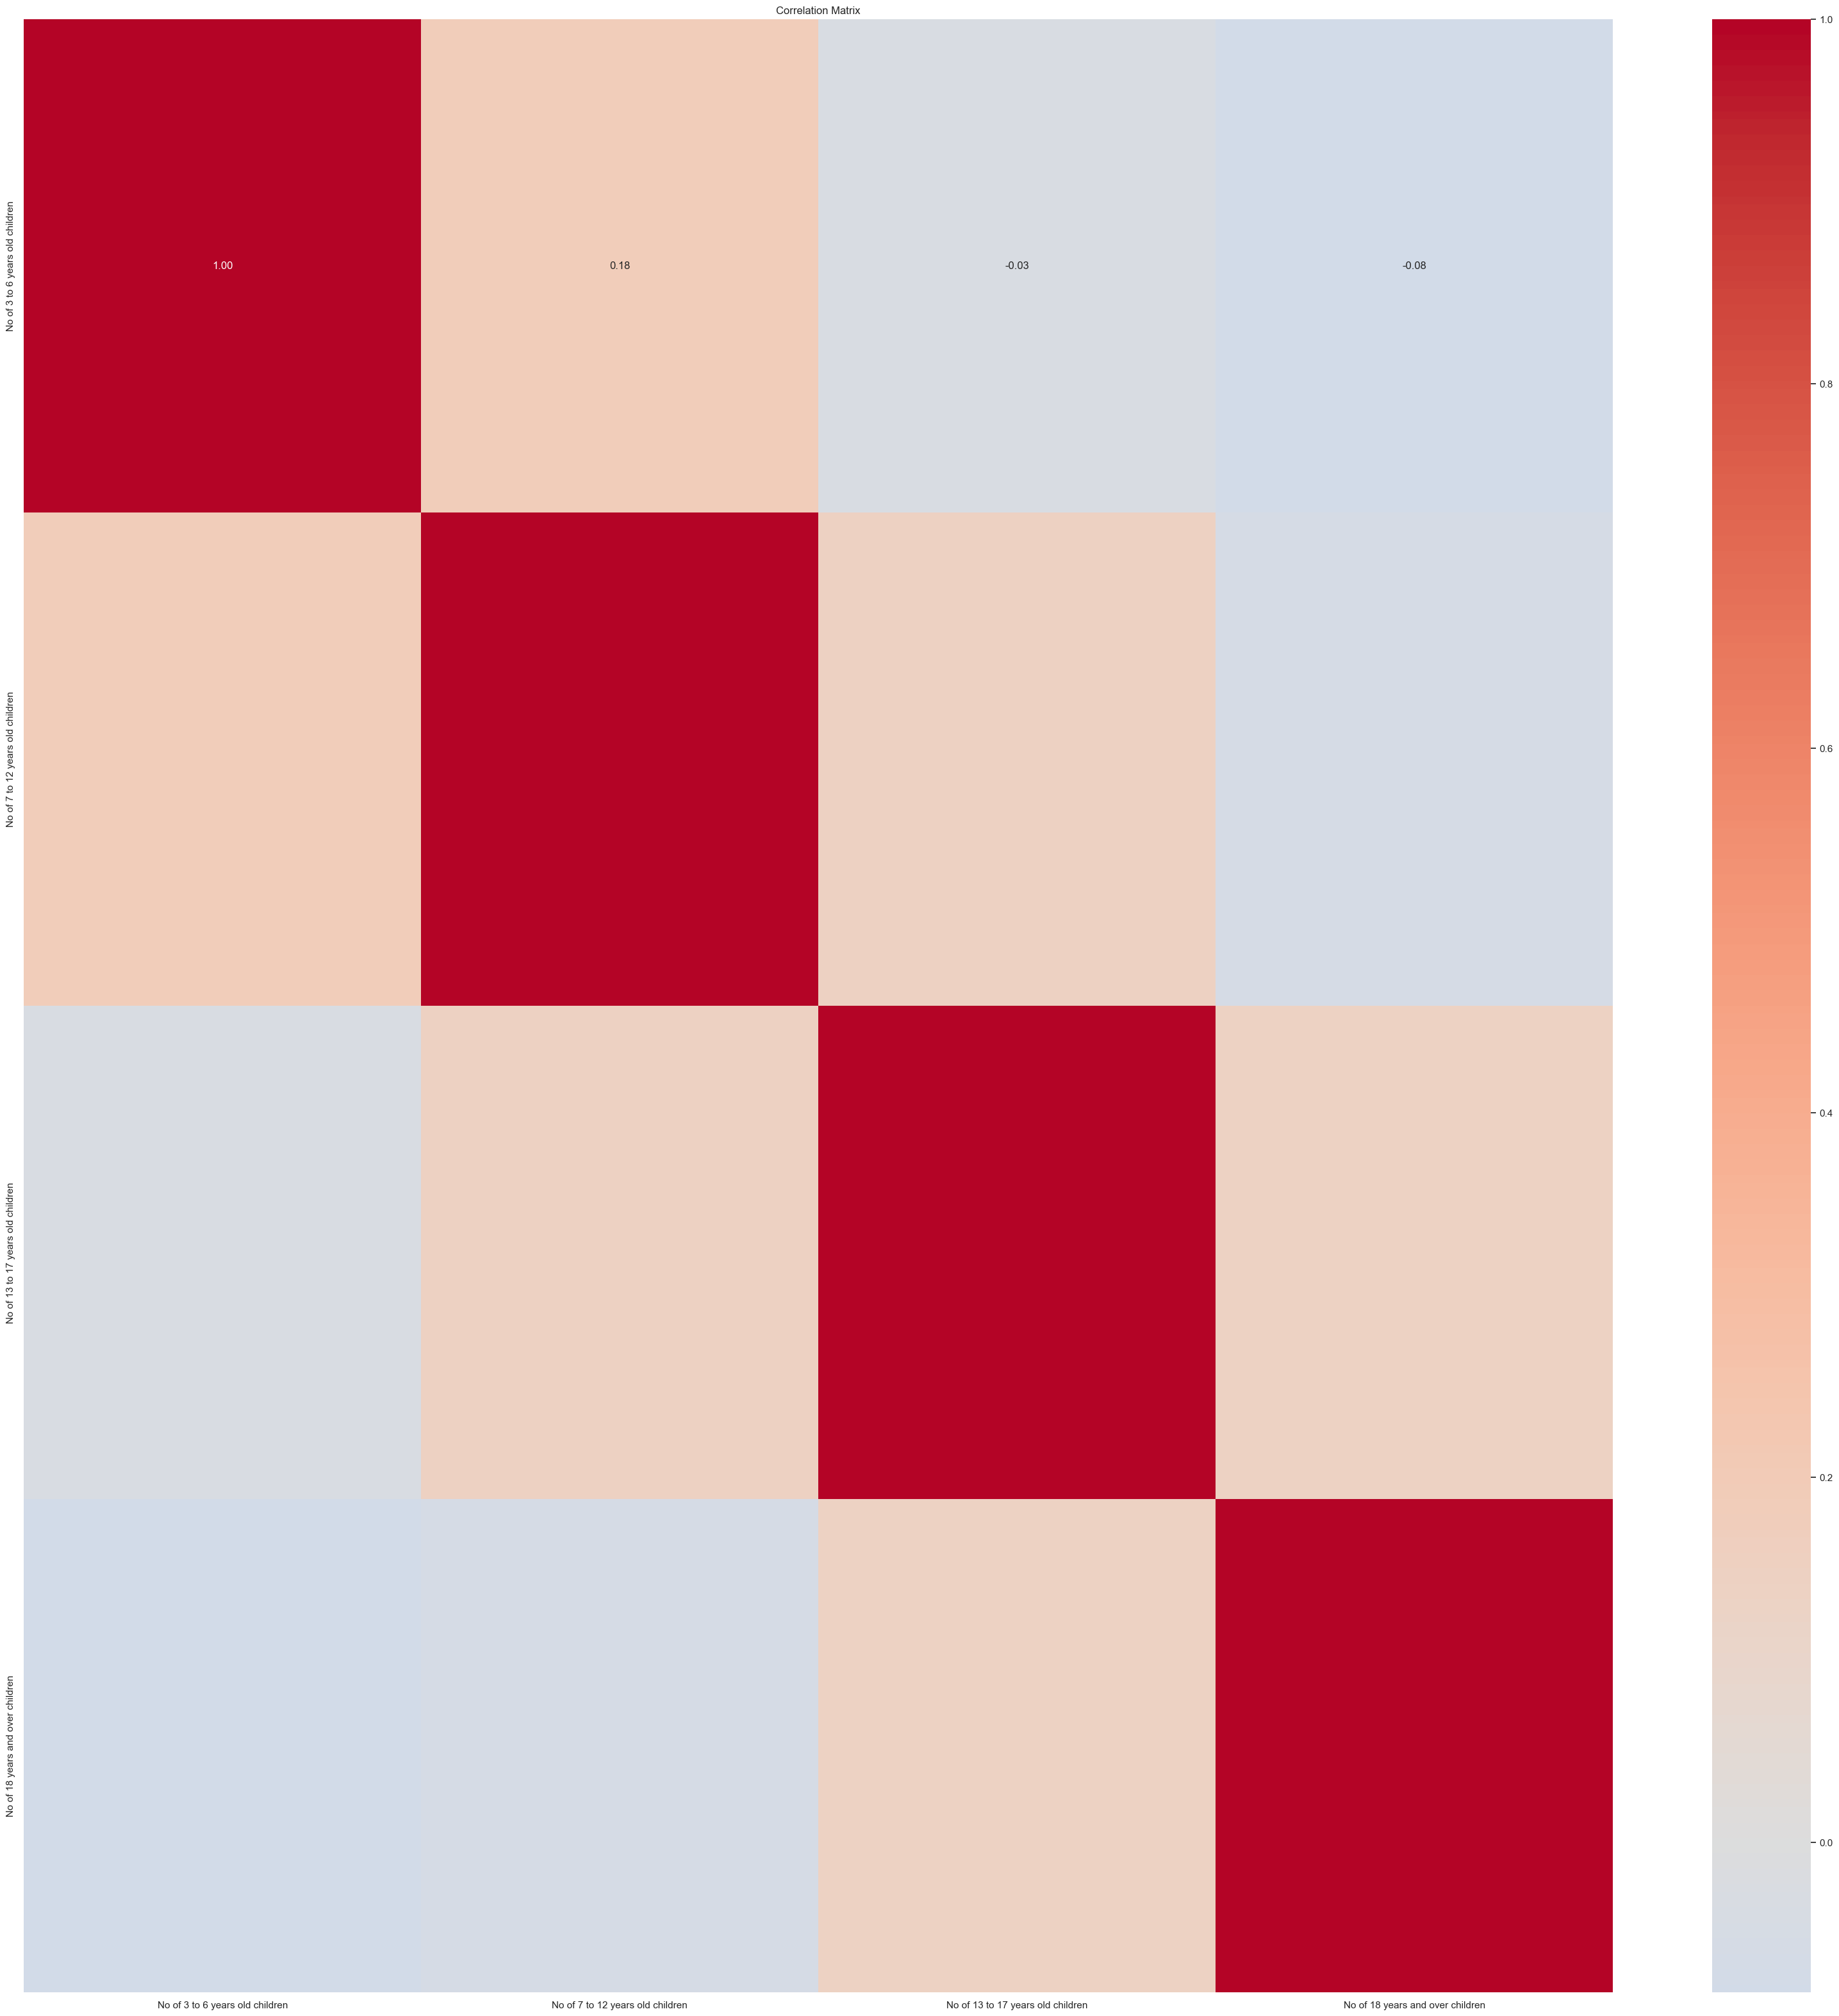

In [9]:
# plot correlation matrix

plt.figure(figsize=(40, 40))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.savefig("outputs/00_data_analysis/2_correlation_matrix.png", bbox_inches='tight')
plt.show()

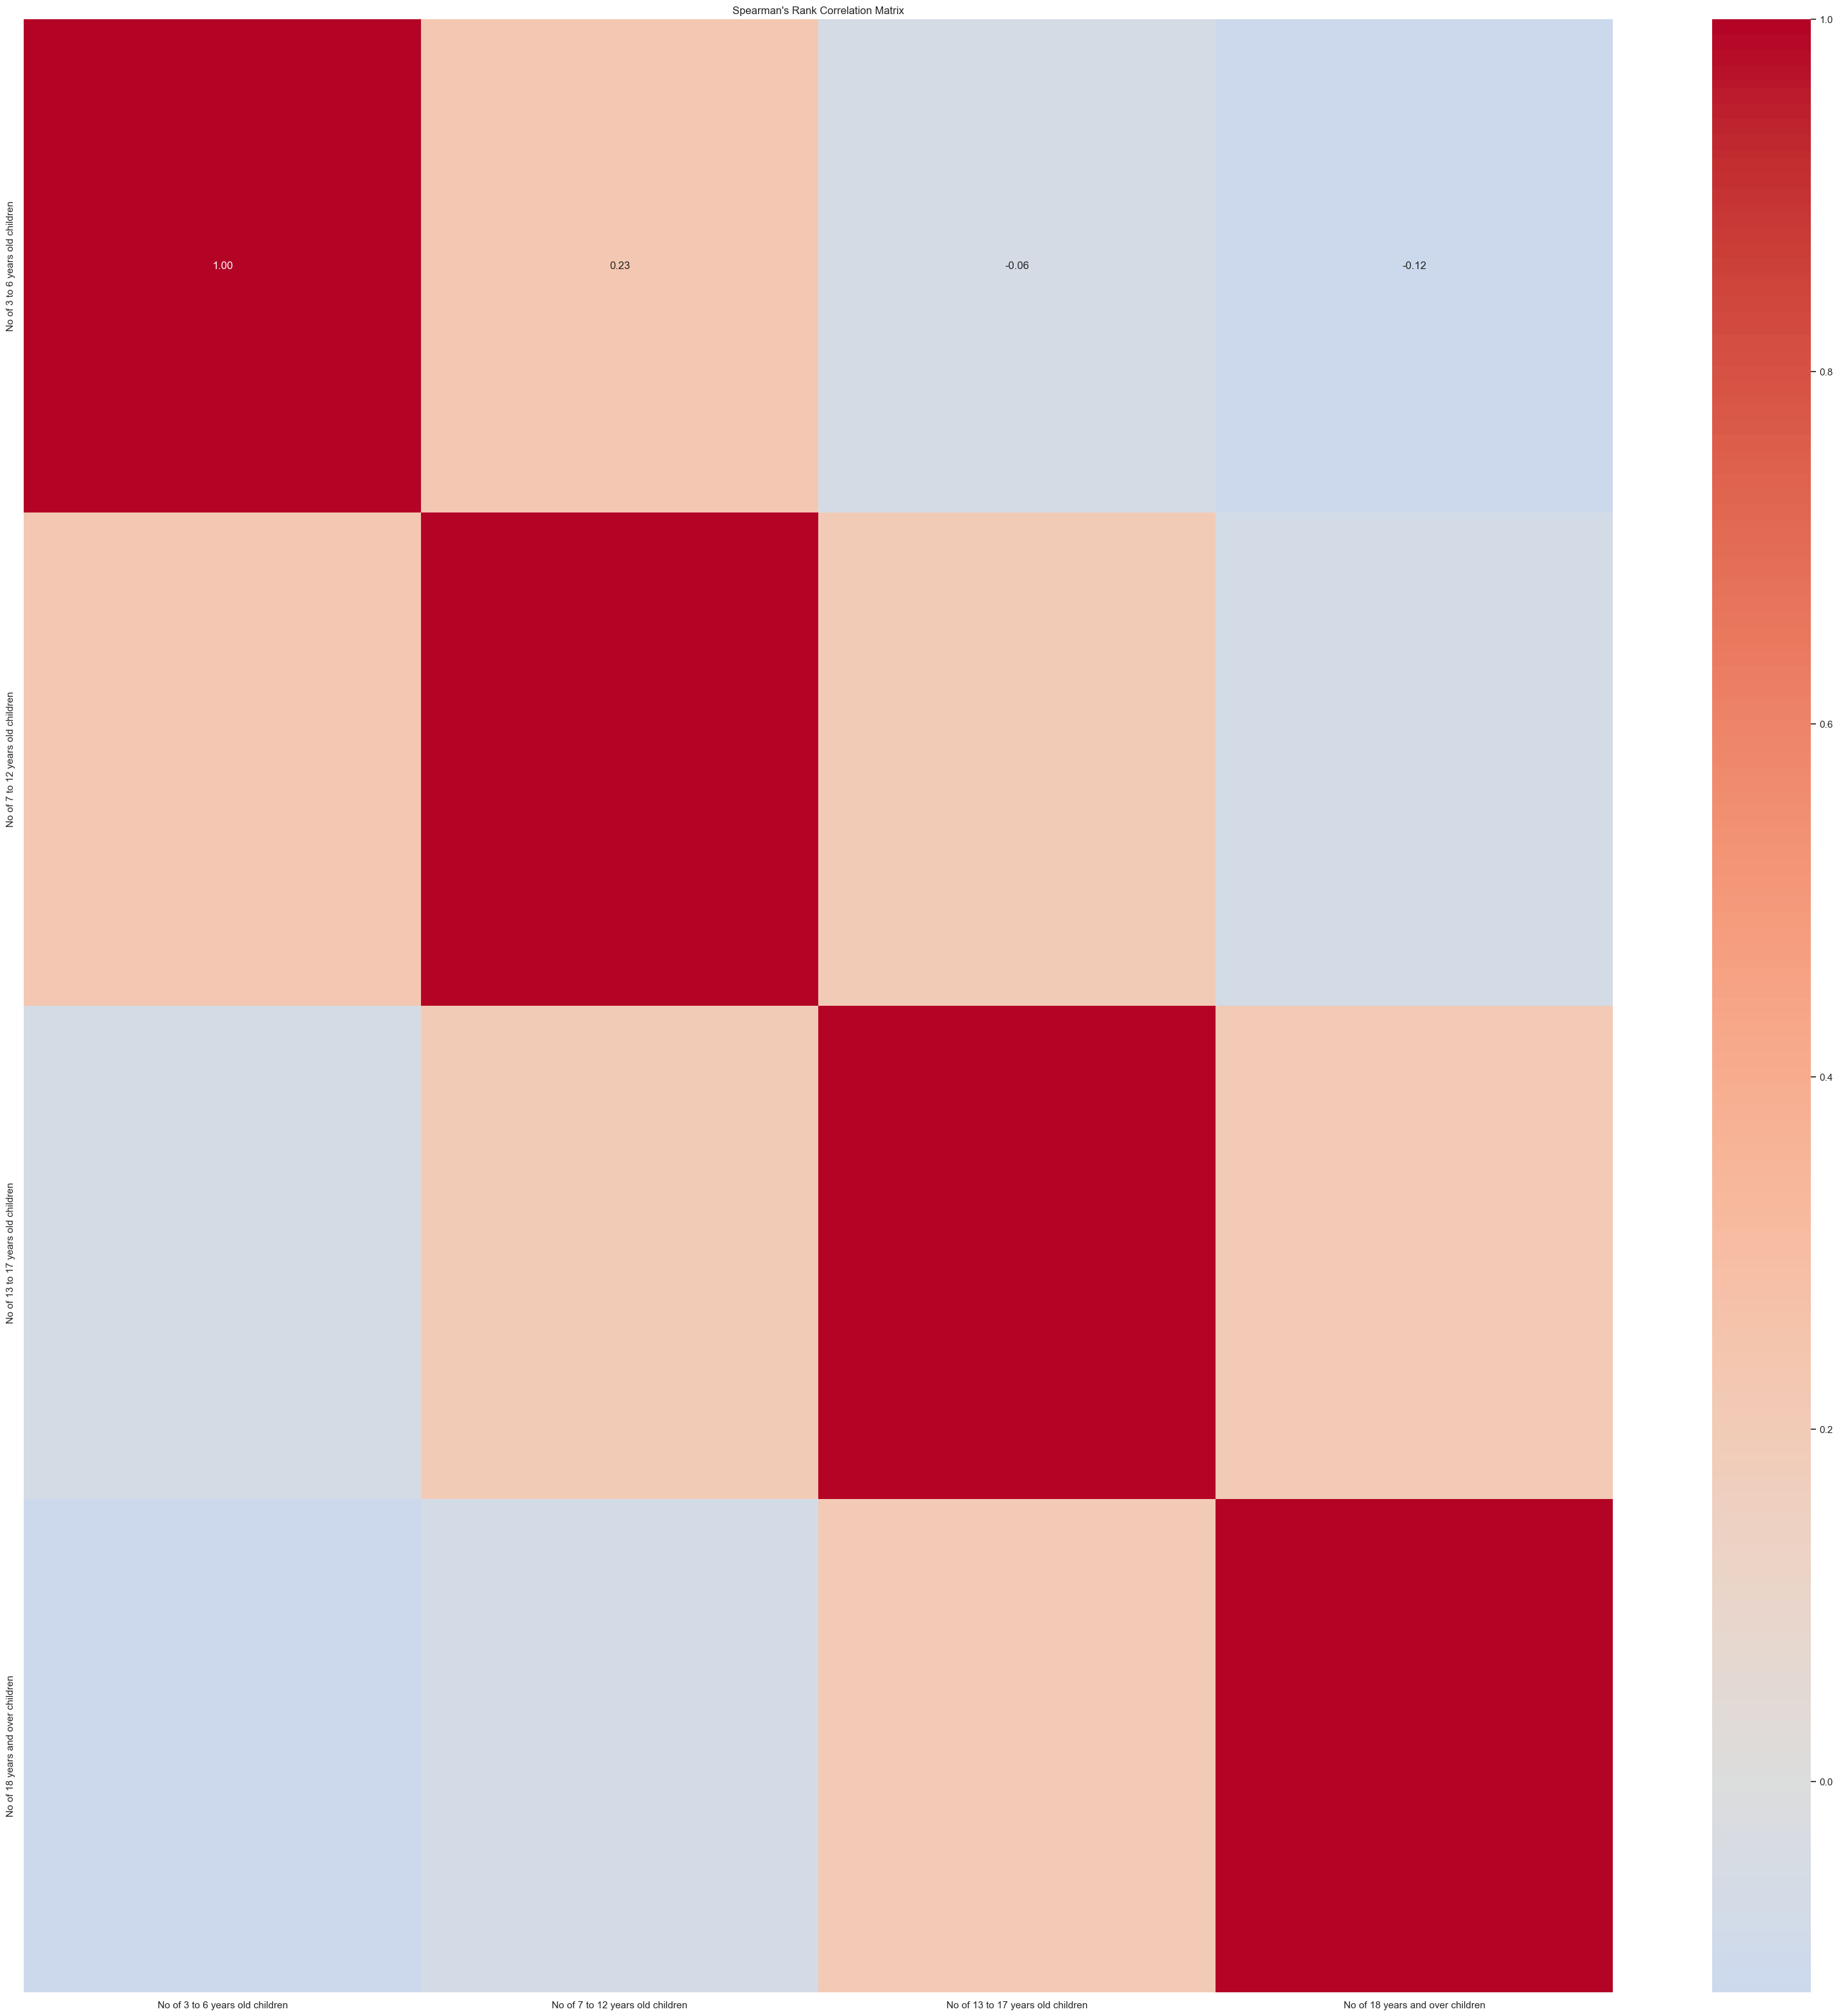

In [10]:
# Spearman's rank correlation

plt.figure(figsize=(40, 40))
sns.heatmap(data.corr(method='spearman'), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Spearman's Rank Correlation Matrix")
plt.savefig("outputs/00_data_analysis/2_spearman_correlation", bbox_inches='tight')
plt.show()